#  **1. Import Libraries**

In [ ]:
# Import Libraries
import kagglehub
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pastel_colors = sns.color_palette("pastel")

# **2. Download and Load Dataset**

In [ ]:
# Download latest version
path = kagglehub.dataset_download("fronkongames/steam-games-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/steam-games-dataset


In [ ]:
# Construct path to the CSV file
csv_path = os.path.join(path,"games.csv")

In [ ]:
# Load csv
df_games = pd.read_csv(csv_path)

In [ ]:
# Check initial data
df_games.head(3)

AppID          Name Release date  Estimated owners  \
20200    Galactic Bowling  Oct 21, 2008    0 - 20000                 0   
655370       Train Bandit  Oct 12, 2017    0 - 20000                 0   
1732930      Jolt Project  Nov 17, 2021    0 - 20000                 0   

         Peak CCU  Required age  Price  DiscountDLC count  \
20200           0         19.99      0                  0   
655370          0          0.99      0                  0   
1732930         0          4.99      0                  0   

                                            About the game  \
20200    Galactic Bowling is an exaggerated and stylize...   
655370   THE LAW!! Looks to be a showdown atop a train....   
1732930  Jolt Project: The army now has a new robotics ...   

                                       Supported languages  ...  \
20200                                          ['English']  ...   
655370   ['English', 'French', 'Italian', 'German', 'Sp...  ...   
1732930                 ['English', 'Portuguese - Brazil']  ...   

        Average playtime two weeks Median playtime forever  \
20200                            0                       0   
655370                           0                       0   
1732930                          0                       0   

        Median playtime two weeks             Developers  \
20200                           0  Perpetual FX Creative   
655370                          0           Rusty Moyher   
1732930                         0          Campião Games   

                    Publishers  \
20200    Perpetual FX Creative   
655370            Wild Rooster   
1732930          Campião Games   

                                                Categories  \
20200    Single-player,Multi-player,Steam Achievements,...   
655370   Single-player,Steam Achievements,Full controll...   
1732930                                      Single-player   

                                  Genres  \
20200                Casual,Indie,Sports   
655370                      Action,Indie   
1732930  Action,Adventure,Indie,Strategy   

                                                      Tags  \
20200                          Indie,Casual,Sports,Bowling   
655370   Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...   
1732930                                                NaN   

                                               Screenshots  \
20200    https://cdn.akamai.steamstatic.com/steam/apps/...   
655370   https://cdn.akamai.steamstatic.com/steam/apps/...   
1732930  https://cdn.akamai.steamstatic.com/steam/apps/...   

                                                    Movies  
20200    http://cdn.akamai.steamstatic.com/steam/apps/2...  
655370   http://cdn.akamai.steamstatic.com/steam/apps/2...  
1732930  http://cdn.akamai.steamstatic.com/steam/apps/2...  

[3 rows x 39 columns]

# **3. Initial Data Description**

| Column Name                    | Description                                             |
|-------------------------------|---------------------------------------------------------|
| AppID                         | Unique ID of the game on Steam                          |
| Name                          | Name of the game                                        |
| Release date                  | Release date of the game                                |
| Estimated owners              | Estimated range of game owners                          |
| Peak CCU                      | Peak number of concurrent players                       |
| Required age                  | Minimum age required to play                            |
| Price                         | Price in USD                                            |
| Discount                      | Discount percentage                                     |
| DLC count                     | Number of DLCs (Downloadable Content)                  |
| About the game                | Overview/about section from Steam                       |
| Supported languages           | Languages supported by the game                         |
| Full audio languages          | Languages with full audio support                       |
| Reviews                       | User or critic reviews                                  |
| Header image                  | URL of the game's header image                          |
| Website                       | Official website of the game                            |
| Support url                   | Support or contact URL                                  |
| Support email                 | Support contact email                                   |
| Windows / Mac / Linux         | Supported platforms                                     |
| Metacritic score              | Score on Metacritic (0-100)                             |
| Metacritic url                | Link to Metacritic page                                 |
| User score                    | User rating score (usually 0-100)                       |
| Positive                      | Number of positive reviews                              |
| Negative                      | Number of negative reviews                              |
| Score rank                    | Rank/tier of the game's score                           |
| Achievements                  | Number of Steam achievements                            |
| Recommendations               | Number of user recommendations                          |
| Notes                         | Additional notes or warnings                            |
| Average playtime forever      | Average total playtime (in minutes)                     |
| Average playtime two weeks    | Average playtime over last 2 weeks                      |
| Median playtime forever       | Median total playtime                                   |
| Median playtime two weeks     | Median playtime over last 2 weeks                       |
| Developers                    | Developer(s) of the game                                |
| Publishers                    | Publisher(s) of the game                                |
| Categories                    | Game categories on Steam (e.g., Single-player)          |
| Genres                        | Genres (e.g., Action, Strategy, RPG)                    |
| Tags                          | User-submitted tags (e.g., Indie, Casual)               |
| Screenshots                   | List of in-game screenshots (URLs)                      |
| Movies                        | List of gameplay trailers or videos                     |


# **4. Data Cleaning**

In [ ]:
# Check raw columns
df_games.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DiscountDLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

## **4.1. Correct misalignment**

In [ ]:
# Define and Apply Correct Column Names
column_names = [
    "AppID", "Name", "Release date", "Estimated owners", "Peak CCU", "Required age", "Price",
    "Discount", "DLC count", "About the game", "Supported languages", "Full audio languages",
    "Reviews", "Header image", "Website", "Support url", "Support email",
    "Windows", "Mac", "Linux", "Metacritic score", "Metacritic url",
    "User score", "Positive", "Negative", "Score rank", "Achievements", "Recommendations",
    "Notes", "Average playtime forever", "Average playtime two weeks",
    "Median playtime forever", "Median playtime two weeks",
    "Developers", "Publishers", "Categories", "Genres", "Tags",
    "Screenshots", "Movies"
]

# Reload csv with corrected column names
df_games = pd.read_csv(csv_path, quotechar='"', on_bad_lines='skip', names=column_names, header=0)


In [ ]:
df_games.shape

(111452, 40)

In [ ]:
df_games.head(3)

AppID              Name  Release date Estimated owners  Peak CCU  \
0    20200  Galactic Bowling  Oct 21, 2008        0 - 20000         0   
1   655370      Train Bandit  Oct 12, 2017        0 - 20000         0   
2  1732930      Jolt Project  Nov 17, 2021        0 - 20000         0   

   Required age  Price  Discount  DLC count  \
0             0  19.99         0          0   
1             0   0.99         0          0   
2             0   4.99         0          0   

                                      About the game  ...  \
0  Galactic Bowling is an exaggerated and stylize...  ...   
1  THE LAW!! Looks to be a showdown atop a train....  ...   
2  Jolt Project: The army now has a new robotics ...  ...   

  Average playtime two weeks Median playtime forever  \
0                          0                       0   
1                          0                       0   
2                          0                       0   

  Median playtime two weeks             Developers             Publishers  \
0                         0  Perpetual FX Creative  Perpetual FX Creative   
1                         0           Rusty Moyher           Wild Rooster   
2                         0          Campião Games          Campião Games   

                                          Categories  \
0  Single-player,Multi-player,Steam Achievements,...   
1  Single-player,Steam Achievements,Full controll...   
2                                      Single-player   

                            Genres  \
0              Casual,Indie,Sports   
1                     Action,Indie   
2  Action,Adventure,Indie,Strategy   

                                                Tags  \
0                        Indie,Casual,Sports,Bowling   
1  Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...   
2                                                NaN   

                                         Screenshots  \
0  https://cdn.akamai.steamstatic.com/steam/apps/...   
1  https://cdn.akamai.steamstatic.com/steam/apps/...   
2  https://cdn.akamai.steamstatic.com/steam/apps/...   

                                              Movies  
0  http://cdn.akamai.steamstatic.com/steam/apps/2...  
1  http://cdn.akamai.steamstatic.com/steam/apps/2...  
2  http://cdn.akamai.steamstatic.com/steam/apps/2...  

[3 rows x 40 columns]

## **4.2.  Drop irrelevant columns**

❌ **Not analyze in this project:**
- ``About the game`` - Long text data
- ``Supported languages``, ``Full audio languages`` - Too detailed, rarely used
- ``Reviews`` - not used unless performing sentiment analysis  
- ``Header image``, ``Screenshots``, ``Movies`` - Media URLs not needed  
- ``Website``, ``Support url``, ``Support email`` - Contact information, not relevant  
- ``Windows``, ``Mac``, ``Linux`` - Platform support
- ``Metacritic score``, ``Metacritic url`` - Frequently missing
- ``Achievements`` - Not a key factor  
- ``Notes`` - Extra content note, low analytical value  
- ``Score rank``, ``User score`` - Frequently missing, redundant with ``Positive`` and ``Negative``   
- ``Average playtime forever``, ``Average playtime two weeks``, ``Median playtime forever``, ``Median playtime two weeks`` - Too many redundant metrics
- ``Tags``, ``Categories`` - Too messy and overlaps with ``Genres``  
- ``Peak CCU`` - Popularity metric, not in modeling scope  
- ``Discount`` - Many missing values and time-sensitive

📌 Removing these columns makes the data easier to work with and focus on the important stuff.

In [ ]:
# List of columns to drop
columns_to_drop = [
    "About the game", "Supported languages", "Full audio languages", "Reviews",
    "Header image", "Screenshots", "Movies",
    "Website", "Support url", "Support email",
    "Windows", "Mac", "Linux",
    "Metacritic score", "Metacritic url",
    "Achievements","Notes", "Score rank", "User score",
    "Average playtime forever", "Average playtime two weeks",
    "Median playtime forever", "Median playtime two weeks",
    "Tags", "Categories", "Peak CCU", "Discount"
]

# Drop columns if they exist in the DataFrame
df_games.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df_games.shape

(111452, 13)

In [ ]:
df_games.head(3)

AppID              Name  Release date Estimated owners  Required age  \
0    20200  Galactic Bowling  Oct 21, 2008        0 - 20000             0   
1   655370      Train Bandit  Oct 12, 2017        0 - 20000             0   
2  1732930      Jolt Project  Nov 17, 2021        0 - 20000             0   

   Price  DLC count  Positive  Negative  Recommendations  \
0  19.99          0         6        11                0   
1   0.99          0        53         5                0   
2   4.99          0         0         0                0   

              Developers             Publishers  \
0  Perpetual FX Creative  Perpetual FX Creative   
1           Rusty Moyher           Wild Rooster   
2          Campião Games          Campião Games   

                            Genres  
0              Casual,Indie,Sports  
1                     Action,Indie  
2  Action,Adventure,Indie,Strategy

## **4.3. Handle `Estimated owners` column**

### **4.3.1. Games with zero sale**

🗑️ Removing Rows with `"0 - 0"` in `Estimated owners`

Rows with the value `"0 - 0"` in the `Estimated owners` column indicate games with **no known ownership data**. Keeping these rows would introduce several issues:

- **No analytical value** - These games provide no insight into popularity
- **Can mislead the model** - A value of 0 might be interpreted as valid data
- **Often low-quality entries** - Often low-quality entries - Such rows tend to lack other important metadata

In [ ]:
# Check how many rows have '0 - 0' in `Estimated owners`
zero_mask = df_games['Estimated owners'] == '0 - 0'
zero_count = zero_mask.sum()
zero_count

np.int64(22091)

In [ ]:
# Remove rows where 'Estimated owners' is '0 - 0'
df_games = df_games[df_games['Estimated owners'] != '0 - 0']

In [ ]:
df_games.shape

(89361, 13)

### **4.3.2. Convert range to numeric midpoint**

🛠️ The original field contains non-numeric string ranges (e.g., "10,000 .. 20,000"), which are unsuitable for quantitative analysis.
Taking the numeric midpoint provides a continuous approximation, enabling downstream statistical modeling and visualization.

In [ ]:
# Divide to min and max owner
df_games[['min', 'max']] = df_games['Estimated owners'].str.split('-', expand=True)

# Convert to numeric
df_games['min'] = pd.to_numeric(df_games['min'])
df_games['max'] = pd.to_numeric(df_games['max'])

# Extract midpoint
df_games['Estimated owners'] = (df_games['min'] + df_games['max']) / 2

In [ ]:
# Drop temporary columns
df_games = df_games.drop(columns=['min', 'max'])

In [ ]:
df_games.head(3)

AppID              Name  Release date  Estimated owners  Required age  \
0    20200  Galactic Bowling  Oct 21, 2008           10000.0             0   
1   655370      Train Bandit  Oct 12, 2017           10000.0             0   
2  1732930      Jolt Project  Nov 17, 2021           10000.0             0   

   Price  DLC count  Positive  Negative  Recommendations  \
0  19.99          0         6        11                0   
1   0.99          0        53         5                0   
2   4.99          0         0         0                0   

              Developers             Publishers  \
0  Perpetual FX Creative  Perpetual FX Creative   
1           Rusty Moyher           Wild Rooster   
2          Campião Games          Campião Games   

                            Genres  
0              Casual,Indie,Sports  
1                     Action,Indie  
2  Action,Adventure,Indie,Strategy

## **4.4. Convert Data Types**

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89361 entries, 0 to 111451
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AppID             89361 non-null  int64  
 1   Name              89360 non-null  object 
 2   Release date      89361 non-null  object 
 3   Estimated owners  89361 non-null  float64
 4   Required age      89361 non-null  int64  
 5   Price             89361 non-null  float64
 6   DLC count         89361 non-null  int64  
 7   Positive          89361 non-null  int64  
 8   Negative          89361 non-null  int64  
 9   Recommendations   89361 non-null  int64  
 10  Developers        89356 non-null  object 
 11  Publishers        89017 non-null  object 
 12  Genres            89284 non-null  object 
dtypes: float64(2), int64(6), object(5)
memory usage: 9.5+ MB


In [ ]:
# Convert `Release date` to datetime
df_games['Release date'] = pd.to_datetime(df_games['Release date'], errors='coerce')

In [ ]:
# Convert object column to string
convert_col_to_string = ['Name','Developers','Publishers','Genres']
df_games[convert_col_to_string] = df_games[convert_col_to_string].astype('string')

In [ ]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89361 entries, 0 to 111451
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   AppID             89361 non-null  int64         
 1   Name              89360 non-null  string        
 2   Release date      89239 non-null  datetime64[ns]
 3   Estimated owners  89361 non-null  float64       
 4   Required age      89361 non-null  int64         
 5   Price             89361 non-null  float64       
 6   DLC count         89361 non-null  int64         
 7   Positive          89361 non-null  int64         
 8   Negative          89361 non-null  int64         
 9   Recommendations   89361 non-null  int64         
 10  Developers        89356 non-null  string        
 11  Publishers        89017 non-null  string        
 12  Genres            89284 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(6), string(4)
memory usage: 9.5 MB


## **4.5.  Fill Missing Values**

In [ ]:
print("\nMissing Values before Handling:")
print(df_games.isnull().sum())


Missing Values before Handling:
AppID                 0
Name                  1
Release date        122
Estimated owners      0
Required age          0
Price                 0
DLC count             0
Positive              0
Negative              0
Recommendations       0
Developers            5
Publishers          344
Genres               77
dtype: int64


### **4.5.1.  Fill Missing Values**

- Fill missing `Name`, `Developers`, and `Publishers` with neutral labels to keep the data usable for grouping and analysis.

In [ ]:
# Fill missing value
df_games['Name'] = df_games['Name'].fillna('unknown')

# Fill with "Original Creation" and "Auto Publication" as neutral placeholders, assuming the game may be self-developed or published without formal attribution.
df_games['Developers'] = df_games['Developers'].fillna('Original Creation')
df_games['Publishers'] = df_games['Publishers'].fillna('Auto Publication*')

### **4.5.2.  Drop Missing Values**

- Drop rows missing `Genres` or `Release date` because these are key features ,  without them, the game's type or timeline can't be properly analyzed, and filling them could lead to incorrect results.

In [ ]:
df_games = df_games.dropna(subset=['Genres','Release date'])

In [ ]:
print("\nFinal missing values check:")
print(df_games.isnull().sum())


Final missing values check:
AppID               0
Name                0
Release date        0
Estimated owners    0
Required age        0
Price               0
DLC count           0
Positive            0
Negative            0
Recommendations     0
Developers          0
Publishers          0
Genres              0
dtype: int64


## **4.6. Check Duplicate Value**

In [ ]:
df_games['AppID'].duplicated().sum()

np.int64(0)

✅ No Duplicate Values Detected: Each game in the dataset has a unique AppID identifier


## **4.7. Filter Out Data**

### **4.7.1. Filter Out Non-Game Entries**

 **Data Filtering Keywords Explanation**

| Keyword | Reason for Exclusion
|---------|---------------------
| **beta** | Pre-release version, still in testing phase
| **playtest** | Temporary testing versions for user feedback
| **sdk** | Software Development Kit, not actual games
| **demo** | Free trial versions, partial game experience
| **server** | Dedicated servers for multiplayer, not games
| **editor** | Content creation tools, not playable games

👉 Filter out non-commercial, incomplete, or tool-based entries.

In [ ]:
# List of keywords that indicate test/demo/unfinished games
keywords = ["beta", "playtest", "sdk", "demo", "server", "editor"]

# Create regex pattern using word boundaries (\b) to avoid partial matches
pattern = r'\b(' + '|'.join(keywords) + r')\b'

# Create boolean mask for rows to remove
mask_to_remove = df_games['Name'].astype(str).str.contains(pattern, case=False, regex=True, na=False)

print(f"Games to remove: {mask_to_remove.sum()}")

Games to remove: 125


In [ ]:
# Apply filter
df_games = df_games[~mask_to_remove].copy()

In [ ]:
df_games.shape

(89037, 13)

### **4.7.2. Filter Out games with `Release year` before 2003 and `Release year` in 2025**

Games released in or before 2003 are removed because Steam officially launched that year, and excluding these older titles helps simplify the analysis and ensures the dataset reflects games actually distributed on the platform.

Similarly, games from 2025 are excluded as the year is incomplete (data only goes up to May), which could lead to underrepresentation or misleading trends.

In [ ]:
# Create 'Release year' and 'Release month'
df_games['Release year'] = df_games['Release date'].dt.year
df_games['Release month'] = df_games['Release date'].dt.month

In [ ]:
# Filter out games with Release year <= 2003 and the current incomplete year
current_year = datetime.now().year
initial_rows = df_games.shape[0]
df_games = df_games[
    (df_games['Release year'] > 2003) &
    (df_games['Release year'] < current_year)
].copy()

In [ ]:
df_games.shape

(85268, 15)

## **4.8. Feature Engineering & Outlier Treatment**

### **4.8.1. Create Derived Numerical Features**

- `Total reviews` show how many players have engaged with a game through feedback, indicating its visibility and reach.


In [ ]:
# Calculate 'Total reviews'
df_games['Total reviews'] = df_games['Positive'] + df_games['Negative']

- `Review ratio` reflects user satisfaction ,  closer to 1 is positive.

In [ ]:
# Calculate `Review ratio` (0 = all negative, 1 = all positive)
df_games['Review ratio'] = df_games['Positive'] / df_games['Total reviews']
df_games['Review ratio'] = df_games['Review ratio'].fillna(0)  # Avoid division by zero

- `Game age` shows how long a game has been on the market.

In [ ]:
# Calculate `Game age`
df_games['Game age'] = current_year - df_games['Release year']

- `Price category` groups games into price ranges to simplify analysis and comparison.

In [ ]:
# Calculate 'Price category`
df_games['Price category'] = pd.cut(df_games['Price'],
                                    bins=[-1, 0.01, 10, 30, 60, np.inf],
                                    labels=['Free', 'Under $10', '$10-30', '$30-60', 'Over $60'],
                                    right=True)

`Popularity score` is a time-normalized, weighted composite metric designed to fairly evaluate how widely a game is played and received .

It is calculated using:

* **Log transformation** to reduce skewness in raw metrics (`Estimated owners`, `Total reviews`, `Recommendations`)
* **Min-Max scaling** to normalize values between 0 and 1
 * **Time-based normalization** to adjust for differences across release years
* **Weighted average** prioritizing `Estimated owners` (0.5), `Total reviews` (0.3), and `Recommendations` (0.2)

This score ranges from **0** (least popular) to **1** (most popular), enabling fair comparison of games across time and scale.


In [ ]:
# Create `Popularity score` column (adjusted for time-based normalization)
# Apply log transformation first for skewed distributions
df_games['Log_Owners'] = np.log1p(df_games['Estimated owners'])
df_games['Log_Reviews'] = np.log1p(df_games['Total reviews'])
df_games['Log_Recommendations'] = np.log1p(df_games['Recommendations'])

# Normalize WITHIN EACH YEAR using Min-Max Scaling for time-based relevance
for col_raw, col_log_norm in [
    ('Log_Owners', 'Normalized_Owners_Yearly'),
    ('Log_Reviews', 'Normalized_Reviews_Yearly'),
    ('Log_Recommendations', 'Normalized_Recommendations_Yearly')
]:
    # Use transform to apply group-wise min-max scaling
    # Ensure min/max exist for the group to avoid NaN issues
    df_games[col_log_norm] = df_games.groupby('Release year')[col_raw].transform(
        lambda x: (x - x.min()) / (x.max() - x.min()) if (x.max() - x.min()) > 0 else 0
    )

# Combine into a single popularity score
# Weights can be adjusted based on perceived importance
df_games['Popularity score'] = (
    0.5 * df_games['Normalized_Owners_Yearly'] +
    0.3 * df_games['Normalized_Reviews_Yearly'] +
    0.2 * df_games['Normalized_Recommendations_Yearly']
)
# Drop temporary normalized columns
df_games.drop(columns=['Log_Owners', 'Log_Reviews', 'Log_Recommendations',
                       'Normalized_Owners_Yearly', 'Normalized_Reviews_Yearly', 'Normalized_Recommendations_Yearly'], inplace=True)

- `Value score` estimates how much popularity and user satisfaction a game offers relative to its price.
Higher scores suggest better value for money.

In [ ]:
# Create `Value score`
df_games['Value score'] = (df_games['Popularity score'] * df_games['Review ratio']) / (df_games['Price'] + 1)

- `Popularity quintile` groups how popular the games are.

In [ ]:
# Create `Popularity quintile`
df_games['Popularity quintile'] = pd.qcut(df_games['Popularity score'],
                                          q=5, labels=['Bottom 20%', 'Low', 'Medium', 'High', 'Top 20%'])

In [ ]:
df_games.shape

(85268, 22)

### **4.8.2. Outlier Treatment to Numeric columns**

#### **A. Initial Check**


In [ ]:
cols_to_analyze = ['Estimated owners', 'Price', 'Positive', 'Negative', 'Recommendations', 'Required age', 'DLC count']

In [ ]:
# Create empty list to store results
outlier_data = []

# Loop through each column to compute IQR-based outlier count
for col in cols_to_analyze:
    Q1 = df_games[col].quantile(0.25)
    Q3 = df_games[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    # Ensure lower_bound is not negative
    lower_bound = max(0, lower_bound)
    upper_bound = Q3 + 1.5 * IQR

    # outlier_count = df_games[(df_games[col] < lower_bound) | (df_games[col] > upper_bound)].shape[0]

    outlier_data.append({
        'Column': col,
        'Q1': round(Q1, 2),
        'Q3': round(Q3, 2),
        'IQR': round(IQR, 2),
        'Lower Bound': round(lower_bound, 2),
        'Upper Bound': round(upper_bound, 2),
        # 'Outlier Count': outlier_count
    })

# Convert to DataFrame
outlier_df = pd.DataFrame(outlier_data)

# Display the result
outlier_df

Column        Q1        Q3   IQR  Lower Bound  Upper Bound
0  Estimated owners  10000.00  10000.00   0.0      10000.0     10000.00
1             Price      1.99      9.99   8.0          0.0        21.99
2          Positive      1.00     51.00  50.0          0.0       126.00
3          Negative      0.00     15.00  15.0          0.0        37.50
4   Recommendations      0.00      0.00   0.0          0.0         0.00
5      Required age      0.00      0.00   0.0          0.0         0.00
6         DLC count      0.00      0.00   0.0          0.0         0.00

🔍 **Check on IQR Method:**

- The IQR method identifies outliers based on the data's quartiles. However, for attributes with highly skewed distributions (e.g., `Estimated owners`, `Positive`), the IQR bounds may not be effective enough to control extreme outliers in the long tail of the distribution.  
- Directly applying IQR might lead to removing too much valid data or not being robust enough to mitigate the influence of extremely large values.  
- Consequently, the `Popularity score` might still be unduly influenced by these values.

#### **B. Transition to 99th Percentile Capping**

| Column              | Reason                                                                 |
|---------------------|------------------------------------------------------------------------|
| `Estimated owners`  | Prevents extreme values from dominating analysis.                      |
| `Price`             | Focuses on the typical price range, excluding ultra-expensive outliers.|
| `Positive`          | Mitigates impact of viral hits with exceptionally high positive reviews.|
| `Negative`          | Mitigates impact of highly controversial or poorly received games.     |
| `Recommendations`   | Similar to reviews, caps extreme recommendation counts.                |
| `Required age`      | Capping extreme age requirements.                                      |
| `DLC count`         | Capping extreme DLC counts.                                            |


👉 Capping at the 99th percentile ensures that the top 1% of extreme values are brought down to a more reasonable level,
reducing their disproportionate influence on statistical measures and model training, while retaining the overall distribution shape.

In [ ]:
# Create a summary table of 99th percentile cap values
cap_summary_data = []

for col in cols_to_analyze:
    cap_99 = df_games[col].quantile(0.99)  # Calculate 99th percentile
    num_capped = (df_games[col] > cap_99).sum()  # Count rows to be capped
    cap_summary_data.append([col, round(cap_99, 2), num_capped])  # Save info

# Create and display summary DataFrame
cap_summary_df = pd.DataFrame(cap_summary_data, columns=['Column', '99th Percentile Cap', 'Rows Affected'])
display(cap_summary_df)

# Apply capping
for col in cols_to_analyze:
    upper_bound = df_games[col].quantile(0.99)
    df_games[col] = np.where(df_games[col] > upper_bound, upper_bound, df_games[col])

Column  99th Percentile Cap  Rows Affected
0  Estimated owners           1500000.00            478
1             Price                49.99            646
2          Positive             12888.00            852
3          Negative              2277.33            853
4   Recommendations             10781.28            853
5      Required age                17.00            333
6         DLC count                 6.00            819

### **4.8.3. `Genres` column preprocessing**

Check `Genres` unique value:

In [ ]:
# Extract unique genres from 'Genres' column
all_genres = []

for genre_str in df_games['Genres']:
    genres = [g.strip() for g in genre_str.split(',')]
    all_genres.extend(genres)

# Get unique, sorted list
unique_genres = sorted(set(all_genres))
unique_genres_count = len(unique_genres)

# Display results
print(unique_genres)
print('Number of unique genre:', unique_genres_count)

['360 Video', 'Accounting', 'Action', 'Adventure', 'Animation & Modeling', 'Audio Production', 'Casual', 'Design & Illustration', 'Documentary', 'Early Access', 'Education', 'Episodic', 'Free To Play', 'Free to Play', 'Game Development', 'Gore', 'Indie', 'Massively Multiplayer', 'Movie', 'Nudity', 'Photo Editing', 'RPG', 'Racing', 'Sexual Content', 'Short', 'Simulation', 'Software Training', 'Sports', 'Strategy', 'Tutorial', 'Utilities', 'Video Production', 'Violent', 'Web Publishing']
Number of unique genre: 34


🔄 Normalize inconsistent capitalization 'Free To Play' vs 'Free to Play' to ensure consistent genre labeling and prevent duplicate columns during one-hot encoding.

In [ ]:
# Normalize genre naming in string:
df_games['Genres'] = df_games['Genres'].astype(str).str.replace('Free To Play', 'Free to Play', regex=False)

Encode Genres using MultiLabelBinarizer:

In [ ]:
# Use MultiLabelBinarizer to one-hot encode 'Genres'
mlb = MultiLabelBinarizer()

# Split the 'Genres' string by comma and apply fit_transform
genres_split = df_games['Genres'].apply(lambda x: x.split(',') if pd.notna(x) else [])
genre_encoded = mlb.fit_transform(genres_split)

# Create a DataFrame from the one-hot encoded genres
df_genres_encoded = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=df_games.index)

# Concatenate the new genre columns with the original DataFrame
df_games_encoded = pd.concat([df_games, df_genres_encoded], axis=1)

# Drop the original 'Genres' column as it's now encoded
df_games_encoded.drop(columns=['Genres'], inplace=True)

In [ ]:
# Define genre_cols here after df_games_encoded is created and genres are one-hot encoded
genre_cols = [col for col in df_games_encoded.columns if df_games_encoded[col].dtype == 'int64'
                                 and df_games_encoded[col].isin([0, 1]).all()
                                 and col not in ['AppID', 'Required age', 'DLC count', 'Positive', 'Negative',
                                                'Recommendations', 'Total reviews', 'Release year', 'Release month', 'Game age']]
print(f"  - Identified {len(genre_cols)} genre columns.")

  - Identified 33 genre columns.


### **4.8.4. Distribution of Numerical Attributes by Game Genre**

In [ ]:
# Identify all unique genres for plotting
genre_counts = df_games_encoded[genre_cols].sum().sort_values(ascending=False)
# Use all identified genres for plotting
all_genres_for_plotting = genre_counts.index.tolist()

# Create a melted DataFrame for easier plotting by genre, using df_games_encoded
# This will create a row for each game-genre combination
df_melted_genres_for_boxplot = df_games_encoded[cols_to_analyze + all_genres_for_plotting].melt(
    id_vars=cols_to_analyze,
    var_name='Genre',
    value_name='Is_Genre'
)

# Filter for rows where the game actually belongs to the genre (Is_Genre == 1)
df_melted_genres_for_boxplot = df_melted_genres_for_boxplot[df_melted_genres_for_boxplot['Is_Genre'] == 1].drop(columns=['Is_Genre'])

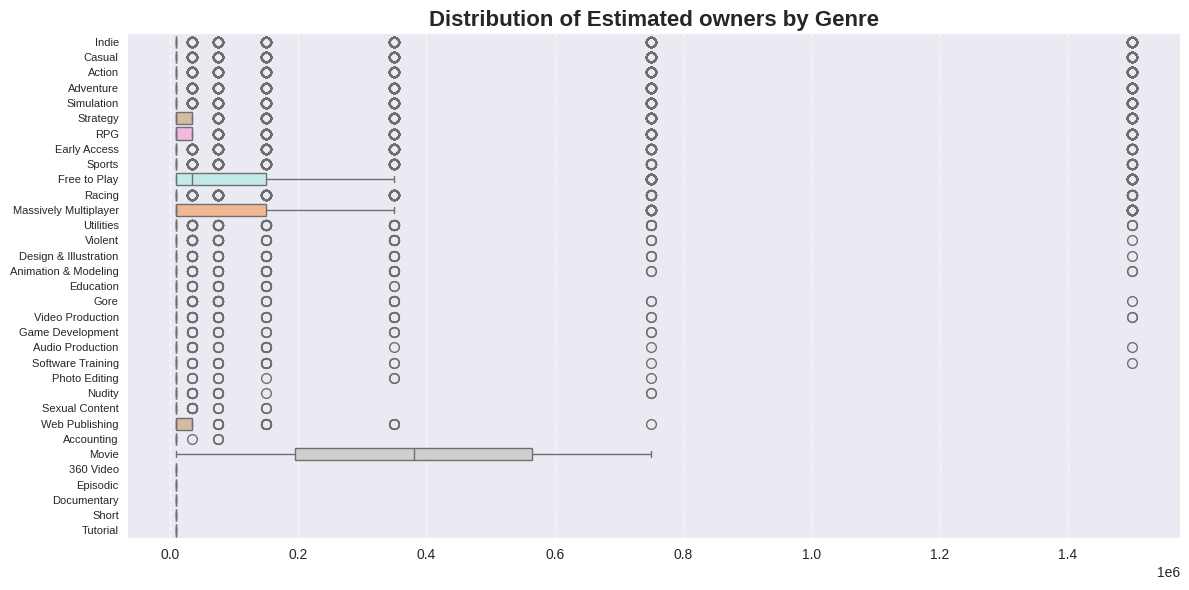

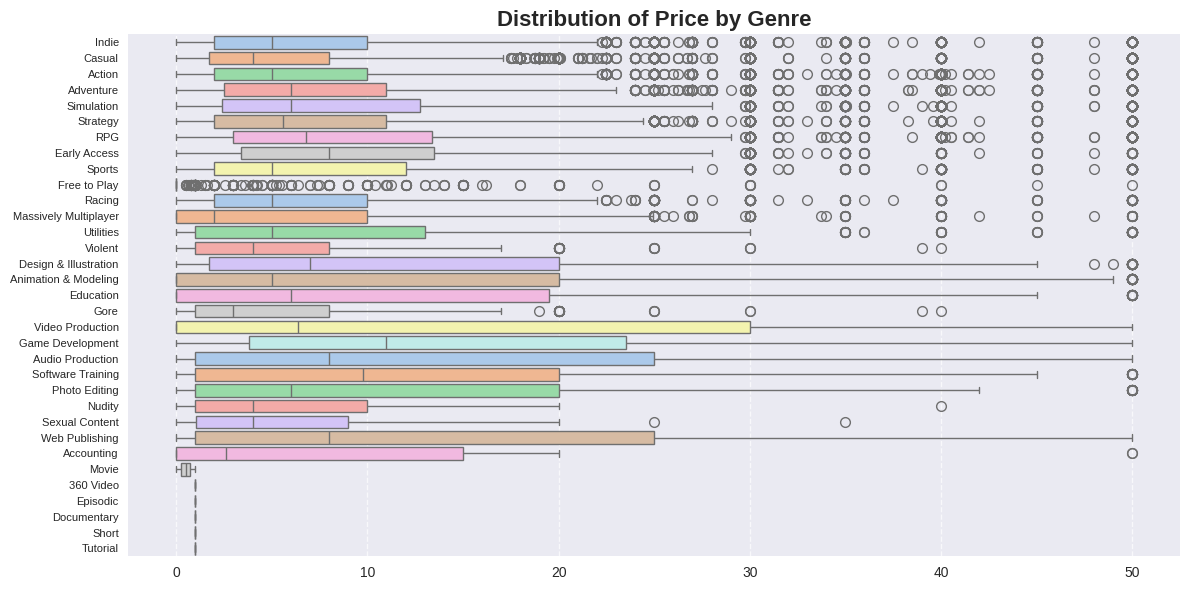

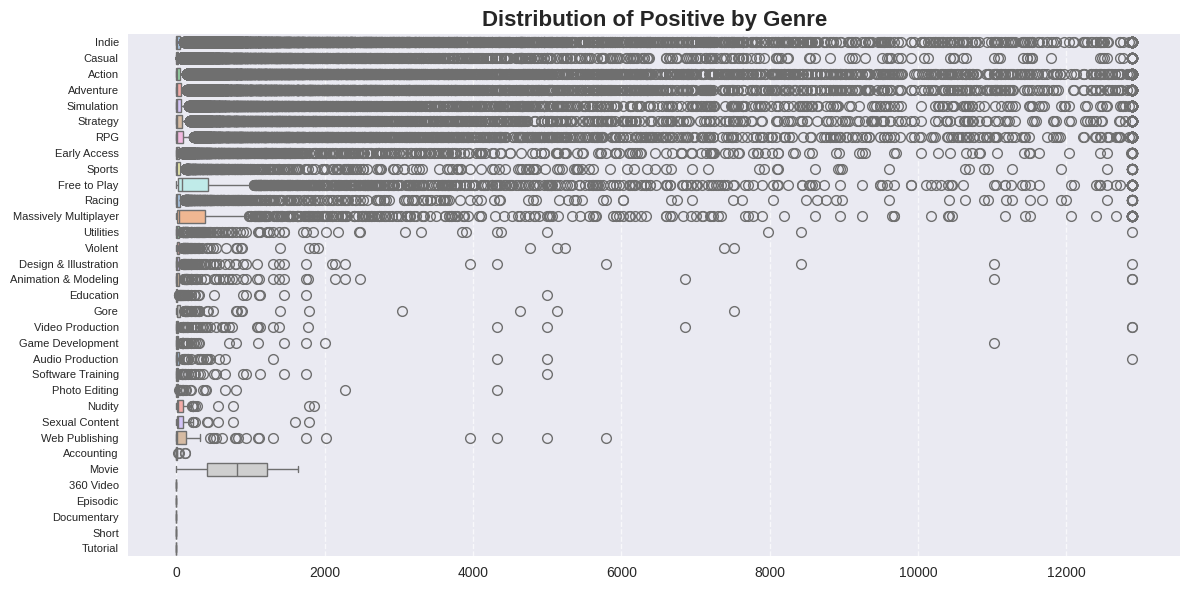

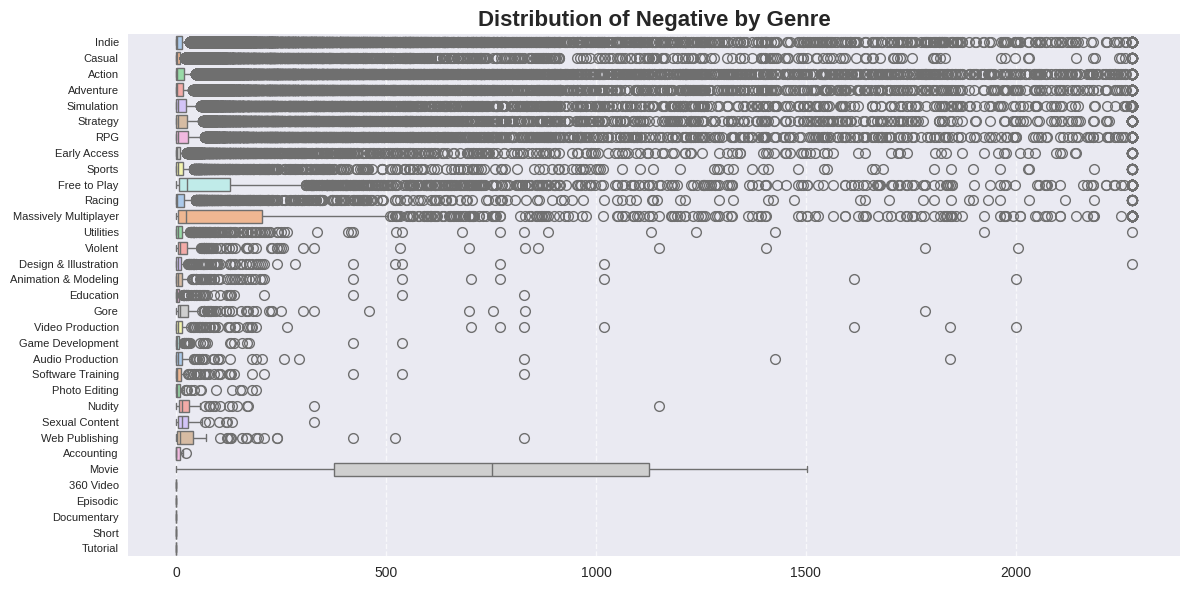

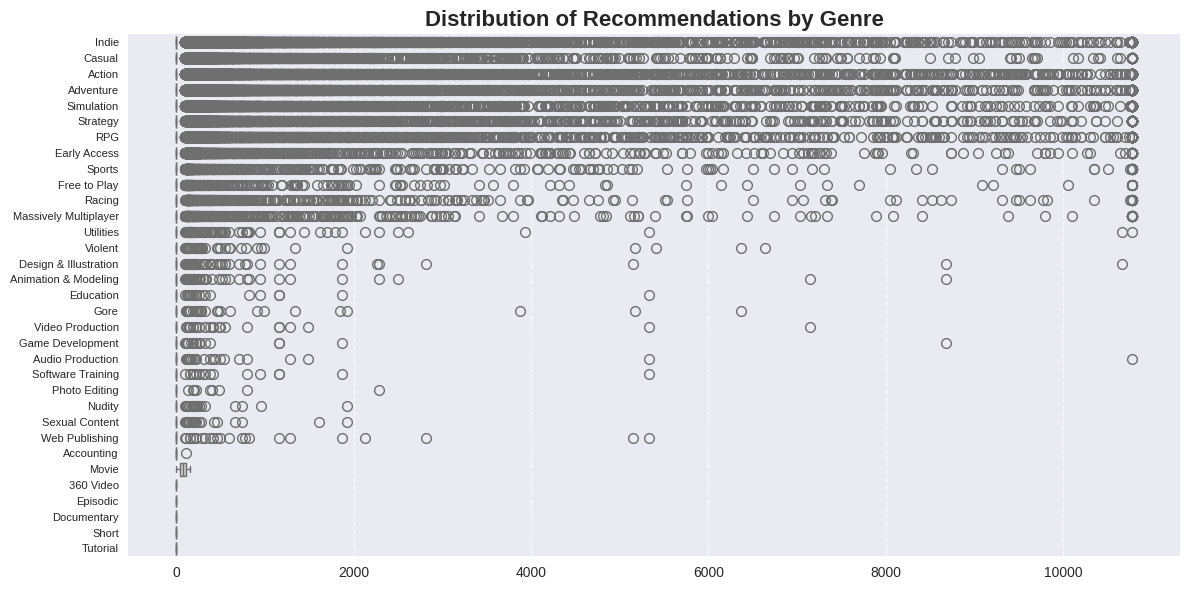

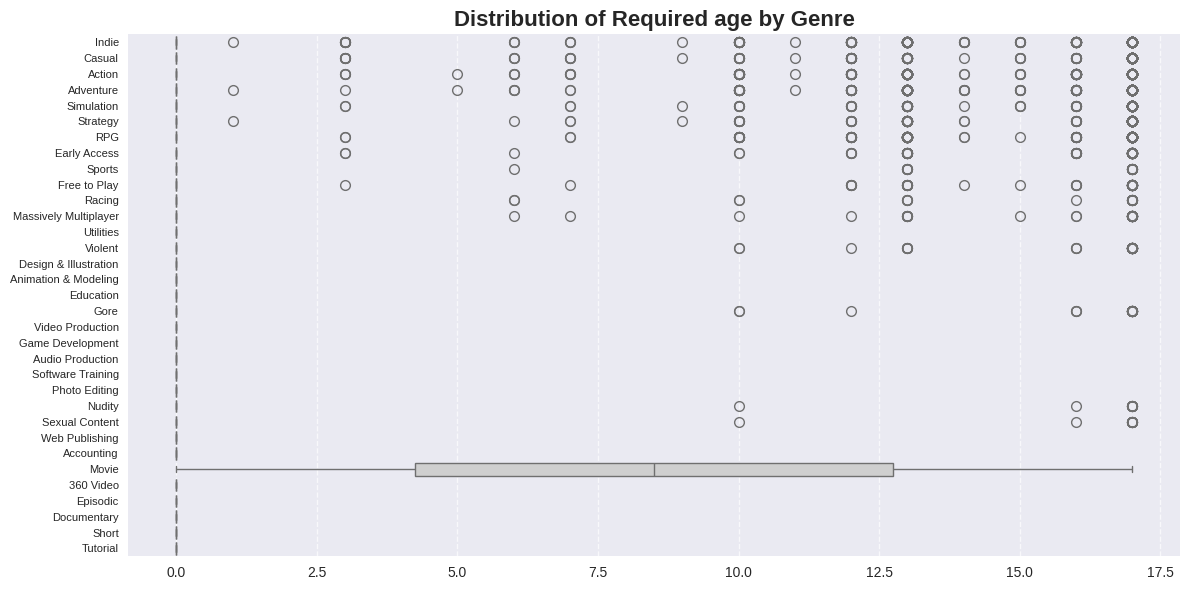

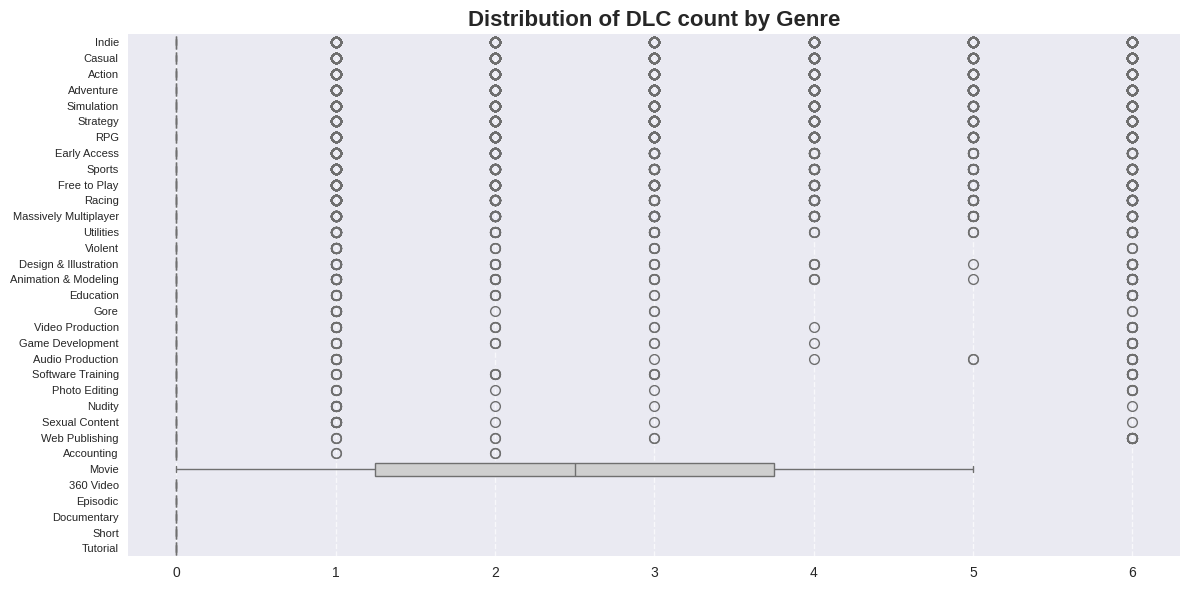

In [ ]:
# Loop through each numerical column and create a boxplot
for col in cols_to_analyze:

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_melted_genres_for_boxplot, y='Genre', x=col, palette='pastel')
    plt.title(f'Distribution of {col} by Genre', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.xticks(rotation=0, ha='center', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

> **Insight from distribution**

**1. Distribution of Estimated Owners by Genre**

- **Free to Play** and **Massively Multiplayer** show the widest distribution with extreme outliers at high values, demonstrating their potential to attract massive player bases
- **Indie**, **Action**, **Adventure** have substantial owner counts but more concentrated distributions
- Specialized categories like **Accounting**, **Movie**, **360 Video**, **Documentary** show near-zero ownership, reflecting very small niche markets
- **Strategy** and **RPG** also demonstrate strong market presence

**2. Distribution of Price by Genre**

- **Free to Play** has price = 0 (obviously)
- **Design & Illustration**, **Animation & Modeling**, **Video Production** show the highest average prices, reflecting their nature as professional tools
- Popular gaming genres (**Action**, **Adventure**, **Indie**, **RPG**) display diverse price distributions with many high-value outliers
- **Early Access** shows quite wide price distribution, reflecting flexible pricing strategies during development phases
- Most games are priced under \$20

**3. Distribution of Positive Reviews by Genre**

- **Indie**, **Action**, **Adventure** lead in positive review counts with wide distributions
- **Free to Play** and **Massively Multiplayer** have extreme outliers, indicating some hugely successful titles
- **Strategy**, **RPG**, **Simulation** show stable positive engagement levels
- Specialized categories(**Accounting**, **Movie**, **360 Video**, **Episodic**, **Documentary**, **Short**, **Tutorial**) have very few positive reviews, correlating with low user bases

**4. Distribution of Negative Reviews by Genre**
- Similar pattern to positive reviews: larger genres have more negative reviews due to larger user bases
- **Free to Play** shows high outliers, possibly due to controversial business models
- **Early Access** also has some outliers, reflecting risks of unfinished games
- Overall negative/positive ratio appears relatively low across most specialized categories

**5. Distribution of Recommendations by Genre**
- **Indie**, **Action**, **Adventure** continue to lead, confirming their popularity
- **Free to Play** shows extreme outliers, demonstrating viral potential
- Recommendation patterns closely mirror positive review distributions
- Reflects strong word-of-mouth marketing capabilities of popular genres

**6. Distribution of Required Age by Genre**
- Most games have no required age or very low (family-friendly content)
- **Action**, **Adventure**, **RPG** show some outliers at 12-17 levels, appropriate for violent/sensitive content
- **Violent** and **Sexual Content** categories would logically have higher age requirements
- Professional tools (e.g.**Accounting**, **Movie**)show no age restrictions

**7. Distribution of DLC Count by Genre**
- Most games have 0-1 DLC, indicating limited post-launch content development
- **Action**, **RPG**, **Strategy**, **Simulation** show higher outliers, reflecting that successful games in these genres often develop multiple expansions
- **Free to Play** has DLC potential but may use microtransaction models instead of traditional DLC
- Specialized categories rarely have DLC

---

 **Overall Conclusions:**

The Steam data reveals clear segmentation between:
- **Mainstream gaming genres** (Indie, Action, Adventure, Free to Play, Massively Multiplayer, RPG, Strategy, Simulation) - core market with high ownership, large review volumes, strong recommendation counts, diverse price distributions, and often include multiple DLCs.

  These are the most active and competitive genres on Steam.

- **Free-to-play and MMO** - massive scale potential but potentially polarizing

- **Professional tools** (Design & Illustration, Animation & Modeling, Video Production, Accounting, Web Publishing, Movie, 360 Video, Episodic, Documentary, Short, Tutorial) - show very low engagement in terms of ownership, reviews, and recommendations.
However, some titles may have higher prices, likely reflecting their professional or niche utility, and they rarely offer DLC.

- **Specialized content** - very small markets with limited commercial viability


# **5. Exploratory Data Analysis**

## **📊 Dataset Overview**

In [ ]:
# Setup Pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)      # Show more rows
pd.set_option('display.width', 1000)        # Auto-adjust to notebook/console width

In [ ]:
print(f"Total Games: {df_games_encoded.shape[0]:,}")
print(f"Total Features: {df_games_encoded.shape[1]:,}")

Total Games: 85,268
Total Features: 54


In [ ]:
df_games_encoded.head(3)

AppID              Name Release date  Estimated owners  Required age  Price  DLC count  Positive  Negative  Recommendations             Developers             Publishers  Release year  Release month  Total reviews  Review ratio  Game age Price category  Popularity score  Value score Popularity quintile  360 Video  Accounting  Action  Adventure  Animation & Modeling  Audio Production  Casual  Design & Illustration  Documentary  Early Access  Education  Episodic  Free to Play  Game Development  Gore  Indie  Massively Multiplayer  Movie  Nudity  Photo Editing  RPG  Racing  Sexual Content  Short  Simulation  Software Training  Sports  Strategy  Tutorial  Utilities  Video Production  Violent  Web Publishing
0    20200  Galactic Bowling   2008-10-21           10000.0           0.0  19.99        0.0       6.0      11.0              0.0  Perpetual FX Creative  Perpetual FX Creative          2008             10             17      0.352941        17         $10-30          0.076837     0.001292                High          0           0       0          0                     0                 0       1                      0            0             0          0         0             0                 0     0      1                      0      0       0              0    0       0               0      0           0                  0       1         0         0          0                 0        0               0
1   655370      Train Bandit   2017-10-12           10000.0           0.0   0.99        0.0      53.0       5.0              0.0           Rusty Moyher           Wild Rooster          2017             10             58      0.913793         8      Under $10          0.084167     0.038649                High          0           0       1          0                     0                 0       0                      0            0             0          0         0             0                 0     0      1                      0      0       0              0    0       0               0      0           0                  0       0         0         0          0                 0        0               0
2  1732930      Jolt Project   2021-11-17           10000.0           0.0   4.99        0.0       0.0       0.0              0.0          Campião Games          Campião Games          2021             11              0      0.000000         4      Under $10          0.000000     0.000000          Bottom 20%          0           0       1          1                     0                 0       0                      0            0             0          0         0             0                 0     0      1                      0      0       0              0    0       0               0      0           0                  0       0         1         0          0                 0        0               0

In [ ]:
df_games_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85268 entries, 0 to 110997
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AppID                  85268 non-null  int64         
 1   Name                   85268 non-null  string        
 2   Release date           85268 non-null  datetime64[ns]
 3   Estimated owners       85268 non-null  float64       
 4   Required age           85268 non-null  float64       
 5   Price                  85268 non-null  float64       
 6   DLC count              85268 non-null  float64       
 7   Positive               85268 non-null  float64       
 8   Negative               85268 non-null  float64       
 9   Recommendations        85268 non-null  float64       
 10  Developers             85268 non-null  string        
 11  Publishers             85268 non-null  string        
 12  Release year           85268 non-null  int32         
 13  Relea

In [ ]:
col_to_check = ['Estimated owners', 'Required age', 'Price', 'DLC count', 'Positive', 'Negative', 'Recommendations',
                'Total reviews', 'Review ratio', 'Game age', 'Popularity score', 'Value score']

# Format floats to 2 decimal places
pd.options.display.float_format = '{:,.2f}'.format

# Now display summary again
df_games_encoded[col_to_check].describe()

Estimated owners  Required age     Price  DLC count  Positive  Negative  Recommendations  Total reviews  Review ratio  Game age  Popularity score  Value score
count         85,268.00     85,268.00 85,268.00  85,268.00 85,268.00 85,268.00        85,268.00      85,268.00     85,268.00 85,268.00         85,268.00    85,268.00
mean          53,948.73          0.31      7.82       0.27    350.79     67.17           276.96       1,126.56          0.63      4.93              0.11         0.02
std          183,902.46          2.22      8.60       0.87  1,594.10    283.19         1,321.38      28,099.14          0.36      3.11              0.14         0.05
min           10,000.00          0.00      0.00       0.00      0.00      0.00             0.00           0.00          0.00      1.00              0.00         0.00
25%           10,000.00          0.00      1.99       0.00      1.00      0.00             0.00           2.00          0.41      2.00              0.03         0.00
50%           10,000.00          0.00      4.99       0.00      9.00      2.00             0.00          12.00          0.76      4.00              0.06         0.01
75%           10,000.00          0.00      9.99       0.00     51.00     15.00             0.00          69.00          0.94      7.00              0.13         0.02
max        1,500,000.00         17.00     49.99       6.00 12,888.00  2,277.33        10,781.28   6,531,097.00          1.00     21.00              1.00         0.92

> **Descriptive Statistics Summary**

**1. Estimated owners**

* **Min** is 10,000, indicating all games have at least some ownership after filtering out zero-owner titles.
* **Mean** is \~53,949, but with a very large standard deviation (183,902.46) and **max** of 1,500,000, suggesting a **strong right-skewed distribution**. A few massively popular titles raise the average.
* **75% of games** have owner counts below 10,000 (due to capping), showing that most games fall into the low-to-mid owner.

**2. Required age**

* **Mean** is very low (0.31), **max** is 17. Most games have no age restrictions or are suitable for all ages.
* Higher age ratings (e.g., 17+) appear only in a few genres such as Action or Mature content.

**3. Price**

* **Average** is \$7.82, suggesting that most games are affordably priced.
* **Max** is capped at \$49.99, with most games priced well below that.
* **Median** is \$4.99 , lower than the mean, indicating a right-skewed price distribution with many low-priced games and fewer high-end titles.

**4. DLC count**

* **Average** is 0.27, and **max (after capping)** is 6, this suggests most games have **few or no DLCs**

**5. Positive & Negative reviews**

* Both columns show high variability:

  * Positive: mean 350.79, std 1,594.10
  * Negative: mean 67.17, std 283.19
* Some games receive extremely high review volumes, while most remain in the low-review range.
* **Max (after capping)** (Positive: 12,888.00; Negative: 2,277.33) reflect top-performing titles that dominate attention.

**6. Recommendations**

* **Mean** is 67.17, but **std** is 283.19, another skewed metric.
* **Max (after capping)** of 2,277.33 indicates that a few games generate massive community recommendations.

**7. Total reviews**

* Derived from positive + negative reviews.
* **Mean** is 1,126.56, but **max (after capping)** over 6.5 million emphasizes the skew caused by a few blockbuster games.

**8. Review ratio**

* **Mean** is 0.63 and **median** is 0.76 → most games receive **more positive than negative feedback**.
* The distribution ranges from 0.41 (25%) to 0.94 (75%), indicating varied reception quality across games.

**9. Game age**

* **Mean** is 4.93 years, with a **max of 21 years**.
* The dataset contains both recent releases and long-standing classics, giving a wide age spread.

**10. Popularity score & Value score**

* Normalized to \[0, 1] scale.
* **Mean** are low (0.11 and 0.02), but **max** are very high (1 and 0.92).
* Only a few games score highly, confirming a highly concentrated success model.

---

**Conclusions**

This summary highlights the diverse and imbalanced nature of the Steam game market:

* Most games are affordable, have moderate to low ownership, and receive few reviews.
* A small number of hit games dominate key metrics (ownership, reviews, recommendations), leading to highly skewed distributions.
* Tool-based or non-traditional content genres typically show low engagement but may have higher price points due to their niche/professional focus.
* Overall, the market is competitive but unequal, favoring a small number of hit titles that gain outsized attention, reviews, and player base.



## **5.1. Market Overview and Fundamentals**

### **5.1.1. Market Size and Genre Diversity**

In [ ]:
total_games = df_games_encoded.shape[0]
total_genres = len(genre_cols)

In [ ]:
avg_price = df_games_encoded['Price'].mean()
median_price = df_games_encoded['Price'].median()
avg_reviews = df_games_encoded['Total reviews'].mean()

In [ ]:
print(f"🎯 Market Scale:")
print(f"    • Total Games: {total_games:,}")
print(f"    • Unique Genres: {total_genres}")
print(f"    • Average Games per Genre: {total_games/total_genres:.0f}")

print(f"\n📈 Market Economics:")
print(f"    • Average Price: ${avg_price:.2f}")
print(f"    • Median Price: ${median_price:.2f}")
print(f"    • Average Reviews: {avg_reviews:,.0f}")

🎯 Market Scale:
    • Total Games: 85,268
    • Unique Genres: 33
    • Average Games per Genre: 2584

📈 Market Economics:
    • Average Price: $7.82
    • Median Price: $4.99
    • Average Reviews: 1,127


- 85,268 games across 33 genres demonstrates the incredible diversity and scale of the modern gaming market.
- Most games are affordably priced (median \$4.99, average \$7.82) and receive around 1,127 reviews on average.

### **5.1.2. Business Model Distribution**

In [ ]:
# Numbers of free games
free_games = df_games_encoded[df_games_encoded['Price'] == 0].shape[0]

# Numbers of paid games
paid_games = total_games - free_games

# % Free vs Paid
pct_free = (free_games / total_games) * 100
pct_paid = (paid_games / total_games) * 100

In [ ]:
print(f"\n💰 Business Model Distribution:")
print(f"    • Free Games: {pct_free:.1f}% ({free_games:,} games)")
print(f"    • Paid Games: {pct_paid:.1f}% ({paid_games:,} games)")


💰 Business Model Distribution:
    • Free Games: 9.1% (7,764 games)
    • Paid Games: 90.9% (77,504 games)


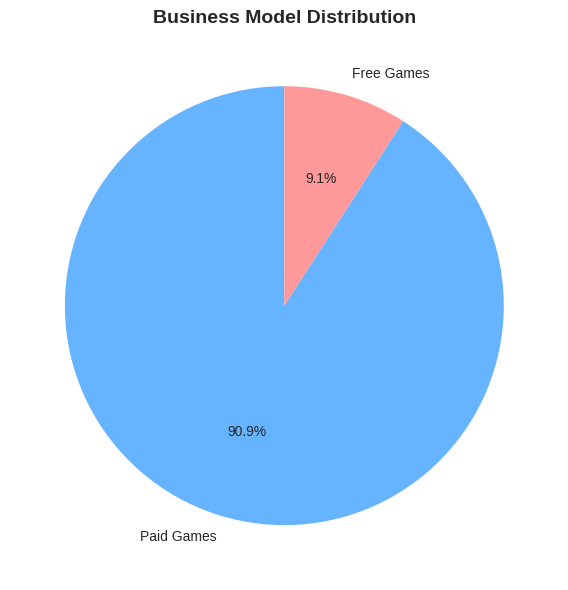

In [ ]:
# Visualization: Business Model Distribution
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6)) # Adjusted to 1 subplot as price distribution is in a separate cell now

# Pie chart for business model
labels = ['Paid Games', 'Free Games']
sizes = [pct_paid, pct_free]
colors = ['#66b3ff','#ff9999']

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Business Model Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()

plt.show()

Most games on Steam are paid (90.9%), while free-to-play titles make up very small (9.1%) of the platform.

> **📌 Market Highlights**

- **Commercial Focus:**
Steam is heavily dominated by paid games (90.9%), reflecting a mature and revenue-driven ecosystem rather than one centered on free-to-play models.

- **Genre Diversity:**
With 33 distinct genres, the platform offers high content variety, appealing to a wide range of player preferences.

- **Accessible Pricing:**
The average price of \$7.82 (median $4.99) suggests a market that is budget-friendly and supportive of indie developers.



---
> **🎯 Key Recommendations**

**For Game Developers:**
Focus on the **paid game model**, which dominates 90.9% of the market. Set pricing around **\$5-8** (median \$4.99, average \$7.82), and explore **niche opportunities** across 33 available genres to stand out.

**For Publishers and Investors:**
Steam's ecosystem is **mature and stable** with over 85,000 games. Don’t overlook the **indie segment**, which benefits from accessible pricing. Prioritize **quality over quantity** in a crowded landscape (avg 1,127 games per genre).

**For Marketing Strategy:**
Leverage **genre diversity** to target different player segments. A **budget-friendly approach** aligns with player expectations, with a median price of \$4.99 appealing to mass-market audiences.

**For Business Model:**
The **paid model outperforms free-to-play** (90.9% vs 9.1%). Use a **moderate pricing strategy** around \$7.82, and focus on **delivering quality** to drive engagement, shown by the average of 1,127 reviews per game.

## **5.2. Temporal Market Evolution**

### **5.2.1. Release Volume Over Time**

In [ ]:
# Filter out the current incomplete year (e.g., 2025) for plotting purposes
# Assuming current_year is defined and represents the year with potentially incomplete data
games_per_year_filtered = df_games_encoded['Release year'].value_counts().sort_index()

In [ ]:
# Define start and end years for growth rate calculation
growth_rate_start_year = 2014
growth_rate_end_year = games_per_year_filtered.index.max()

In [ ]:
print(f"📅 Release Trends:")
print(f"    • Peak Year: {games_per_year_filtered.idxmax()} ({games_per_year_filtered.max():,} games)")

# Adjusted growth rate calculation to use filtered data
if growth_rate_start_year in games_per_year_filtered.index and growth_rate_end_year in games_per_year_filtered.index:
    growth_rate = ((games_per_year_filtered.get(growth_rate_end_year, 0) / games_per_year_filtered.get(growth_rate_start_year, 1)) - 1) * 100
    print(f"    • Growth Rate {growth_rate_start_year}-{growth_rate_end_year}: {growth_rate:.0f}%")
else:
    print(f"    • Growth Rate for {growth_rate_start_year}-{growth_rate_end_year}: Not enough data for calculation.")


📅 Release Trends:
    • Peak Year: 2024 (12,128 games)
    • Growth Rate 2014-2024: 650%


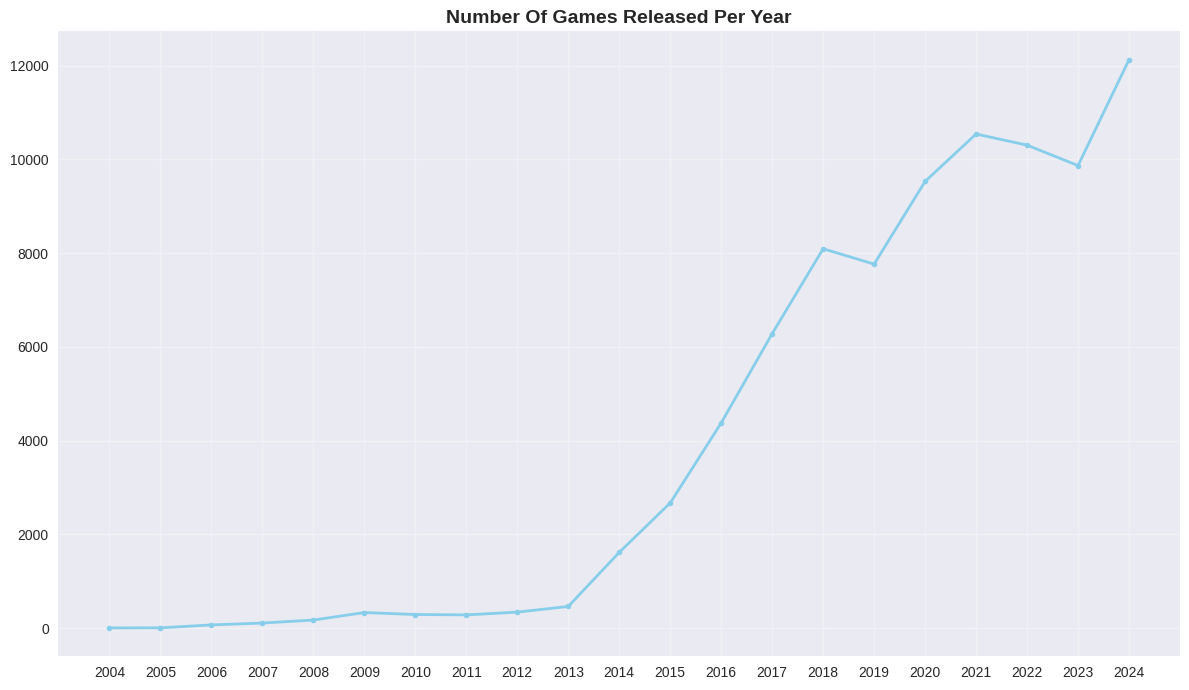

In [ ]:
# Visualization: Games Released Per Year
plt.figure(figsize=(12, 7))
games_per_year_filtered.plot(kind='line', marker='o', linewidth=2, markersize=4, color='skyblue')
plt.title('Number Of Games Released Per Year', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlabel("")
plt.xticks(games_per_year_filtered.index.astype(int), rotation=0)

plt.tight_layout()
plt.show()

> **Number of Games Released Per Year**

**Growth Timeline:**
- **2004-2012**: Minimal releases (~100-500 games/year) - Steam's early restrictive curation period
- **2013-2016**: Rapid acceleration begins, reaching ~2,000-4,000 games annually
- **2017-2019**: Massive surge to ~8,000-10,000 games per year
- **2020-2022**: **COVID-19 BOOM** - Peak at ~10,000-12,000+ games annually
- **2023-2024**: **Post-COVID surge** - Sustained growth to 12,000+ games

**Critical Turning Points:**
- **2013**: Steam Greenlight impact - community-driven approval system
- **2017**: Steam Direct launch - $100 fee replaces Greenlight, removes most barriers
- **2020-2021**: **COVID-19 catalyst** - lockdowns drove both development and consumption
- **2023-2024**: **Perfect storm continuation** - multiple factors converging

**COVID-19 & Post-COVID Impact (2020-2024):**
- **Immediate COVID effects**: Lockdowns created time for learning game development, career pivots from job losses, increased gaming demand, and better remote development tools
- **Post-COVID drivers**: 2-3 year development lag from pandemic projects, economic pressures driving alternative income seeking, AI tools explosion (ChatGPT, Midjourney), better development engines, success stories inspiring more attempts, and Steam Deck creating new demand

**Market Implications:**
- **Democratization**: Easier access for indie developers across all skill levels
- **Discoverability crisis**: Massive competition for visibility intensified by sustained high volume
- **Quality concerns**: Rapid development cycles and lower barriers may affect average game polish
- **Revenue distribution**: Wealth likely concentrated among top performers despite exponential volume increase

The data shows Steam's evolution from a curated platform to an open marketplace, with COVID-19 acting as a significant accelerant that created lasting structural changes in game development accessibility and market dynamics.

### **5.2.2. Genre Evolution Analysis (Top 5 Genres)**

In [ ]:
# Count number of games per genre by year
genre_evolution = {}
for genre in genre_cols:  # Iterate through all genres
    yearly_counts = df_games_encoded[df_games_encoded[genre] == 1]['Release year'].value_counts().sort_index()
    genre_evolution[genre] = yearly_counts

# Create DataFrame: rows = years, columns = genres
genre_evolution_df = pd.DataFrame(genre_evolution).fillna(0)

# Get top 5 genres by total game count
top_genres = genre_evolution_df.sum().nlargest(5)

In [ ]:
print(f"\n🎯 Genre Evolution (Top 5) in 2022 - 2024:")
for genre, total in top_genres.items():
    recent_growth = genre_evolution_df[genre].iloc[-3:].mean() if len(genre_evolution_df[genre]) >= 3 else 0
    print(f"    • {genre}: {total:,.0f} total games, {recent_growth:.0f} avg/year")


🎯 Genre Evolution (Top 5) in 2022 - 2024:
    • Indie: 60,139 total games, 7441 avg/year
    • Casual: 35,912 total games, 4800 avg/year
    • Action: 35,088 total games, 4247 avg/year
    • Adventure: 33,307 total games, 4423 avg/year
    • Simulation: 17,190 total games, 2304 avg/year


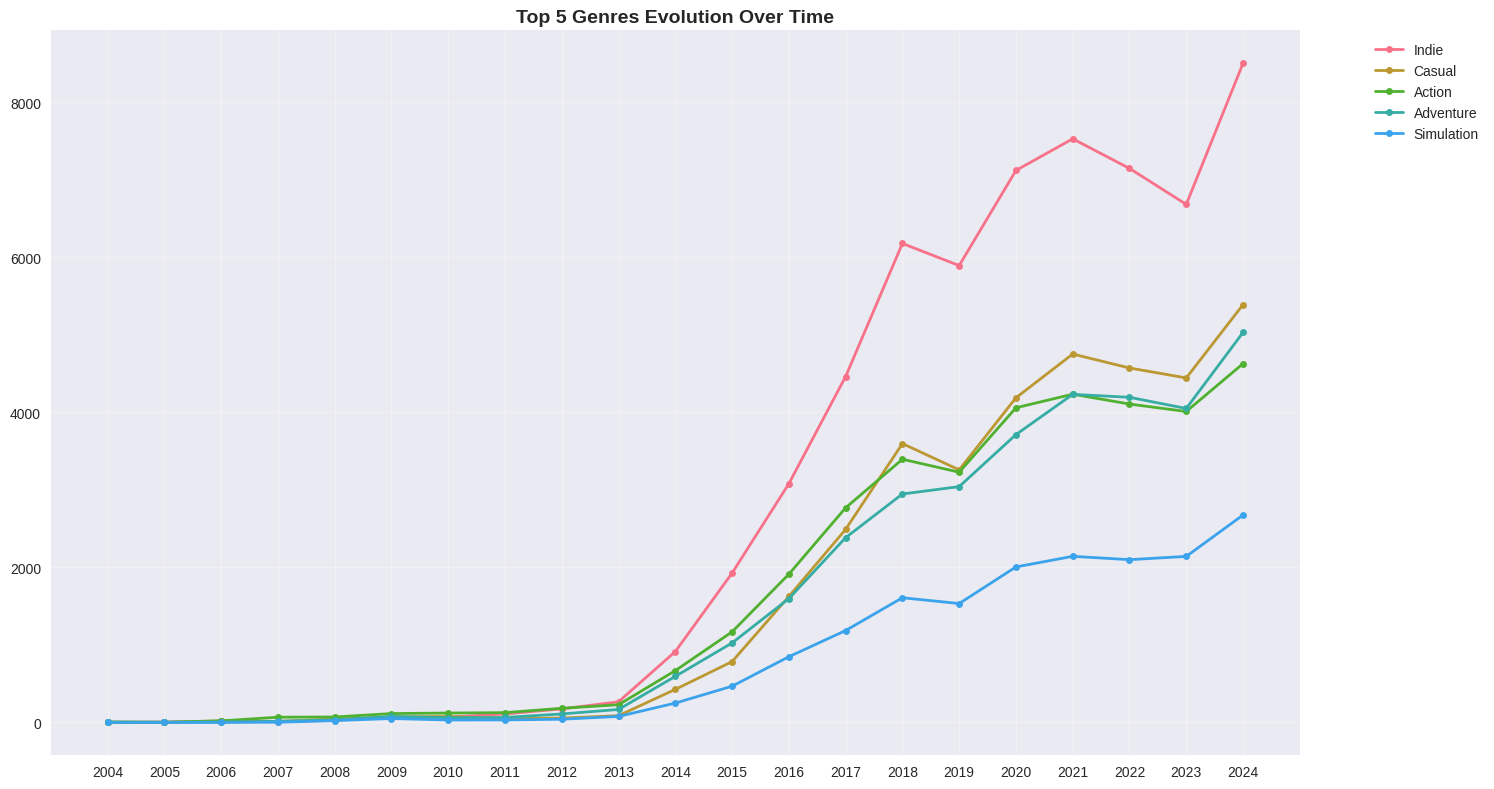

In [ ]:
# Visualization: Top 5 Genres Evolution
plt.figure(figsize=(15, 8))
for genre in top_genres.index:
    plt.plot(genre_evolution_df.index, genre_evolution_df[genre],
             marker='o', linewidth=2, label=genre, markersize=5)
plt.title('Top 5 Genres Evolution Over Time', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(genre_evolution_df.index.astype(int), rotation=0)

plt.tight_layout()
plt.show()

> **Top 5 Genres Evolution Over Time**

**Indie Genre Dominance:**
- **Explosive growth trajectory**: From near-zero to 8,000+ games by 2024
- **2017 inflection point**: Steam Direct launch triggered massive indie surge (as mentioned in previous analysis)
- **COVID acceleration**: 2020-2022 boom period evident across all genres but most pronounced in Indie
- **Market leader**: Indie now represents the largest single genre category on Steam

**Traditional Gaming Genres (Action, Adventure, Casual):**
- **Parallel growth patterns**: All three show similar exponential curves starting ~2013-2017
- **Convergence around 4,000-5,000 games**: Action, Adventure, and Casual reached similar volumes by 2024
- **Steady acceleration**: Less volatile than Indie but consistent upward trajectory
- **Market maturation**: Growth rate stabilizing in recent years

**Simulation - The Outlier:**
- **Slowest growth**: Consistently lowest among top 5 genres
- **Steady but modest**: Gradual increase to ~2,500 games by 2024
- **Niche sustainability**: Despite lower volume, maintains consistent presence in top 5
- **Specialized market**: Reflects dedicated but smaller audience base

**Key Observations:**
- **2013-2017 democratization period**: All genres benefit from Steam's policy changes (as discussed previously)
- **COVID impact universal**: 2020-2022 surge affects all top genres, confirming pandemic development boom
- **Indie's exceptional rise**: Disproportionate growth suggests lower barriers to entry for independent developers
- **Market concentration**: Top 5 genres likely represent majority of Steam's total releases

The data reinforces Steam's transformation into an indie-dominated platform while traditional genres maintain strong but more moderate growth patterns.

### **5.2.3 Market Maturity Analysis**

In [ ]:
yearly_stats = df_games_encoded.groupby('Release year').agg({
    'Price': 'mean',
    'Popularity score': 'mean', # This now uses the yearly-normalized Popularity Score
    'Total reviews': 'mean'
}).fillna(0)

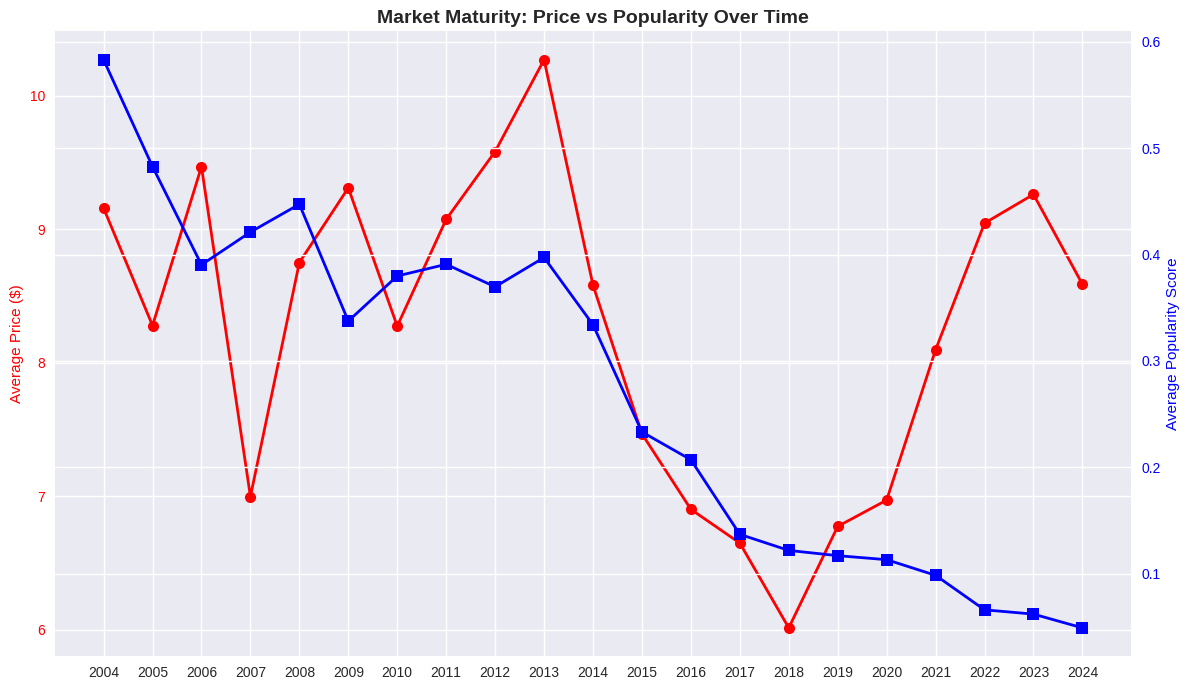

In [ ]:
# Visualization: Market Maturity: Price vs Popularity Over Time
fig, ax3 = plt.subplots(figsize=(12, 7))
ax3_twin = ax3.twinx()
line1 = ax3.plot(yearly_stats.index, yearly_stats['Price'],
                 color='red', marker='o', linewidth=2, label='Avg Price', markersize=8)
line2 = ax3_twin.plot(yearly_stats.index, yearly_stats['Popularity score'],
                      color='blue', marker='s', linewidth=2, label='Avg Popularity', markersize=8)

ax3.set_title('Market Maturity: Price vs Popularity Over Time', fontsize=14, fontweight='bold')
ax3.set_xlabel('')
ax3.set_ylabel('Average Price ($)', color='red')
ax3_twin.set_ylabel('Average Popularity Score', color='blue')
ax3.tick_params(axis='y', labelcolor='red')
ax3_twin.tick_params(axis='y', labelcolor='blue')
ax3.set_xticks(yearly_stats.index.astype(int))
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

> **Steam Price & Popularity Trends (2004-2024)**

**1. Price Trends**

* **2004-2010 (Stable):** Average game prices remained steady at around **\$8-9** due to low competition and fewer titles.
* **2011-2014 (Volatile):** Prices dropped sharply to **\~\$7** in 2011 with the rise of indie games, then spiked to **\~\$11** in 2013-2014 during the AAA game boom.
* **2015-2018 (Significant Decline):** A steady decrease from **\$11 to \~\$6**, driven by an explosion of low-cost indie games and intense price competition.
* **2019-2024 (Recovery):** Prices gradually recovered to **\~\$9**, indicating a more stable market and a player base willing to pay for quality titles.


**2. Popularity Score Trends**

* **2004-2010 (Peak Period):** Popularity scores were high (**\~0.55**) due to a smaller catalog and easier discoverability for each title.
* **2011-2014 (Gradual Decline):** Scores began to drop as the market expanded and competition increased.
* **2015-2018 (Steepest Drop):** A sharp decline in popularity scores, largely due to the indie game boom, which made it harder for individual games to gain attention.
* **2019-2024 (Stable but Low):** Popularity scores stabilized around **\~0.1**, reflecting a mature and highly competitive ecosystem.


**3. Why Are Popularity Scores Still Declining Despite Yearly Normalization?**

* **Normalization Paradox:**
  Normalizing scores per year allows fair comparisons **within the same year** (i.e., the most popular game still scores \~1.0 each year).
  However, the **average popularity score drops** over time because the number of released games has skyrocketed, from hundreds to thousands annually.

* **Market Reality:**
  The surge in game quantity has **diluted player attention**, reducing the likelihood of any single game being widely discovered.
  As a result, the **average popularity score decreases**, even though standout successes still exist.

**4. Market Development Phases**

* **Phase 1 (2004-2010):** Early-stage market with few games, relatively high popularity, and stable pricing.
* **Phase 2 (2011-2014):** Rapid market expansion, more titles, price volatility, and declining popularity.
* **Phase 3 (2015-2018):** Market saturation, indie boom, price drop, and lowest popularity scores.
* **Phase 4 (2019-2024):** Mature market, price recovery, and stable but low popularity levels.

**5. Key Insights**

* **Inverse Relationship Post-2014:** As prices dropped, **average popularity also declined**, highlighting market oversaturation with cheap games.
* **For Developers:** **Marketing is critical** to stand out. High-quality games can still command premium prices if well-promoted.
* **For Players:** Players enjoy more **choices and competitive prices**, but discovering good games becomes harder. They must rely more on **reviews and recommendations**.

### **5.2.4. Seasonal Release Patterns**

In [ ]:
# Create 'Release season' column
if 'Release season' not in df_games_encoded.columns:
    df_games_encoded['Release month'] = df_games_encoded['Release date'].dt.month
    def get_season(month):
        if month in [3, 4, 5]: return 'Spring'
        elif month in [6, 7, 8]: return 'Summer'
        elif month in [9, 10, 11]: return 'Fall'
        else: return 'Winter'
    df_games_encoded['Release season'] = df_games_encoded['Release month'].apply(get_season)

seasonal_releases = df_games_encoded['Release season'].value_counts()

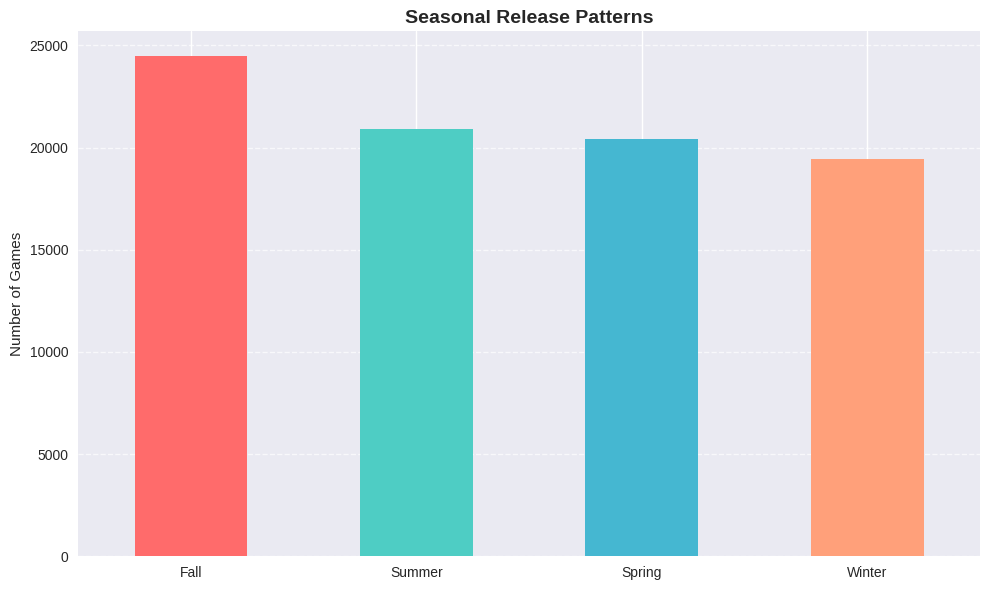

In [ ]:
# Visualization: Seasonal Release Patterns
plt.figure(figsize=(10, 6))

seasonal_releases.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
plt.title('Seasonal Release Patterns', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Number of Games')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **Fall** leads in game releases (~24,500 games) aligning with the holiday season and major sales ,  a prime window for visibility and revenue.

- **Summer and Spring** follow closely (~20,800 and ~20,500 games), benefiting from school breaks and post-winter demand.

- **Winter** sees the fewest releases (~19,500 games), likely due to the post-holiday slowdown and focus on Fall launches.

**Conclusion:** Game releases follow a clear seasonal cycle, peaking in Fall and dipping in Winter

### **5.2.5. Seasonal Release Patterns by Genre**

In [ ]:
# Aggregate data: count games per genre per season
# We need to melt the dataframe to easily group by genre and season
df_seasonal_genres = df_games_encoded[['Release season'] + genre_cols]

# Melt the genre columns into rows
df_melted_seasonal_genres = df_seasonal_genres.melt(
    id_vars=['Release season'],
    var_name='Genre',
    value_name='Is_Genre'
)

# Filter for rows where the game actually belongs to the genre (Is_Genre == 1)
df_melted_seasonal_genres = df_melted_seasonal_genres[df_melted_seasonal_genres['Is_Genre'] == 1].drop(columns=['Is_Genre'])

# Count games per season and genre
seasonal_genre_counts = df_melted_seasonal_genres.groupby(['Release season', 'Genre']).size().unstack(fill_value=0)

# Reorder seasons for logical display
ordered_seasons = ['Spring', 'Summer', 'Fall', 'Winter']
seasonal_genre_counts = seasonal_genre_counts.reindex(ordered_seasons, axis=0).fillna(0)

# Filter the seasonal_genre_counts to include all genres (removed top N filter)
seasonal_genre_counts_filtered = seasonal_genre_counts.T # Transpose for Genre on Y, Season on X


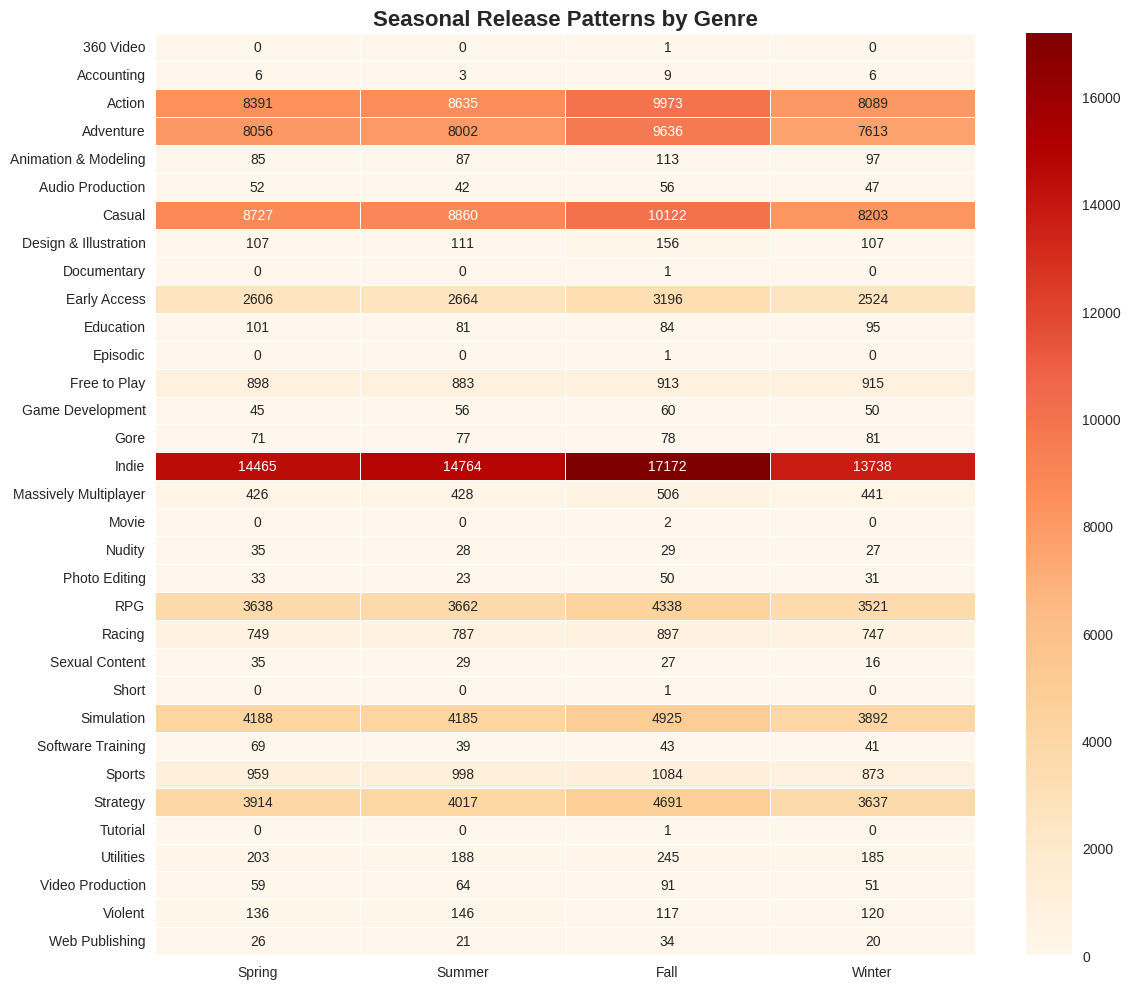

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(seasonal_genre_counts_filtered, annot=True, fmt='d', cmap='OrRd', linewidths=.5)
plt.title('Seasonal Release Patterns by Genre', fontsize=16, fontweight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.tight_layout()
plt.show()

> **Steam Seasonal Release Patterns by Genre**

**1. Major Genre Seasonal Trends:**
* **Indie Games (Market Leader):** Consistently high volume year-round (over 14,000 releases per season), with a significant **peak in Fall (17,172 releases)**. This indicates a strategic timing by indie developers to maximize visibility during the holiday period.
* **Action & Adventure Games:** Maintain a steady release schedule across seasons (Action: 8,000-9,000 releases; Adventure: 7,600-9,600 releases), with a slight preference for **Fall (Action: 9,973; Adventure: 9,636)**.
* **Casual Games:** Show strong year-round appeal (8,200-8,900 releases in other seasons), but clearly **peak in Fall (10,122 releases)**, targeting relaxed gaming during holiday periods.

**2. Genre-Specific Seasonal Strategies:**
* **RPG Games:** Strongly favor **Fall (4,338 releases)**, aligning with the longer playtimes and indoor gaming typically associated with cooler months.
* **Simulation Games:** Uniquely show a **Fall peak (4,925 releases)**, potentially aligning with themes of renewal, building.
* **Strategy Games:** Also focus on **Fall (4,691 releases)**, but experience a noticeable **dip in Winter (3,637 releases)**, suggesting a preference for periods where players have more focused time.
* **Sports Games:** Peak in **Fall (1,084 releases)**, directly correlating with major real-world sports seasons.
* **Early Access Games:** Show a **Fall spike (3,196 releases)**, indicating developers leverage this period for ongoing project momentum, while maintaining year-round development (2,500-2,700 releases in other seasons).

**3. Niche Genre Patterns:**
* **Specialized Categories (e.g., Education, Utilities, Professional Tools like Design & Illustration, Animation & Modeling):** Exhibit **minimal seasonality** and consistently low release volumes (typically 40-250 releases per season). Their release cycles are less influenced by general gaming trends and more by development completion or specific market demand

**4. Key Strategic Insights:**
* **Fall is the most competitive season:** While offering maximum exposure, the high volume of releases across major genres creates intense competition.
* **Spring offers balance:** Provides a less crowded launch window, particularly suitable for genres like Simulation.
* **Winter presents opportunity:** Lower overall volume across most genres suggests potential for higher visibility for standout titles.

💡 Developers should strategically align their game's genre and theme with seasonal player behavior and market saturation levels for optimal visibility and impact.


---
> **🎯 Key Recommendations**

* **Release Timing:**

  * Launch in **Fall** for peak exposure (**24,500+ games**);

  * Consider **Spring** (less competition, ideal for Simulation);

  * Avoid **Winter** (**19,500 games**, post-holiday slowdown).

* **Genre Strategy:**
  * Focus on **Indie** (**8,000+ games/year**) - easiest entry point;
  * Stick with **Action, Adventure, Casual** - stable, high-volume genres (**4,000-5,000/year**);
  * Avoid **Simulation** - slowest among top 5 genres.

* **Pricing Strategy:**
  * Prioritize **quality over quantity** - oversaturation lowered popularity;
  * **Marketing investment** is critical for visibility.

* **Development Timeline:**
  * Post-COVID boom = **12,000+ games/year** - stay competitive;
  * Use **AI tools** (e.g. ChatGPT, Midjourney) for faster production;
  * Plan a **2-3 year cycle** to align with market trends.

**💡 Core Strategy:** Launch in Fall + strong marketing + Indie/Action = optimal market entry

## **5.3. Price Strategy and Value Analysis**

### **5.3.1. Price Segmentation Analysis**

In [ ]:
price_segments = df_games_encoded.groupby('Price category').agg({
    'Price': ['mean', 'count'],
    'Popularity score': 'mean',
    'Total reviews': 'mean',
    'Review ratio': 'mean'
}).round(2)

In [ ]:
print(f"💰 Price Segmentation Performance:")
print(price_segments)

💰 Price Segmentation Performance:
               Price        Popularity score Total reviews Review ratio
                mean  count             mean          mean         mean
Price category                                                         
Free            0.00   7764             0.17      3,527.75         0.68
Under $10       4.76  58295             0.08        312.22         0.61
$10-30         17.56  17247             0.17      2,060.44         0.68
$30-60         43.15   1693             0.27      8,523.97         0.66
Over $60       49.99    269             0.11      1,865.53         0.52


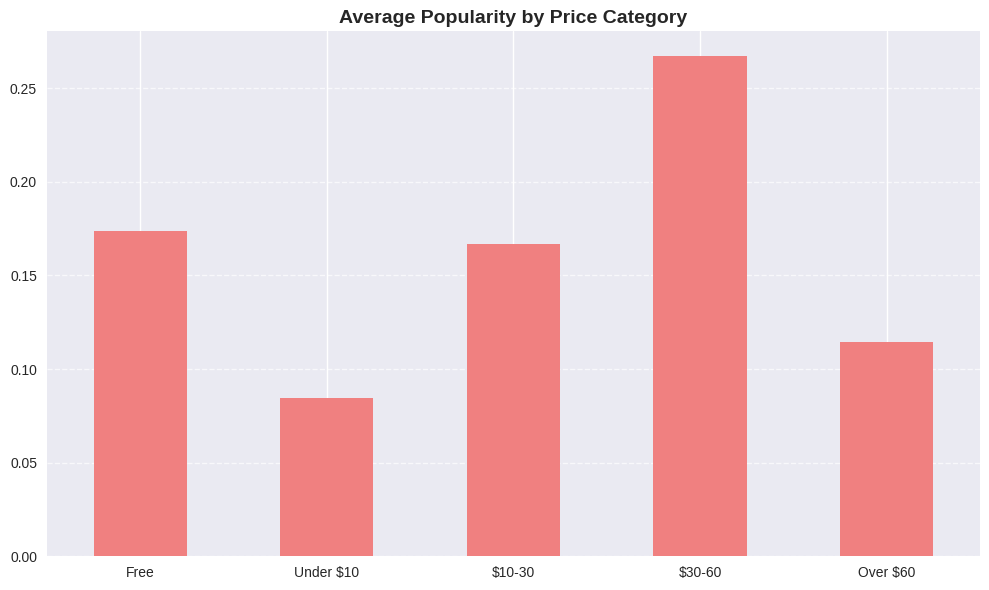

In [ ]:
# Visualization: Price Category Performance
plt.figure(figsize=(10, 6))
price_cat_stats = df_games_encoded.groupby('Price category')['Popularity score'].mean()
price_cat_stats.plot(kind='bar', color='lightcoral')
plt.title('Average Popularity by Price Category', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

> **🎮 Popularity by Game Price (Steam)**

* **Free games**: Avg popularity \~**0.17** - easy to access, lots of players.
* **\$30-60**: Highest popularity \~**0.27** - usually high-quality, well-marketed games.
* **Under \$10**: Lowest popularity \~**0.08** - too many cheap games, hard to stand out.
* **\$10-30**: Balanced \~**0.17** - good for solid indie titles.
* **Over \$60**: Still some interest \~**0.11** - often deluxe or niche games.

💡 Popularity scores are low across all price range (0.08-0.27), showing that price has limited impact,  oversaturation and poor visibility affect all tiers.

### **5.3.2. Value-for-Money Games**

In [ ]:
# Top 10 best value games based on Value_Score
top_value_games = df_games_encoded.nlargest(10, 'Value score')[
    ['Name', 'Popularity score', 'Review ratio', 'Value score']]

In [ ]:
print(f"\n🏆 Top 10 Value-for-Money Games:")
print(top_value_games.to_string(index=False))


🏆 Top 10 Value-for-Money Games:
                            Name  Popularity score  Review ratio  Value score
   Grand Theft Auto: San Andreas              1.00          0.92         0.92
                 Team Fortress 2              0.97          0.94         0.91
Counter-Strike: Global Offensive              1.00          0.88         0.88
         Half-Life 2: Lost Coast              1.00          0.88         0.88
              Grand Theft Auto V              1.00          0.85         0.85
     Grand Theft Auto: Vice City              0.89          0.93         0.83
                       Destiny 2              0.99          0.84         0.83
                  Rocket League®              0.91          0.89         0.81
     Life is Strange - Episode 1              0.83          0.96         0.79
                          Dota 2              0.95          0.83         0.79


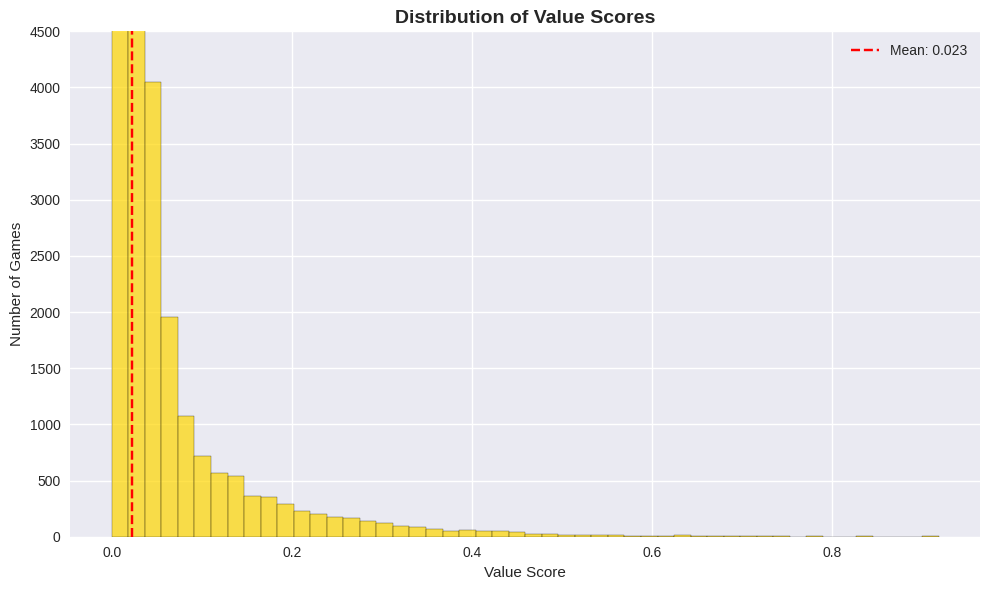

In [ ]:
# Visualization: Value Score Distribution
plt.figure(figsize=(10, 6))

plt.hist(df_games_encoded['Value score'], bins=50, alpha=0.7, color='gold', edgecolor='black')
plt.title('Distribution of Value Scores', fontsize=14, fontweight='bold')
plt.xlabel('Value Score')
plt.ylabel('Number of Games')
plt.axvline(df_games_encoded['Value score'].mean(), color='red', linestyle='--',
            label=f'Mean: {df_games_encoded["Value score"].mean():.3f}')
plt.legend()
plt.ylim(0, 4500)

plt.tight_layout()
plt.show()

> **Value Score: Distribution vs. Top Performers**

* **Most games score low** (avg ≈ **0.023**), clustered near **0**, showing weak value for money.
* **Only a few games score > 0.5**, reflecting a “winner-takes-most” market.
* **Top 10 titles** reach **0.83-0.96**, e.g.
  - *GTA: San Andreas* (**0.92**)
  - *Team Fortress 2* (**0.94**)
  - *CS\:GO*, *Half-Life 2* (**0.88**)
* **Common traits**: High review ratio (≥ **85%**), trusted franchises **long-term engagement** regardless of price.

🔎 High value on Steam is rare and requires more than affordability ,  it demands excellence across **quality, reputation, player experience, and staying power**.


### **5.3.3 Price - Quality Relationship**

In [ ]:
price_quality_corr = df_games_encoded[['Price', 'Popularity score', 'Review ratio', 'Total reviews']].corr()

In [ ]:
print(f"\n📈 Price - Quality Correlations:")
print(price_quality_corr['Price'].drop('Price').to_string())


📈 Price - Quality Correlations:
Popularity score   0.25
Review ratio       0.06
Total reviews      0.04


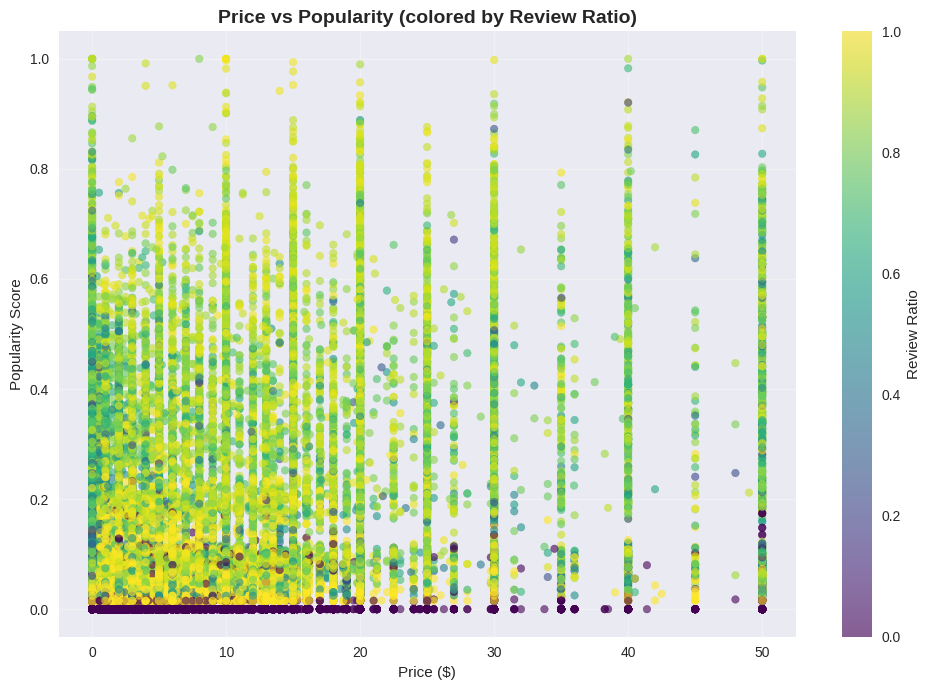

In [ ]:
# Visualization: Price vs Popularity Scatter
plt.figure(figsize=(10, 7))

scatter = plt.scatter(df_games_encoded['Price'], df_games_encoded['Popularity score'],
                      c=df_games_encoded['Review ratio'], cmap='viridis', alpha=0.6, s=30)
plt.xlabel('Price ($)')
plt.ylabel('Popularity Score')
plt.title('Price vs Popularity (colored by Review Ratio)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Review Ratio')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

> **Price vs Popularity Correlation**

* **Price and Popularity** (0,25): No clear trend, games at any price can succeed or fail.
* **Crowded under \$20**: Most games fall here, but low price **doesn’t guarantee success**.
* **High-Price Risk:** Games over \$30 show low popularity and mixed reviews, signaling overpricing or weak quality.
* **Review Quality Spread**: High-rated games (review ratio near 1.0) are mostly in low-price brackets. Poorly rated games appear across all prices, especially above \$30.

* **Correlations**:

  * **Price vs. Review Ratio**: 0.06 → very weak
  
  * **Popularity vs. Review Ratio**: 0.31 → weak → Good reviews drive success more than pricing.

🔎 Steam’s market rewards **quality over price**. Review ratio is a better predictor of success than pricing. To thrive, developers should **focus on delivering a great player experience**, not just lowering the price.


### **5.3.4. Premium vs Budget Success Analysis**

In [ ]:
premium_games = df_games_encoded[df_games_encoded['Price'] > 30]
budget_games = df_games_encoded[df_games_encoded['Price'] <= 30]

premium_count = len(premium_games)
budget_count = len(budget_games)

premium_avg_popularity = premium_games['Popularity score'].mean()
budget_avg_popularity = budget_games['Popularity score'].mean()

premium_success_rate = (premium_games['Popularity score'] > 0).mean() * 100
budget_success_rate = (budget_games['Popularity score'] > 0).mean() * 100

In [ ]:
comparison_df = pd.DataFrame({
    'Metric': ['Game Count', 'Avg Popularity', 'Success Rate (>0 popularity)'],
    'Premium Games (>$30)': [
        f"{premium_count:,} games",
        f"{premium_avg_popularity:.3f}",
        f"{premium_success_rate:.1f}%"
    ],
    'Budget Games (<=$30)': [
        f"{budget_count:,} games",
        f"{budget_avg_popularity:.3f}",
        f"{budget_success_rate:.1f}%"
    ]
})

display(comparison_df)

Metric Premium Games (>$30) Budget Games (<=$30)
0                    Game Count          1,962 games         83,306 games
1                Avg Popularity                0.246                0.110
2  Success Rate (>0 popularity)                87.2%                83.8%

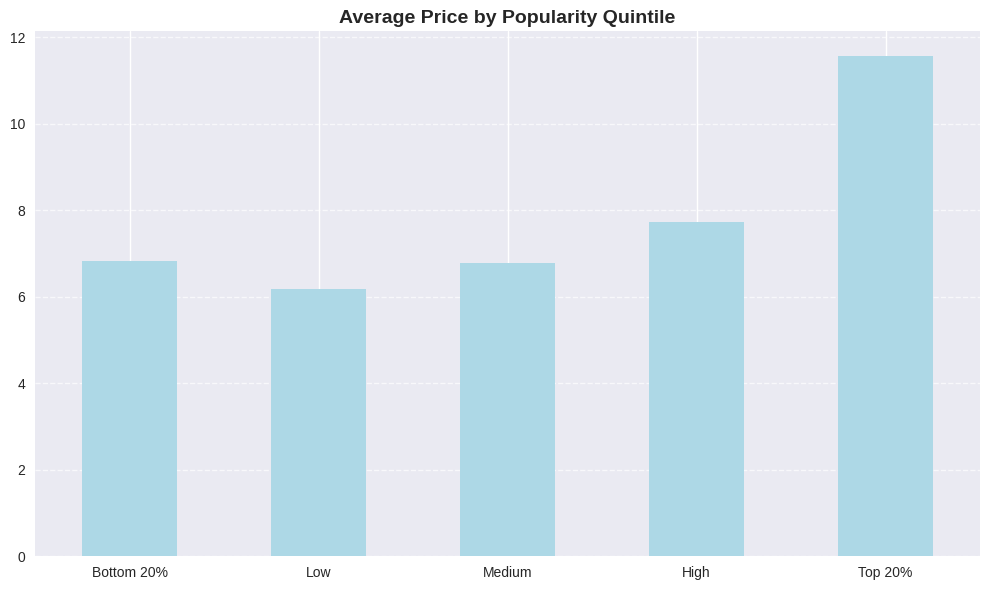

In [ ]:
# Visualization: Average Price by Popularity Quintile

plt.figure(figsize=(10, 6))
popularity_price_dist = df_games_encoded.groupby('Popularity quintile')['Price'].mean()
popularity_price_dist.plot(kind='bar', color='lightblue')
plt.title('Average Price by Popularity Quintile', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

> **Pricing & Popularity in the Steam Marketplace:**

* **Premium games (> \$30)** make up just **\~2%** of titles but earn over **2× the average popularity** (0.246 vs. 0.110), thanks to strong quality and branding.

* **More popular games = higher prices:** Average price increases from **\$6 to \$11.5** across popularity quintiles.

* **High success rates overall:** Both premium and budget games see **>83% success**, but premium titles deliver more impact per game, while budget games rely on high volume.

* **Two models work:**

  → **Premium** = High-value, low-volume

  → **Budget** = Broad-access, high-volume

💡 Budget games dominate in number, but premium games win in per-title success. Both strategies can succeed when aligned with product strengths.



---
> **🎯 Key Recommendations**

* **Focus on Quality, Not Price**:
  Review quality matters (**corr = 0.31**), while price has minimal impact (**corr = 0.06**). Games under \$10 have the **lowest popularity (0.08)** ,  so polish and player satisfaction are essential.

* **Pick a Pricing Strategy That Matches Organization Strengths**:

  * **\$30-60** = highest popularity (**0.27**) - best for premium-quality games with strong IP & marketing.
  * **\$10-30** = balanced strategy (**0.17**) - ideal for solid indie titles.
  * Avoid underpricing unless have excellent visibility.

* **Design for a Winner-Takes-Most Market**:
  Top value games (e.g., **TF2, CS\:GO, GTA: SA**) have **85%+ review ratios**, strong brands, and long-term player engagement.

* **Invest in Visibility & Feedback**:
  Marketing, community-building, and generating **positive reviews** are more impactful than pricing. Align your strategy: premium (high-value, low-volume) and budget (broad-access, high-volume) with strengths.

**✨ Bottom Line:** Success on Steam comes from **quality, marketing resources, and lasting engagement**, not low prices, choose pricing tier based on those.

## **5.4. Genre Analysis**

###	**5.4.1 Genre Market Share and Performance**

In [ ]:
genre_stats = {}
for genre in genre_cols:
    genre_games = df_games_encoded[df_games_encoded[genre] == 1]
    genre_stats[genre] = {
        'Game count': len(genre_games),
        'Market share': len(genre_games) / len(df_games_encoded) * 100,
        'Avg popularity': genre_games['Popularity score'].mean(),
        'Avg price': genre_games['Price'].mean(),
        'Success rate': (genre_games['Popularity score'] > 0).mean() * 100,  # **Success rate** is the percentage of games in a genre that have a non-zero popularity score, shows how many games gained at least some traction or visibility.

        'Avg reviews': genre_games['Total reviews'].mean()
    }

genre_df = pd.DataFrame(genre_stats).T.sort_values('Market share', ascending=False)

In [ ]:
print(f"🏆 Top 10 Genres by Market Share:")
print(genre_df.head(10)[['Game count', 'Market share', 'Avg popularity', 'Success rate']].round(2))

🏆 Top 10 Genres by Market Share:
              Game count  Market share  Avg popularity  Success rate
Indie          60,139.00         70.53            0.10         84.85
Casual         35,912.00         42.12            0.08         79.44
Action         35,088.00         41.15            0.12         86.92
Adventure      33,307.00         39.06            0.12         85.11
Simulation     17,190.00         20.16            0.12         84.36
Strategy       16,259.00         19.07            0.13         87.31
RPG            15,159.00         17.78            0.14         84.70
Early Access   10,990.00         12.89            0.09         83.25
Sports          3,914.00          4.59            0.11         85.33
Free to Play    3,609.00          4.23            0.22         96.98


In [ ]:
# Calculate average popularity score for each genre
genre_avg_popularity = {}
for genre in genre_cols:
    # Only include games that belong to the genre
    genre_avg_popularity[genre] = df_games_encoded[df_games_encoded[genre] == 1]['Popularity score'].mean()

# Convert to DataFrame and sort by popularity
genre_avg_popularity_df = pd.DataFrame.from_dict(
    genre_avg_popularity, orient='index', columns=['Average Popularity Score']
).sort_values(by='Average Popularity Score', ascending=False)

In [ ]:
# Display result
print("\n🏆 Top 10 Genres by Average Popularity Score:")
print(genre_avg_popularity_df.head(10).round(3))


🏆 Top 10 Genres by Average Popularity Score:
                       Average Popularity Score
Movie                                      0.25
Free to Play                               0.22
Massively Multiplayer                      0.21
Web Publishing                             0.14
RPG                                        0.14
Strategy                                   0.13
Action                                     0.12
Simulation                                 0.12
Nudity                                     0.12
Adventure                                  0.12


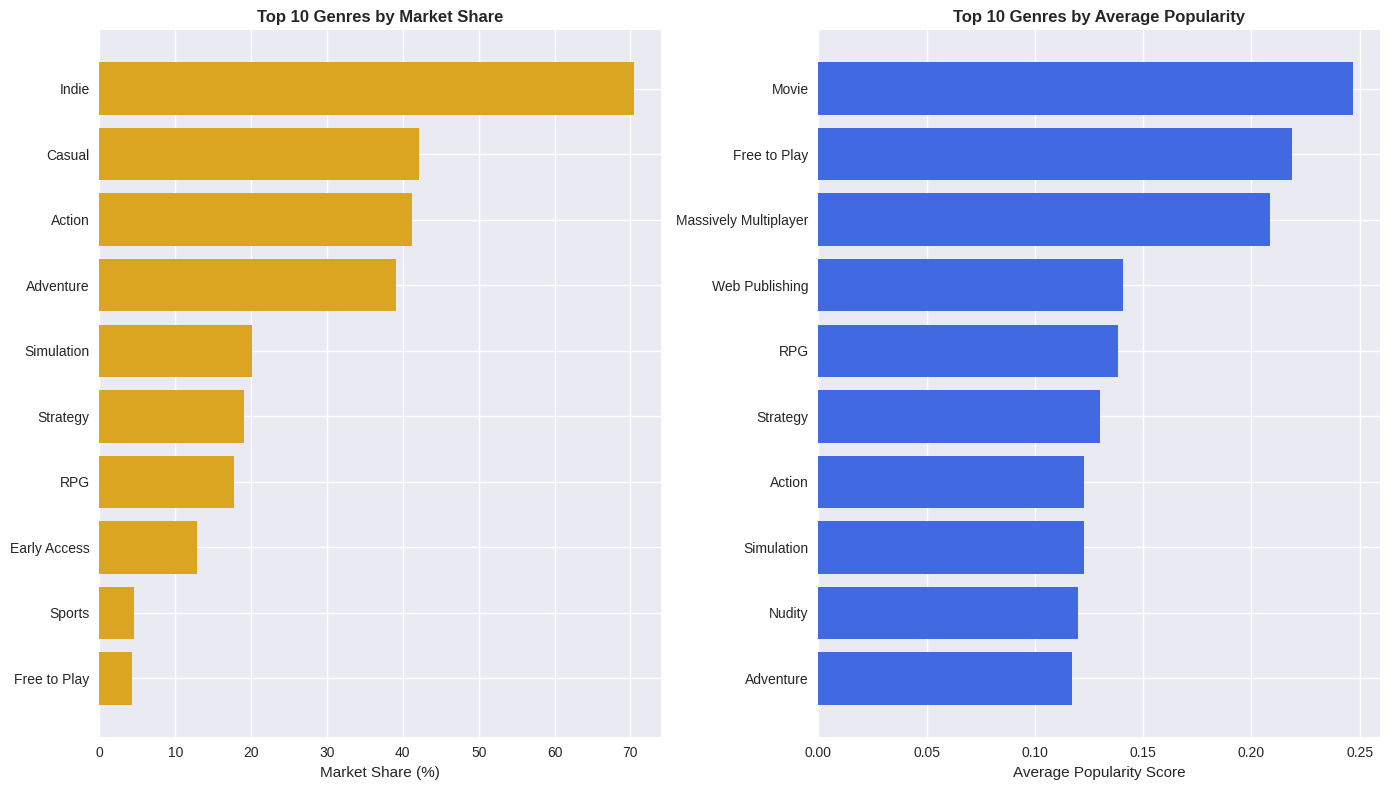

In [ ]:
market_share_data = {
    'Genre': genre_df.head(10).index.tolist(),
    'Market share (%)': genre_df.head(10)['Market share'].tolist()
}

popularity_data = {
    'Genre': genre_avg_popularity_df.head(10).index.tolist(),
    'Average Popularity': genre_avg_popularity_df.head(10)['Average Popularity Score'].tolist()
}

df1 = pd.DataFrame(market_share_data).sort_values('Market share (%)', ascending=True)
df2 = pd.DataFrame(popularity_data).sort_values('Average Popularity', ascending=True)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

ax1.barh(df1['Genre'], df1['Market share (%)'], color='goldenrod')
ax1.set_title('Top 10 Genres by Market Share', fontsize=12, fontweight='bold')
ax1.set_xlabel('Market Share (%)')

ax2.barh(df2['Genre'], df2['Average Popularity'], color='royalblue')
ax2.set_title('Top 10 Genres by Average Popularity', fontsize=12, fontweight='bold')
ax2.set_xlabel('Average Popularity Score')

plt.tight_layout()
plt.show()


> **Top 10 genres by Market Share vs Popularity**

* **Indie dominates volume, not popularity**:
  Indie games hold over **70% of market share**, but have only moderate average popularity, reflecting a crowded, fragmented space.

* **High popularity, low presence**:
  Genres like **Movie**, **Free to Play**, and **Massively Multiplayer** are among the **most popular**, despite having **small market shares**, rare but impactful titles.

* **Balanced performers**:
  **RPG**, **Action**, and **Strategy** rank high in **both share and popularity**, showing consistent success across quantity and quality.

* **Free to Play stands out**:
  With just **4.2% share**, it ranks **#2 in popularity**, proving that free-access models can drive massive engagement.

In [ ]:
# Calculate 'Popularity per Dollar' for all games, handling division by zero for free games
# 'Popularity per Dollar' measures how much popularity a game earns for each dollar it costs
# Higher values mean the game offers great popularity relative to its price

df_games_encoded['Popularity per Dollar'] = df_games_encoded.apply(
    lambda row: row['Popularity score'] / row['Price']
    if row['Price'] > 0
    else max(row['Popularity score'], 0),
    axis=1
)

In [ ]:
# Compare genres based on value (Popularity per Dollar)
genre_value_avg = {}
for genre in genre_cols:
    # Calculate average Popularity per Dollar for games belonging to this genre
    genre_games_filtered = df_games_encoded[df_games_encoded[genre] == 1]
    if not genre_games_filtered.empty:
        genre_value_avg[genre] = genre_games_filtered['Popularity per Dollar'].mean()
    else:
        genre_value_avg[genre] = 0 # Handle cases where a genre has no games

# Convert the genre-value dictionary to a DataFrame for analysis
genre_value_df = pd.DataFrame.from_dict(genre_value_avg, orient='index', columns=['Average Popularity per Dollar']).sort_values(by='Average Popularity per Dollar', ascending=False)

print("\n🏆 Top 10 Genres by Average 'Popularity per Dollar':")
print(genre_value_df.head(10).round(3))


🏆 Top 10 Genres by Average 'Popularity per Dollar':
                       Average Popularity per Dollar
Movie                                           0.25
Free to Play                                    0.21
Massively Multiplayer                           0.14
Gore                                            0.06
Nudity                                          0.06
Web Publishing                                  0.05
Violent                                         0.05
Sexual Content                                  0.05
Video Production                                0.05
Animation & Modeling                            0.05


###	**5.4.2 Genre Quality vs Quantity**

- `Quality score` combines a genre’s average popularity and success rate to show how strong and reliable it is overall. Higher score = more popular and consistently successful games.

In [ ]:
# Compute Quality Score for each genre
genre_df['Quality score'] = (genre_df['Avg popularity'] * genre_df['Success rate']) / 100

# Select top 10 genres with the highest Quality Score
quality_leaders = genre_df.nlargest(10, 'Quality score')[
    ['Game count', 'Avg popularity', 'Quality score']
]

In [ ]:
print(f"\n⭐ Top 10 Genres by Quality Score:")
print(quality_leaders.round(3))


⭐ Top 10 Genres by Quality Score:
                       Game count  Avg popularity  Quality score
Movie                        2.00            0.25           0.25
Free to Play             3,609.00            0.22           0.21
Massively Multiplayer    1,801.00            0.21           0.20
Web Publishing             101.00            0.14           0.13
Nudity                     119.00            0.12           0.12
RPG                     15,159.00            0.14           0.12
Sexual Content             107.00            0.12           0.12
Strategy                16,259.00            0.13           0.11
Action                  35,088.00            0.12           0.11
Gore                       307.00            0.11           0.11


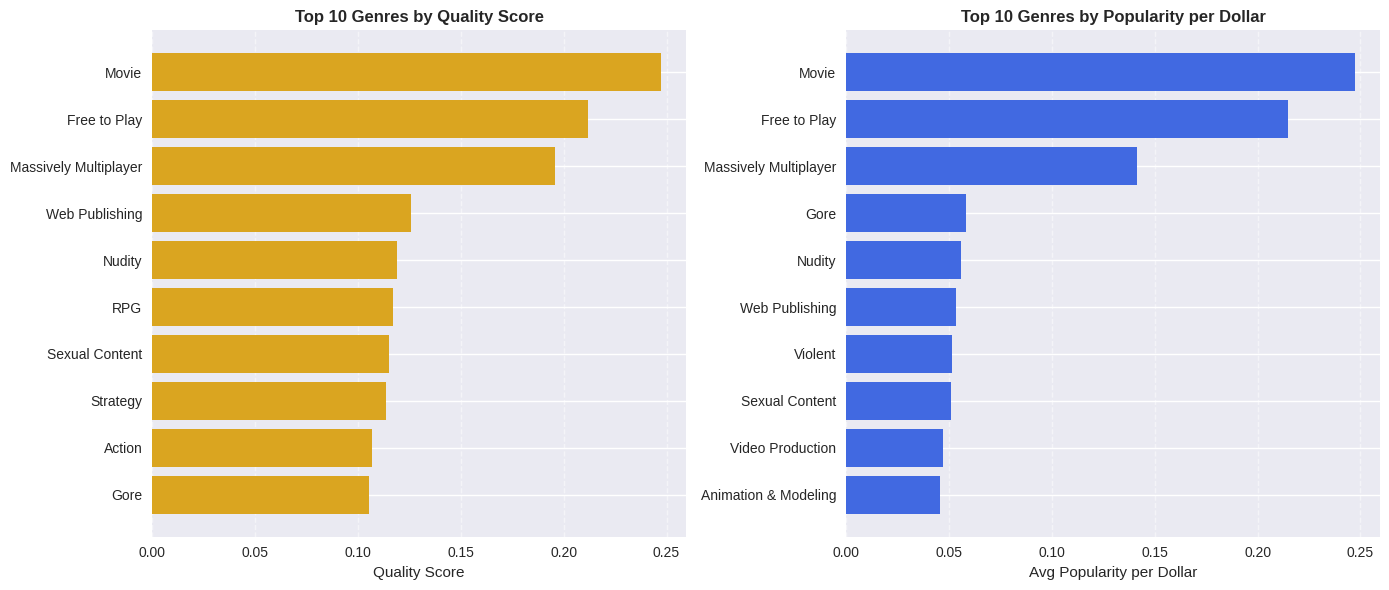

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharey=False)

# --- Plot 1: Top 10 Genres by Quality Score ---
quality_data = quality_leaders.sort_values('Quality score', ascending=True)  # sort for horizontal bar
ax1.barh(quality_data.index, quality_data['Quality score'], color='goldenrod')
ax1.set_title('Top 10 Genres by Quality Score', fontsize=12, fontweight='bold')
ax1.set_xlabel('Quality Score')
ax1.grid(axis='x', linestyle='--', alpha=0.5)

# --- Plot 2: Top 10 Genres by Average Popularity per Dollar ---
value_data = genre_value_df.head(10).sort_values(by='Average Popularity per Dollar', ascending=True)
ax2.barh(value_data.index, value_data['Average Popularity per Dollar'], color='royalblue')
ax2.set_title("Top 10 Genres by Popularity per Dollar", fontsize=12, fontweight='bold')
ax2.set_xlabel('Avg Popularity per Dollar')
ax2.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


> **Top 10 Genres base on Quality score and Popularity per dollar**

 **Top Genres by Quality Score**

* **Movie** ranks highest (**0.25**) with only **2 games** - very high efficiency but small sample.
* **Free to Play** scores **0.21** across **3,609 games** - strong quality despite being free.
* **Massively Multiplayer**: **0.20** - solid performance across many titles.
* Other genres like **Web Publishing**, **RPG**, **Action** fall in the **0.11-0.13** range - moderate quality.

**Top Genres by Popularity per Dollar**

* **Movie** again leads (**0.25**) - maximum return for cost.
* **Free to Play** follows (**0.21**) - free yet widely played.
* **Massively Multiplayer**: **0.14** - good value-performance balance.
* Genres like **Gore**, **Nudity**, **Web Publishing** average around **0.05-0.06** - fair but less efficient,suggesting loyal audiences and specialized demand.

🔍 **Conclusions**

* **Free to Play** and **Massively Multiplayer** offer strong performance in both quality and value.
* **Movie** genre ranks highest, but with very few titles - interpret cautiously.
* Popular genres like **Action** and **Strategy** have average quality scores (\~0.11) but aren’t cost-efficient.

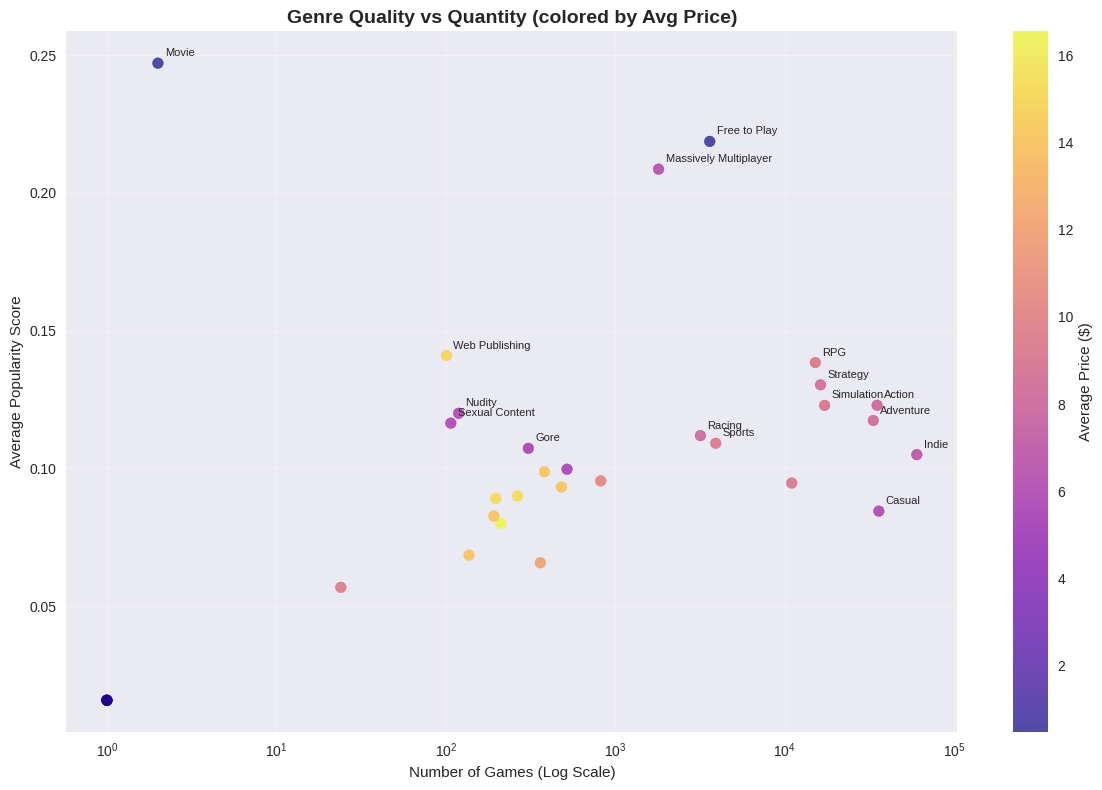

In [ ]:
# Visualization: Quality vs Quantity Scatter
plt.figure(figsize=(12, 8))
scatter = plt.scatter(genre_df['Game count'], genre_df['Avg popularity'],
                      c=genre_df['Avg price'], cmap='plasma', alpha=0.7, s=60)
plt.xlabel('Number of Games (Log Scale)')
plt.ylabel('Average Popularity Score')
plt.title('Genre Quality vs Quantity (colored by Avg Price)', fontsize=14, fontweight='bold')
plt.xscale('log') # Use log scale for game count due to wide range
plt.colorbar(scatter, label='Average Price ($)')
plt.grid(True, alpha=0.3)
for idx, row in genre_df.iterrows():
    if row['Avg popularity'] > 0.1 or row['Game count'] > 20000:
        plt.annotate(idx, (row['Game count'], row['Avg popularity']),
                     xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

> **🔍Genre Quanlity and Quantity Insights**

* **Movie = Blue Ocean**:
  Highest quality score (**0.25**) with only **2 games** → low competition, big potential for cinematic experiences.

* **Free-to-Play Wins on Access**:
  Score **0.22** across **3,600+ games** → free games succeed via engagement, not price.

* **Action/Adventure = Oversaturation Trap**:
  Over **10,000 titles**, low quality (\~**0.12**) → crowded space, hard to stand out.

* **RPG & Strategy = Balanced Bet**:
  \~**10K games**, quality **0.14**, higher pricing (\$9-11) → steady demand from core gamers.

* **Most Genres = Mediocre Returns**:
  Most have **0.05-0.12** quality score, **100-1,000 games** → success depends on execution, not genre alone.

###	**5.4.3 Genre Competition**

In [ ]:
genre_df['Competitiveness'] = genre_df['Game count'] / (genre_df['Avg popularity'] + 1e-6) # Add epsilon to avoid div by zero

In [ ]:
# Select the top 5 most competitive genres (only include genres with over 10% of total games)
competitive_genres = genre_df[genre_df['Game count'] > df_games_encoded.shape[0] * 0.1].nlargest(5, 'Competitiveness')

In [ ]:
print(f"\n🔥 Most Competitive Genres (High Volume, Low Avg Popularity - over 10% of total games):")
print(competitive_genres[['Game count', 'Avg popularity', 'Competitiveness']].round(3))


🔥 Most Competitive Genres (High Volume, Low Avg Popularity - over 10% of total games):
            Game count  Avg popularity  Competitiveness
Indie        60,139.00            0.10       572,913.76
Casual       35,912.00            0.08       425,186.77
Action       35,088.00            0.12       285,537.99
Adventure    33,307.00            0.12       283,779.63
Simulation   17,190.00            0.12       139,936.50


> **Most Competitive Game Genres**

* **Indie** is the most competitive genre with **60,139 games** and the highest **Competitiveness Score: 572,913.76**, very crowded, hard to stand out.
* **Casual** (**35,912 games**) and **Action** (**35,088 games**) also face intense competition, despite **low average popularity** (Casual: **0.08**, Action: **0.12**).

👉 These high-volume genres are oversaturated, making visibility and differentiation crucial for success.


### **5.4.4. Niche vs Mainstream Analysis**

In [ ]:
mainstream_threshold = df_games_encoded.shape[0] * 0.1  # 10% of total games

genre_df['Genre type'] = genre_df['Game count'].apply(
    lambda x: 'Niche' if x < mainstream_threshold else 'Mainstream'
)

niche_genres = genre_df[genre_df['Game count'] < mainstream_threshold]
mainstream_genres = genre_df[genre_df['Game count'] >= mainstream_threshold]

In [ ]:
# Prepare data
data = {
    'Metric': ['Genre Count', 'Avg Popularity', 'Avg Success Rate'],
    'Niche Genres': [
        len(niche_genres),
        niche_genres['Avg popularity'].mean(),
        niche_genres['Success rate'].mean()
    ],
    'Mainstream Genres': [
        len(mainstream_genres),
        mainstream_genres['Avg popularity'].mean(),
        mainstream_genres['Success rate'].mean()
    ]
}

# Create and display DataFrame
df_comparison = pd.DataFrame(data)
df_comparison.set_index('Metric', inplace=True)
display(df_comparison)


Niche Genres  Mainstream Genres
Metric                                           
Genre Count              25.00               8.00
Avg Popularity            0.10               0.11
Avg Success Rate         92.50              84.49

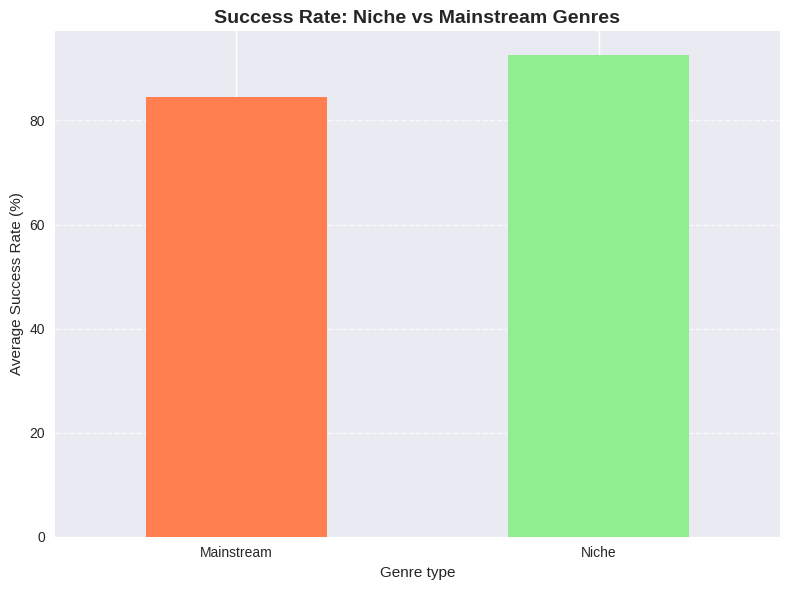

In [ ]:
# Visualization: Success Rate by Genre Type
plt.figure(figsize=(8, 6))
success_by_type = genre_df.groupby('Genre type')['Success rate'].mean()
success_by_type.plot(kind='bar', color=['coral', 'lightgreen'])
plt.title('Success Rate: Niche vs Mainstream Genres', fontsize=14, fontweight='bold')
plt.ylabel('Average Success Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

> **Niche vs. Mainstream Genres**

* **Niche genres** have a **higher success rate (92.5%)** vs. **mainstream (84.5%)**, suggests that specialized, targeted content resonates more effectively with audiences.
* Despite having only **8 genres** vs. **25 mainstream**, niche content **outperforms** in results, indicates that focused, specialized content creation may be more effective than broad-market approaches.
* **Mainstream** has slightly higher **average popularity (0.11 vs. 0.10)** but lower success rates, suggesting niche games are more effective long-term or conversion rates whilw mainstream content might get a little more initial attention.

👉 Focused, high-quality niche development offers **better ROI** than broad-market strategies.


### **5.4.5. Common genre combinations**

In [ ]:
# Analyze common genre combinations for multi-genre games
print("\nTop 5 Common Genre Combinations:")

# Extract genre one-hot columns
df_temp_genres = df_games_encoded[genre_cols]
genre_combinations = {}

# Loop through each game
for idx, row in df_temp_genres.iterrows():
    # Get list of genres that apply to this game
    active_genres = [col for col in genre_cols if row[col] == 1]

    # If game has multiple genres, record all unique pairs
    if len(active_genres) > 1:
        for i in range(len(active_genres)):
            for j in range(i + 1, len(active_genres)):
                pair = tuple(sorted((active_genres[i], active_genres[j])))
                genre_combinations[pair] = genre_combinations.get(pair, 0) + 1

# Sort genre pairs by frequency (descending)
sorted_combinations = sorted(genre_combinations.items(), key=lambda item: item[1], reverse=True)

# Display top 5 most common genre combinations
for combo, count in sorted_combinations[:5]:
    print(f"{combo}: {count} games")


Top 5 Common Genre Combinations:
('Casual', 'Indie'): 27418 games
('Action', 'Indie'): 26578 games
('Adventure', 'Indie'): 25303 games
('Action', 'Adventure'): 15555 games
('Adventure', 'Casual'): 12721 games


> **Multi-Genre Trends**

* **Most games use multiple genres** to widen appeal and gameplay depth.
* **Top combos feature Action, Adventure, Indie**, flexible and popular, especially among indie devs.
* **Knowing popular pairings helps design** better games by blending elements players already enjoy.


### **5.4.6. Correlation between `Popularity Score` and `Genres`**

In [ ]:
genre_popularity_correlations = {}
for genre in genre_cols:
    # correlation between Popularity score and each genre column
    correlation = df_games_encoded['Popularity score'].corr(df_games_encoded[genre])
    if not pd.isna(correlation): # Exclude NaN correlations if any
        genre_popularity_correlations[genre] = correlation

# Convert to DataFrame for sorting and display
genre_popularity_correlations_df = pd.DataFrame.from_dict(
    genre_popularity_correlations, orient='index', columns=['Correlation with Popularity Score']
).sort_values(by='Correlation with Popularity Score', ascending=False)

In [ ]:
print("\n📈 Top 10 Genres with Strongest Positive Correlation to Popularity Score:")
print(genre_popularity_correlations_df.head(10).round(3))

print("\n📉 Top 10 Genres with Strongest Negative Correlation to Popularity Score:")
print(genre_popularity_correlations_df.tail(10).round(3))


📈 Top 10 Genres with Strongest Positive Correlation to Popularity Score:
                       Correlation with Popularity Score
Free to Play                                        0.15
Massively Multiplayer                               0.10
RPG                                                 0.08
Strategy                                            0.06
Action                                              0.06
Simulation                                          0.03
Adventure                                           0.02
Web Publishing                                      0.01
Movie                                               0.01
Nudity                                              0.00

📉 Top 10 Genres with Strongest Negative Correlation to Popularity Score:
                       Correlation with Popularity Score
Video Production                                   -0.01
Software Training                                  -0.01
Design & Illustration                              -0.

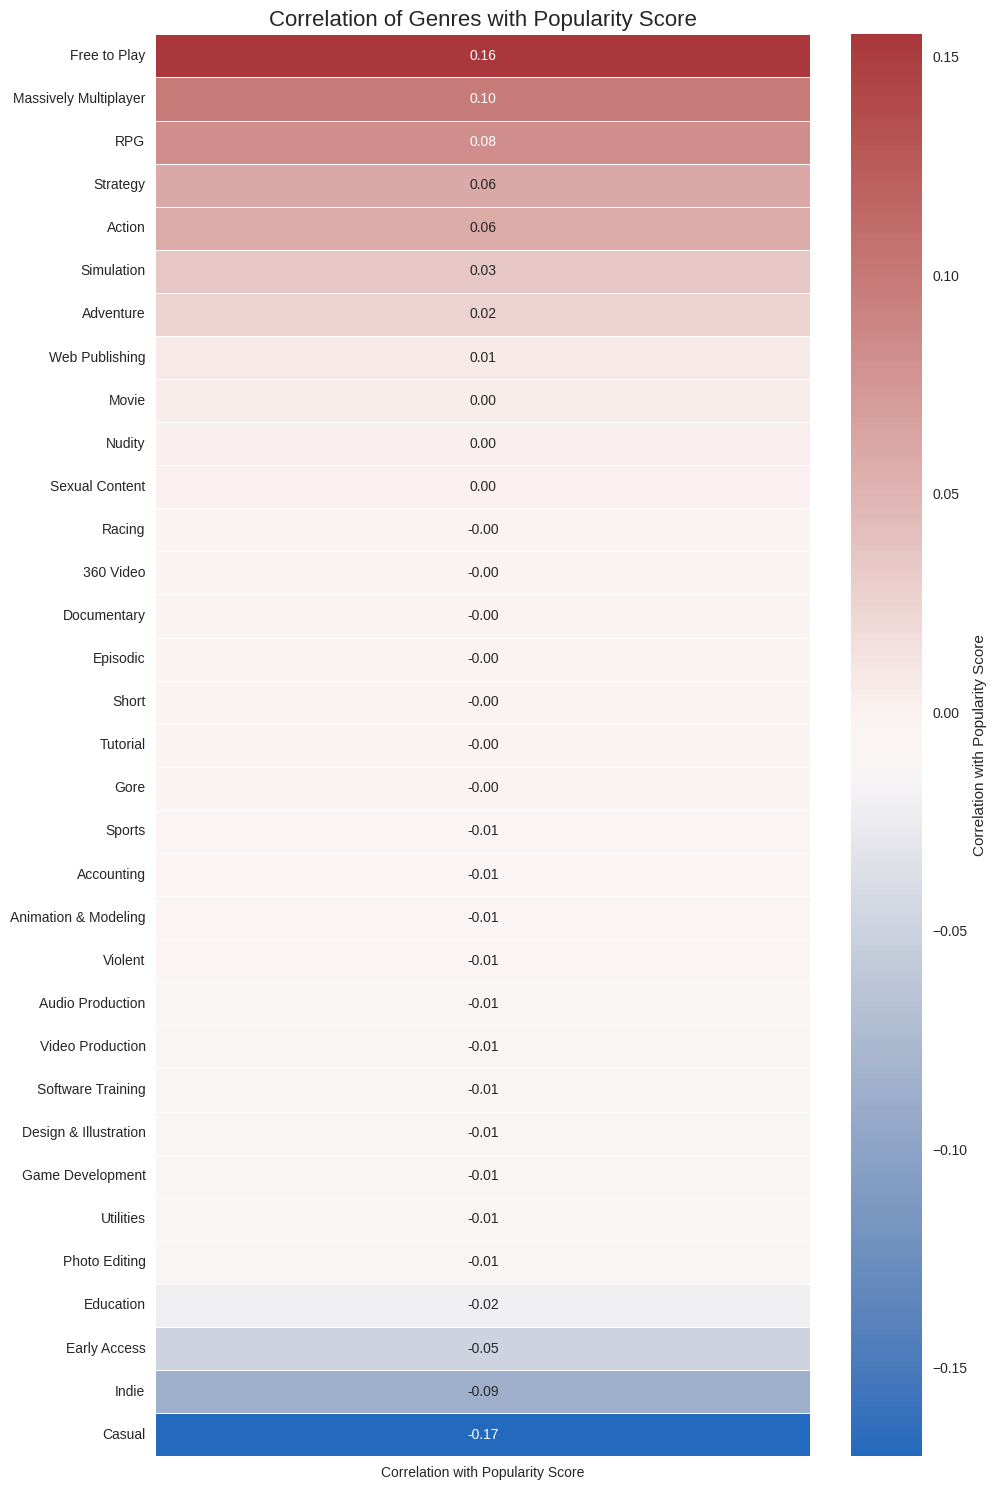

In [ ]:
# Heatmap for Genre Popularity Correlations
plt.figure(figsize=(10, 15))
sns.heatmap(genre_popularity_correlations_df, annot=True, cmap='vlag', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation with Popularity Score'})
plt.title('Correlation of Genres with Popularity Score', fontsize=16)
plt.tight_layout()
plt.show()

> **Correlation of Genres with Popularity Score**

**Weak but Positive Correlations:**

* **Free-to-Play** games show the highest correlation with popularity (**0.16**), suggesting accessibility helps attract players, but the influence is still limited.
* **Massively Multiplayer** (**0.10**), **RPG** (**0.08**), and **Strategy** (**0.06**) also show small positive links, indicating that social interaction and deep gameplay may contribute slightly to popularity - though they’re not dominant factors.

**Negative Correlations but not Strong:**
* **Casual** games show the strongest negative correlation (-0.17), though accessible, they may lack strong fan engagement or high popularity scores, , though the effect is not strong.
Exactly! Here's a more accurate and concise revision:
* **Indie** (-0.09) and **Early Access** (-0.05) show very weak negative correlations, meaning their popularity impact is minimal and likely influenced more by individual game quality than genre label.


>📌 **Key Market Insights**

* **Engagement Over Genre**: The weak negative correlation of Casual games (-0.17) suggests genre alone doesn’t determine popularity, deeper engagement matters more.
* **Social Features Help, but Aren’t Game-Changers**: Slight positive correlations for Multiplayer (0.10) and RPG (0.08) show that community and progression help, but aren’t strong predictors.
* **Accessibility Matters, Modestly**: Free-to-Play shows the highest correlation (0.16), indicating some advantage from low barriers, but still a minor factor overall.

👉 **Conclusion**: Genre type has limited influence on popularity. Execution, engagement design, and quality carry more weight.


---
>🎯 **Key Recommendations**

**Focus on Execution Over Genre**

* **Quality Matters Most**: Genre has weak ties to popularity (-0.17 to +0.16). Focus on polished gameplay, UX, and technical quality.
* **Design for Engagement**: Use progression, choices, and social features to keep players hooked, regardless of genre.
* **Community Building**: Multiplayer (+0.10) and RPG (+0.08) show slight positive correlation-add community features even in other genres.

**Smart Market Positioning**

* **Blue Ocean Opportunities**: Movie genre (0.25 quality score, only 2 games),high-risk, high-reward if executed at AAA level.
* **Free-to-Play Advantage**: Highest popularity correlation (+0.16) and quality score (0.21). Focus on  accessibility, retention mechanics, and long-term player value, not paywalls.
* **Niche Specialization**: Niche genres show a **92.5% success rate**, cater deeply to specific audiences.

**Purposeful Genre Hybridization**

* **Combine Genres Strategically**: Mix Action + Adventure + Indie for layered engagement (e.g. action = immediate satisfaction, adventure = depth exploration, indie = creative freedom).
* **Avoid Overcrowded Genres**: Indie (60,139 games) and Casual (35,912 games) need standout quality or clear differentiation.


> 💡 **Execution-Focused**

**Indie Developers**

* **Quality Over Quantity**: One standout game > many average ones.
* **Hybrid + Niche**: Mix niche topics (e.g., education, simulation) with accessible mechanics (e.g., casual play) to maximize both success rate and reach.
* **F2P with Community**: Build loyalty and social bonds, not just monetization loops.

**Established Studios**

* **Invest in Cinematic Titles**: Explore the underused Movie genre with high production values.
* **Create Retention Systems**: Design engagement that works across any genre.
* **Portfolio Balance**: Mix niche (92.5% success rate) with polished mainstream games.

**Publishers**

* **Quality Metrics**: Prioritize teams with quality, retention, and design strengths over trendy genres.
* **Niche Investment**: Back specialized titles with strong audience focus over broad-market games without clear differentiation.
* **Master F2P**: Build internal tools for analytics, live ops, and community growth.



---

> ✨ **Success Formula Refinement**

Niche Focus (92.5% success) + F2P Model (0.21 quality, 0.16 correlation) +
Multi-Genre (risk mitigation) + Quality-First (0.25 peak) +
Deep Engagement (+0.10 social, +0.08 progression) =
Sustainable 92.5% success rate with 0.21+ quality score

> 🔍 **How to Use Market Insights**

* **Genre Selection**: Use genre data for market sizing, not popularity prediction
* **Competitive Analysis**: Focus on execution quality in chosen genres rather than genre-switching
* **Resource Allocation**: Invest in Core Gameplay retention systems, and community
* **Track Success**: Track player - behaviors over genre-based popularity scores


👌 **Game success depends more on how it's made**. Prioritize quality, engagement, and smart market positioning, not genre trends.


## **5.5. Publishers & Developers Ecosystem**

### **5.5.1. Publishers & Developers Performance**

**A . Top Publishers and Developers**

In [ ]:
def analyze_company_tier_helper(df, column, entity_type, min_games_threshold=10):
    # Volume leaders: Count games per company and get top 10
    volume_leaders = df[column].value_counts().head(10)

    # Quality leaders: Calculate average metrics for companies with at least min_games_threshold
    company_stats = df.groupby(column).agg({
        'Popularity score': 'mean',
        'Price': 'mean',
        'Total reviews': 'mean',
        'Review ratio': 'mean'
    }).round(3)

    game_counts = df[column].value_counts()
    company_stats = company_stats[game_counts >= min_games_threshold].sort_values('Popularity score', ascending=False)

    print(f"\n🏆 Top 10 {entity_type}s by Volume:")
    print(volume_leaders.to_string())

    print(f"\n⭐ Top 10 {entity_type}s by Quality (min {min_games_threshold} games):")
    print(company_stats.head(10).to_string())

    # Tier analysis: Categorize companies into 'Major' or 'Indie' based on game count
    tier_column = f'{entity_type} tier'
    # Check if the tier column already exists in the DataFrame to avoid re-creation issues
    if tier_column not in df.columns:
        df[tier_column] = df[column].map(
            df[column].value_counts().apply(lambda x: 'Major' if x >= min_games_threshold else 'Indie')
        )

    tier_analysis = df.groupby(tier_column).agg({
        'Price': 'mean',
        'Popularity score': 'mean',
        'Total reviews': 'mean',
        'Review ratio': 'mean'
    }).round(3)

    print(f"\n🎯 {entity_type} Tier Comparison:")
    print(tier_analysis.to_string())

    return company_stats, tier_analysis, df # Return df to ensure tier column and other changes are propagated
# Analyze Publishers: Call the helper function for 'Publishers'
publisher_stats, publisher_tier_analysis, df_games_encoded = analyze_company_tier_helper(df_games_encoded, 'Publishers', 'Publisher')

# Analyze Developers: Call the helper function for 'Developers'
developer_stats, developer_tier_analysis, df_games_encoded = analyze_company_tier_helper(df_games_encoded, 'Developers', 'Developer')



🏆 Top 10 Publishers by Volume:
Publishers
Big Fish Games       505
Auto Publication*    338
8floor               259
HH-Games             176
Strategy First       176
EroticGamesClub      170
Square Enix          166
SEGA                 166
Choice of Games      161
Sekai Project        158

⭐ Top 10 Publishers by Quality (min 10 games):
                                                        Popularity score  Price  Total reviews  Review ratio
Publishers                                                                                                  
Valve                                                               0.73   7.53     429,088.14          0.91
Rockstar Games                                                      0.66  10.07      94,351.82          0.82
Coffee Stain Publishing                                             0.59  18.41      54,794.39          0.92
SEGA,Feral Interactive (Mac),Feral Interactive (Linux)              0.57  27.29      30,425.18          0.80
Xbox 

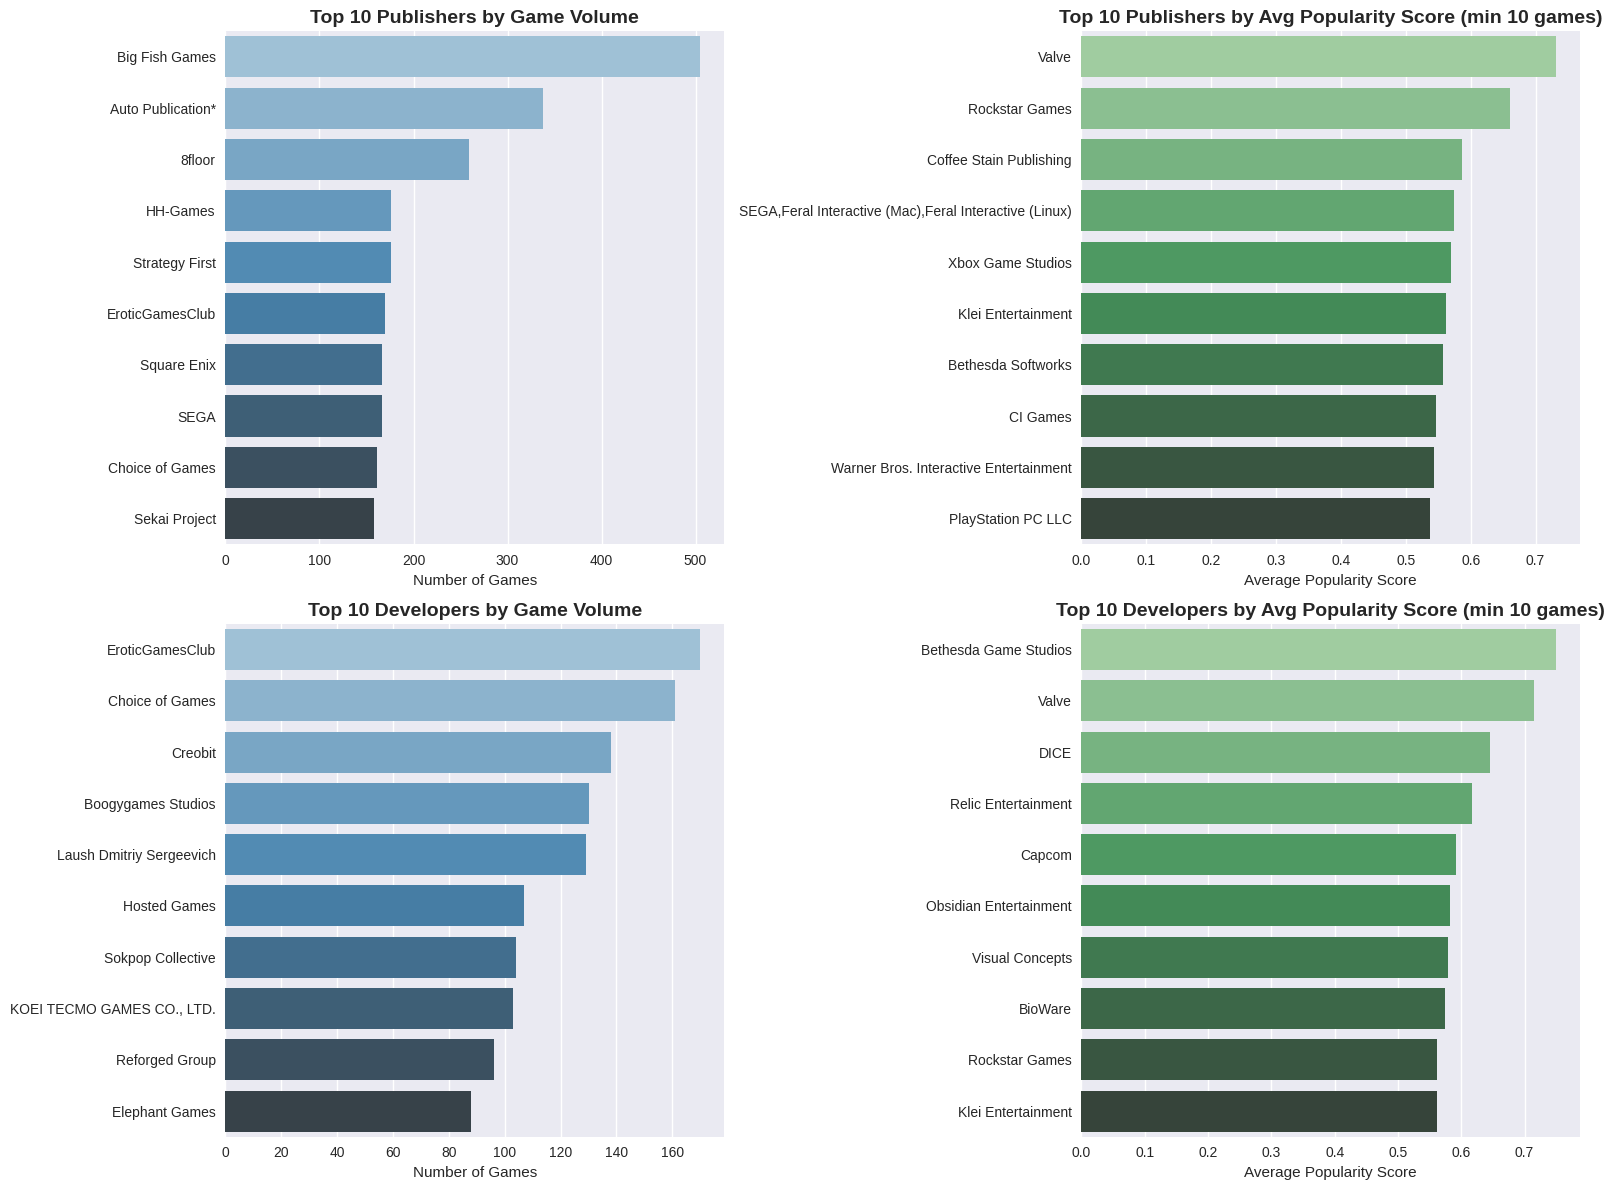

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.3, wspace=0.4)

# --- ax1: Top 10 Publishers by Volume ---
top_10_publishers_volume = df_games_encoded['Publishers'].value_counts().head(10)
sns.barplot(
    x=top_10_publishers_volume.values,
    y=top_10_publishers_volume.index,
    palette='Blues_d',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Top 10 Publishers by Game Volume', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Number of Games')
axes[0, 0].set_ylabel('')

# --- ax2: Top 10 Publishers by Quality (Popularity Score) ---
top_10_publishers_quality = publisher_stats.nlargest(10, 'Popularity score')
sns.barplot(
    x=top_10_publishers_quality['Popularity score'],
    y=top_10_publishers_quality.index,
    palette='Greens_d',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Top 10 Publishers by Avg Popularity Score (min 10 games)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Average Popularity Score')
axes[0, 1].set_ylabel('')

# --- ax3: Top 10 Developers by Volume ---
top_10_developers_volume = df_games_encoded['Developers'].value_counts().head(10)
sns.barplot(
    x=top_10_developers_volume.values,
    y=top_10_developers_volume.index,
    palette='Blues_d',
    ax=axes[1, 0]
)
axes[1, 0].set_title('Top 10 Developers by Game Volume', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Number of Games')
axes[1, 0].set_ylabel('')

# --- ax4: Top 10 Developers by Quality (Popularity Score) ---
top_10_developers_quality = developer_stats.nlargest(10, 'Popularity score')
sns.barplot(
    x=top_10_developers_quality['Popularity score'],
    y=top_10_developers_quality.index,
    palette='Greens_d',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Top 10 Developers by Avg Popularity Score (min 10 games)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Average Popularity Score')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()


> **🎯 Key Insights on Publishers & Developers Performance**

**Publishers:**

* **Big Fish Games** leads by volume with **505 games**, while high-quality publishers like **Valve** focus on fewer titles (**10+**).
* **Valve** and **Rockstar Games** have the highest average popularity scores (**0.73** and **0.66**), showing a strong quality-first approach.
* **Coffee Stain Publishing** and **Klei Entertainment** stand out in review ratios (**0.92** and **0.90**), despite smaller games.

**Developers:**

* **EroticGamesClub** tops quantity with **170 games**, but top performers like **Bethesda** and **Valve** keep it under **10+**.
* **Bethesda** and **Valve** lead in popularity (**0.75** and **0.71**) and maintain excellent review ratios (**0.82** and **0.90**).
* Other high-review developers include **Relic Entertainment** and **Klei Entertainment** (both **0.90+**).

✔️ Giants like **Valve**, **Rockstar**, and **Bethesda** focus on **quality over quantity**, with top popularity and review scores. Others follow a **volume-driven** strategy with lower average impact.


**B. Market Concentration Analysis**

In [ ]:
# Publisher concentration
pub_concentration = df_games_encoded['Publishers'].value_counts()
top_10_pub_share = pub_concentration.head(10).sum() / total_games * 100

# Developer concentration
dev_concentration = df_games_encoded['Developers'].value_counts()
top_10_dev_share = dev_concentration.head(10).sum() / total_games * 100


In [ ]:
print(f"\n📊 Market Concentration:")
print(f"    • Top 10 Publishers control: {top_10_pub_share:.1f}% of market")
print(f"    • Top 10 Developers control: {top_10_dev_share:.1f}% of market")
print(f"    • Market Structure: {'Concentrated' if top_10_pub_share > 50 else 'Fragmented'}")


📊 Market Concentration:
    • Top 10 Publishers control: 2.7% of market
    • Top 10 Developers control: 1.4% of market
    • Market Structure: Fragmented


> The Steam market is **highly fragmented**. The top 10 publishers hold only **2.7%** of the market, and the top 10 developers just **1.4%**. This shows **no single giant dominates**, creating space for small and indie developers to thrive.


**C. AAA vs Indie comparations**

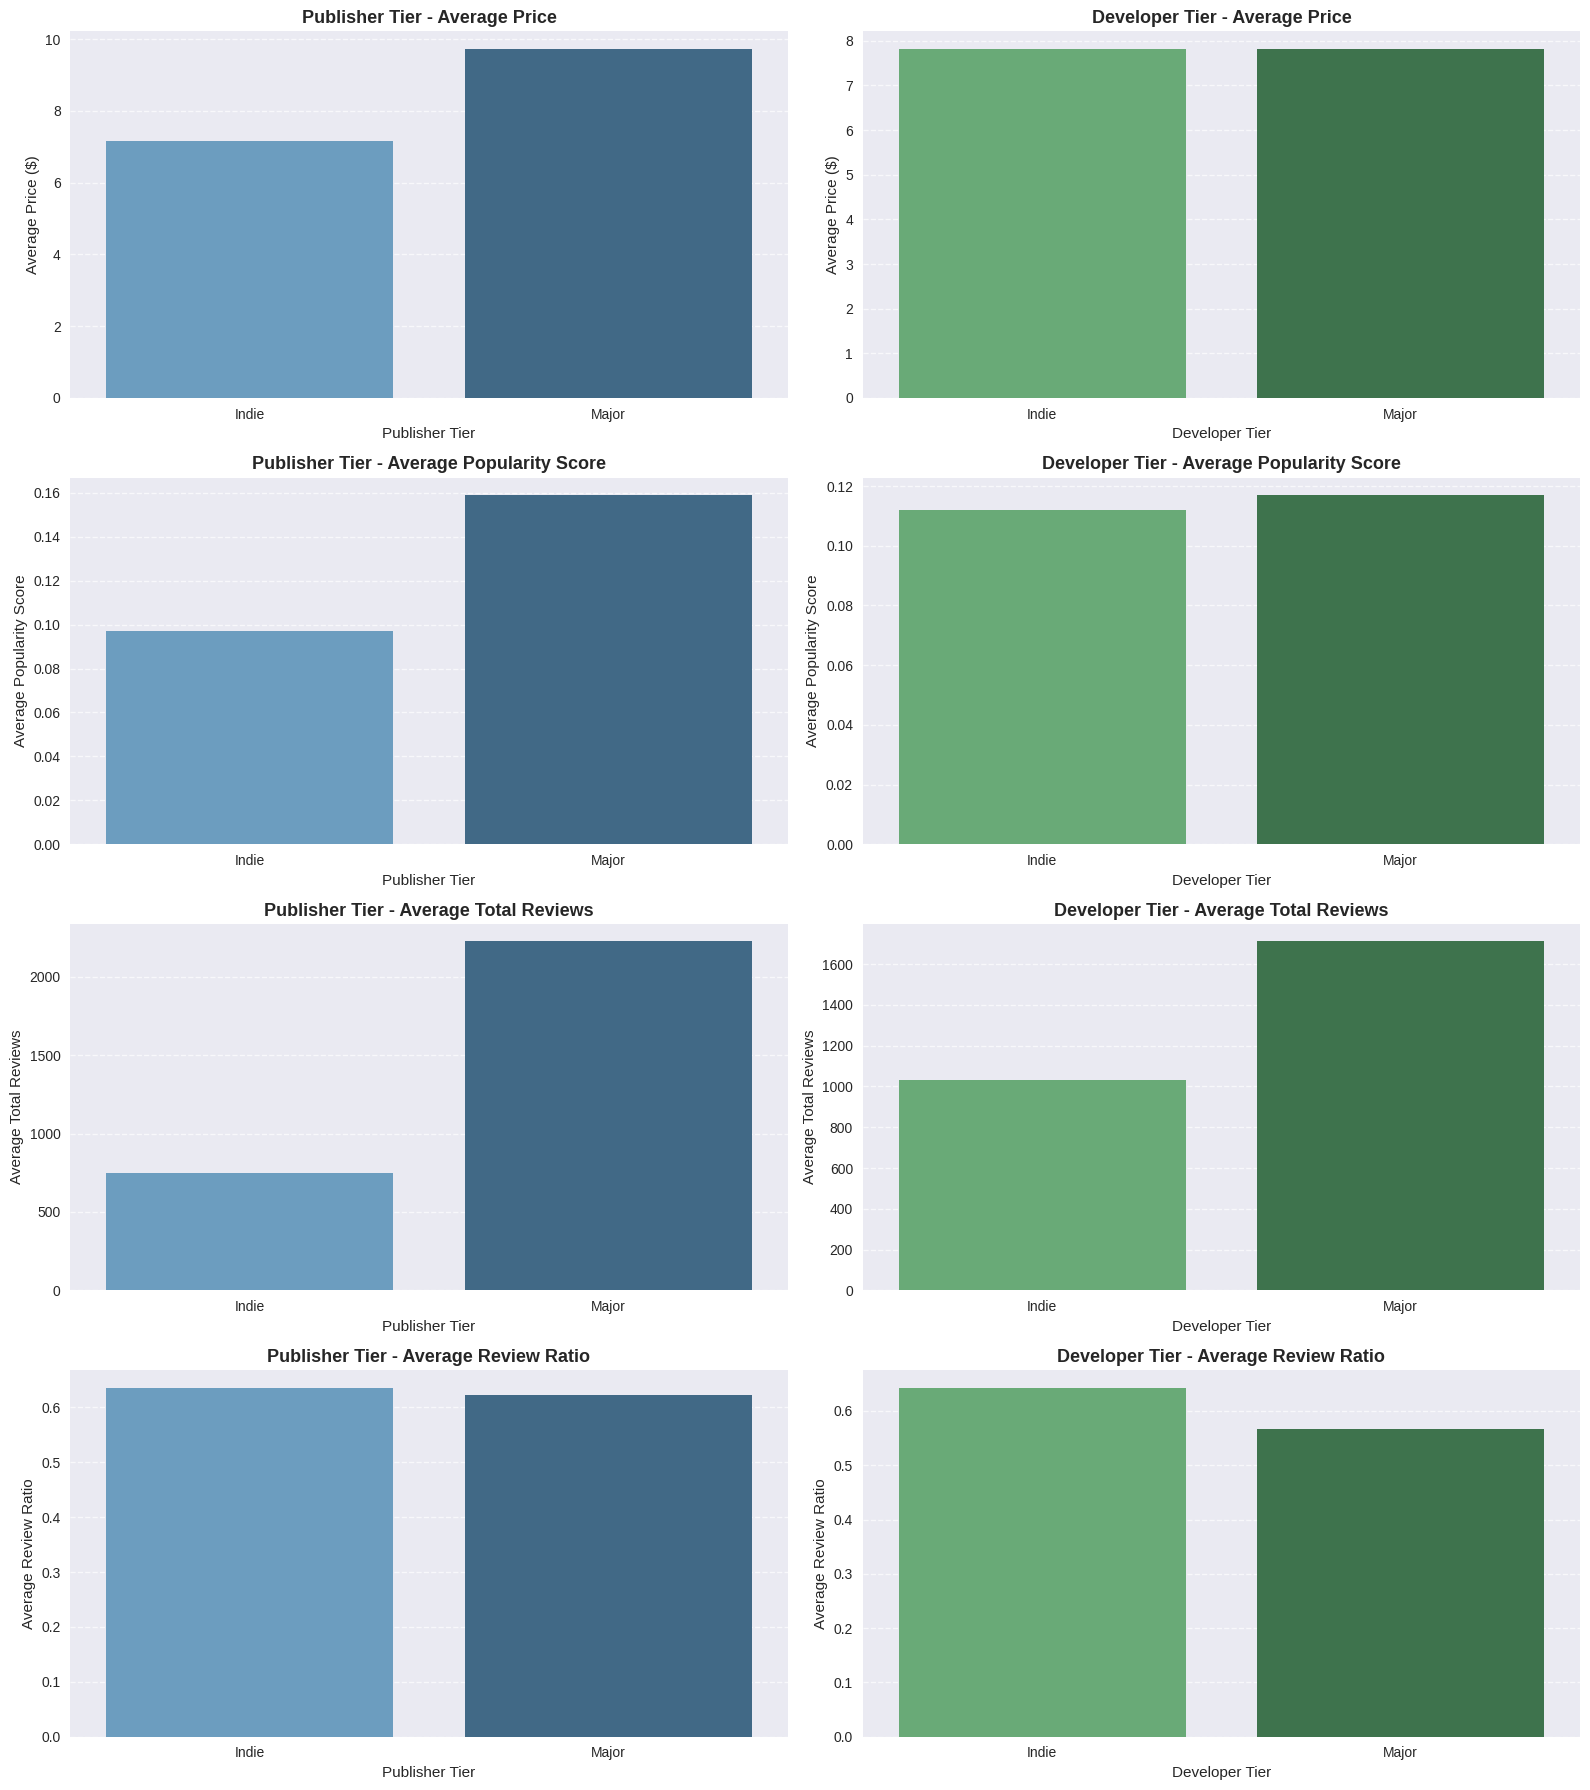

In [ ]:
metrics_to_plot = ['Price', 'Popularity score', 'Total reviews', 'Review ratio']
titles = {
    'Price': 'Average Price',
    'Popularity score': 'Average Popularity Score',
    'Total reviews': 'Average Total Reviews',
    'Review ratio': 'Average Review Ratio'
}
y_labels = {
    'Price': 'Average Price ($)',
    'Popularity score': 'Average Popularity Score',
    'Total reviews': 'Average Total Reviews',
    'Review ratio': 'Average Review Ratio'
}

fig, axes = plt.subplots(4, 2, figsize=(16, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, metric in enumerate(metrics_to_plot):
    # Publisher
    sns.barplot(
        x=publisher_tier_analysis.index,
        y=publisher_tier_analysis[metric],
        palette='Blues_d',
        ax=axes[i][0]
    )
    axes[i][0].set_title(f'Publisher Tier - {titles[metric]}', fontsize=13, fontweight='bold')
    axes[i][0].set_xlabel('Publisher Tier')
    axes[i][0].set_ylabel(y_labels[metric])
    axes[i][0].grid(axis='y', linestyle='--', alpha=0.7)

    # Developer
    sns.barplot(
        x=developer_tier_analysis.index,
        y=developer_tier_analysis[metric],
        palette='Greens_d',
        ax=axes[i][1]
    )
    axes[i][1].set_title(f'Developer Tier - {titles[metric]}', fontsize=13, fontweight='bold')
    axes[i][1].set_xlabel('Developer Tier')
    axes[i][1].set_ylabel(y_labels[metric])
    axes[i][1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


 > **Publisher vs. Developer Tier**

**Publishers:**

* **Price**: Major Publishers average **\$9.73**, higher than Indie at **\$7.17**.
* **Popularity Score**: Majors lead with **0.16**, vs. **0.10** for Indies.
* **Total Reviews**: Majors receive far more reviews (**2,224.5** vs. **750.6**), indicating wider reach.
* **Review Ratio**: Indie Publishers score slightly higher (**0.64** vs. **0.62**), reflecting better community satisfaction.

**Developers:**

* **Price**: Similar pricing, both around **\$7.82**.
* **Popularity Score**: Majors slightly higher (**0.12** vs. **0.11**).
* **Total Reviews**: Majors average **1,711.9**, Indies at **1,029.8**.
* **Review Ratio**: Indie Developers clearly lead (**0.64** vs. **0.57**), showing stronger player approval.

🔎 Major studios (Publishers & Developers) dominate in price, visibility, and scale. However, Indie teams, especially Developers, shine in positive feedback, suggesting deeper community trust and engagement despite smaller size.

📌 Steam's market splits into two effective strategies:

  * **Major players** dominate in reach, price, and scale.
  * **Indie, especially Developers, shine in shine in positive feedback, suggesting deeper community trust and engagement.

👉 Both approaches can succeed, depending on the team’s goals and resources.


### **5.5.2. Success Strategy Analysis**

**A. Quality vs Quantity**

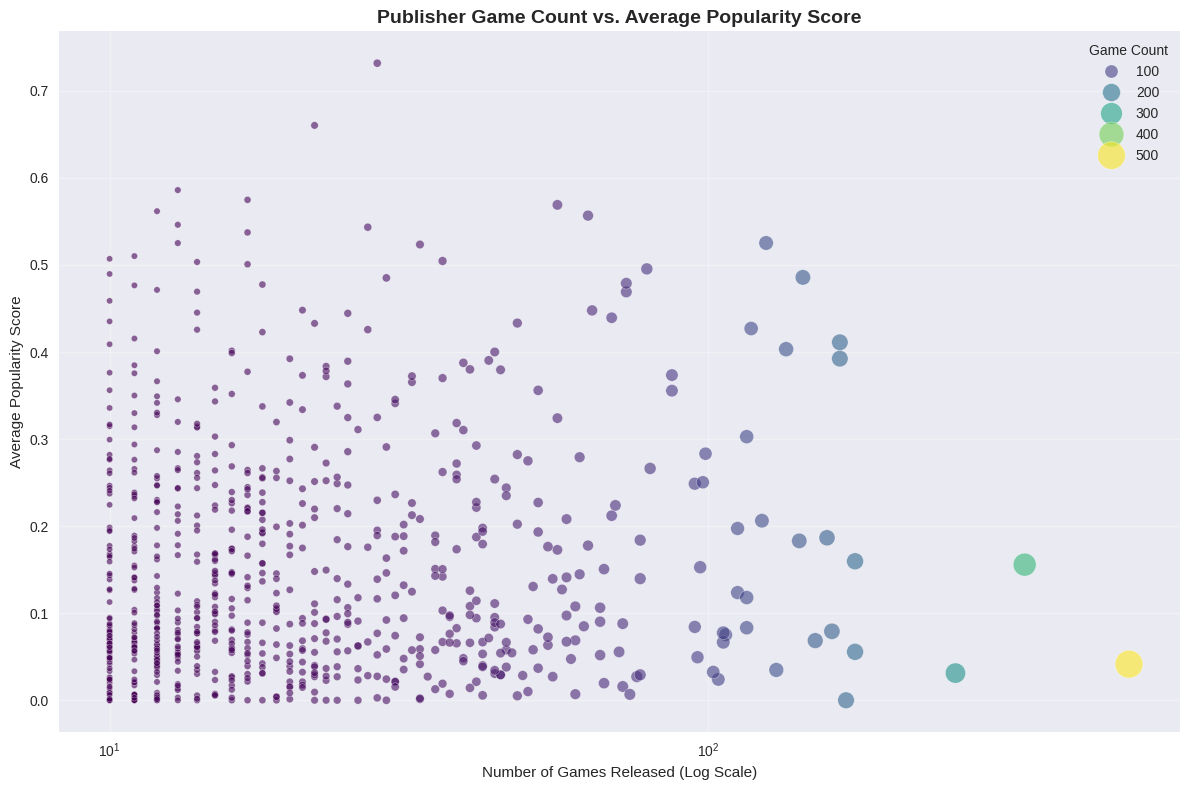

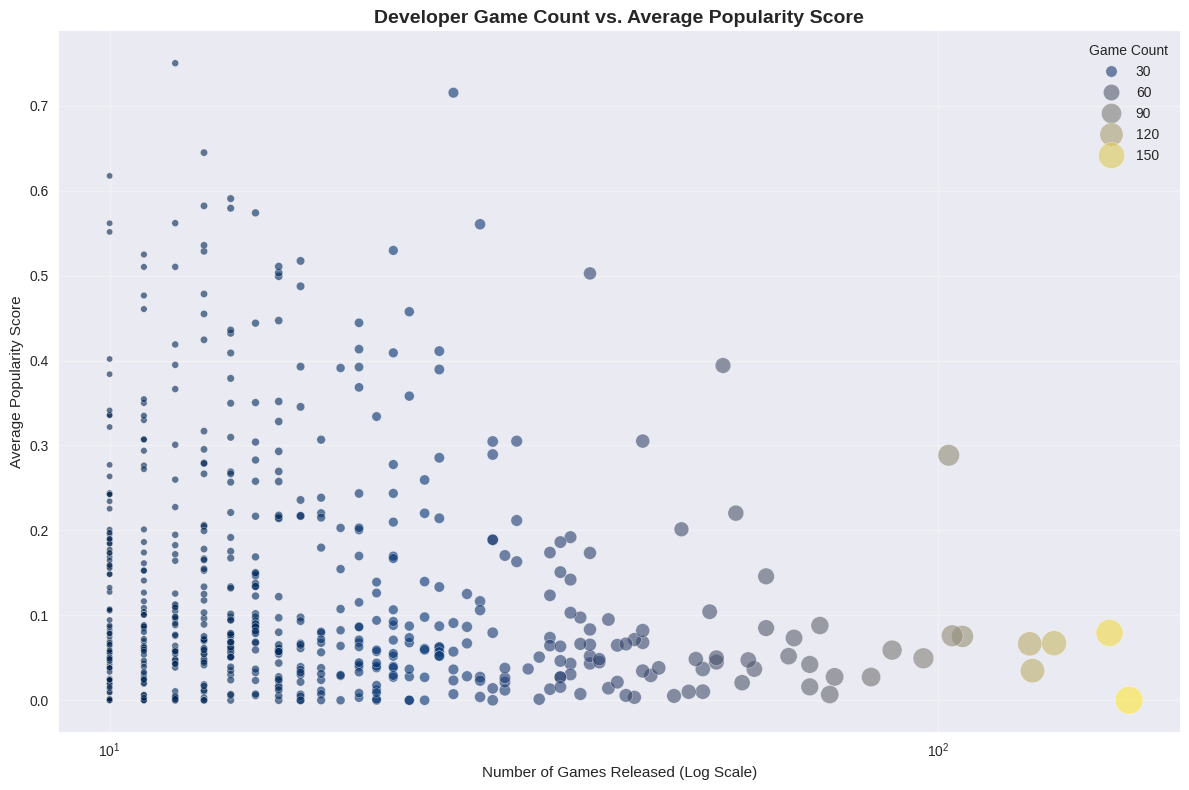

In [ ]:
publisher_summary = pd.DataFrame({
    'Game Count': df_games_encoded['Publishers'].value_counts(),
    'Average Popularity': df_games_encoded.groupby('Publishers')['Popularity score'].mean()
}).dropna()
# Filter for publishers with at least 10 games for better visualization
publisher_summary_filtered = publisher_summary[publisher_summary['Game Count'] >= 10].copy()
publisher_summary_filtered['Game Count'] = publisher_summary_filtered['Game Count'].astype(int)

plt.figure(figsize=(12, 8)) # Use plt.figure directly as we are not using subplots from a single fig
sns.scatterplot(x='Game Count', y='Average Popularity', data=publisher_summary_filtered,
                alpha=0.6, s=100, hue='Game Count', size='Game Count',
                sizes=(20, 400), palette='viridis')
plt.title('Publisher Game Count vs. Average Popularity Score', fontsize=14, fontweight='bold')
plt.xlabel('Number of Games Released (Log Scale)')
plt.ylabel('Average Popularity Score')
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Developer Volume vs. Quality
developer_summary = pd.DataFrame({
    'Game Count': df_games_encoded['Developers'].value_counts(),
    'Average Popularity': df_games_encoded.groupby('Developers')['Popularity score'].mean()
}).dropna()
# Filter for developers with at least 10 games for better visualization
developer_summary_filtered = developer_summary[developer_summary['Game Count'] >= 10].copy()
developer_summary_filtered['Game Count'] = developer_summary_filtered['Game Count'].astype(int)

plt.figure(figsize=(12, 8)) # Use plt.figure directly as we are not using subplots from a single fig
sns.scatterplot(x='Game Count', y='Average Popularity', data=developer_summary_filtered,
                alpha=0.6, s=100, hue='Game Count', size='Game Count',
                sizes=(20, 400), palette='cividis')
plt.title('Developer Game Count vs. Average Popularity Score', fontsize=14, fontweight='bold')
plt.xlabel('Number of Games Released (Log Scale)')
plt.ylabel('Average Popularity Score')
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

* **Inverse relationship between volume and quality:**
  Both charts show that entities releasing fewer games (10-50 titles) achieve significantly higher average popularity scores (0.4-0.7) than high-volume counterparts (>100 games), confirming that quality often suffers with scale.

* **Publishers show sharper quality drop-off:**
  High-volume publishers (400-500 games) often fall below 0.1 in popularity, likely due to outsourcing and content quantity focus, making it harder to maintain consistent quality.

* **Developers sustain mid-scale quality better:**
  Developers with 60-120 games still maintain respectable scores (\~0.2-0.3), likely due to tighter creative control and in-house consistency.

* **The “sweet spot” for success:**
  Releasing 20-50 titles appears optimal, balancing output and quality. Entities in this range often hit 0.4-0.6 popularity scores.

* **High-volume entities play a different role:**
  Larger catalogs (>200 games) may target broad market reach or niche saturation, focusing less on per-game excellence but potentially maximizing total revenue.


📌 Focusing on a smaller number of well-made games often leads to higher popularity for each game. If want a steady success, it’s better to make **fewer but better** games. Releasing many games may reach more people, but usually with **lower quality and impact per title**.


**B. Quality vs Quantity Correlation**

In [ ]:
# Volume vs Quality trade-off
volume_quality_corr_pub = pub_concentration.corr(
    df_games_encoded.groupby('Publishers')['Popularity score'].mean()
)
volume_quality_corr_dev = dev_concentration.corr(
    df_games_encoded.groupby('Developers')['Popularity score'].mean()
)

In [ ]:
print(f"\n🔄 Volume vs Quality Correlation:")
print(f"    • Publishers: {volume_quality_corr_pub:.3f}")
print(f"    • Developers: {volume_quality_corr_dev:.3f}")
print(f"    • Strategy Insight: {'Quality-focused' if volume_quality_corr_pub < -0.3 else 'Balanced'}")



🔄 Volume vs Quality Correlation:
    • Publishers: 0.071
    • Developers: 0.047
    • Strategy Insight: Balanced


> The correlation between game volume and quality is **very weak**, only **0.071** for publishers and **0.047** for developers. This means releasing more games doesn’t guarantee higher quality.
>
> A **balanced approach** between quantity and quality is key to success on Steam.


### **5.5.3. Studios top Genres**

In [ ]:
# Publisher tier
genre_counts_pub = {}
for tier in df_games_encoded['Publisher tier'].dropna().unique():
    tier_df = df_games_encoded[df_games_encoded['Publisher tier'] == tier]
    top_genres = tier_df[genre_cols].sum().sort_values(ascending=False).head(5)
    genre_counts_pub[tier] = top_genres

genre_counts_pub = pd.DataFrame(genre_counts_pub)

# Developer tier
genre_counts_dev = {}
for tier in df_games_encoded['Developer tier'].dropna().unique():
    tier_df = df_games_encoded[df_games_encoded['Developer tier'] == tier]
    top_genres = tier_df[genre_cols].sum().sort_values(ascending=False).head(5)
    genre_counts_dev[tier] = top_genres

genre_counts_dev = pd.DataFrame(genre_counts_dev)


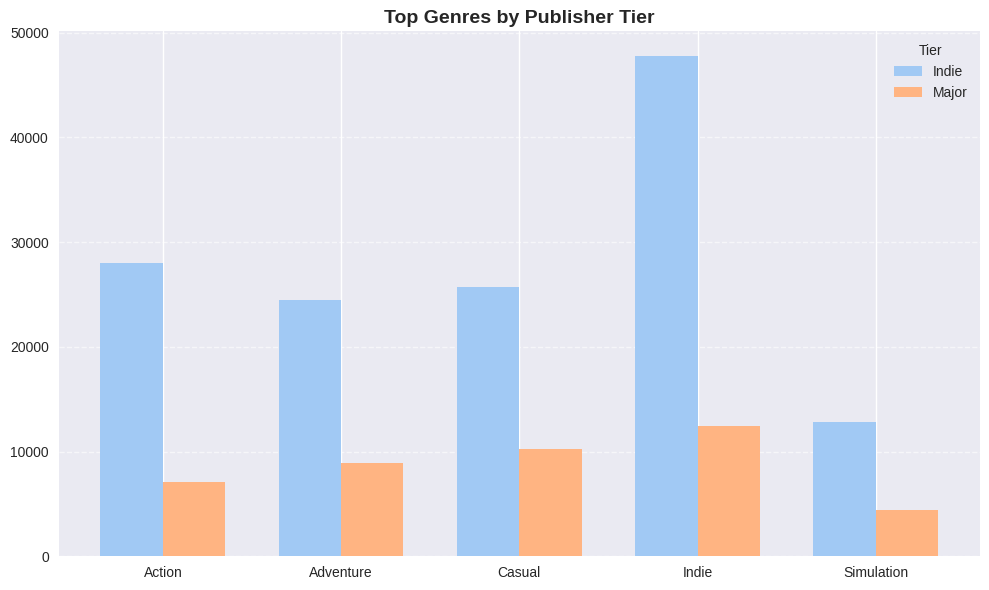

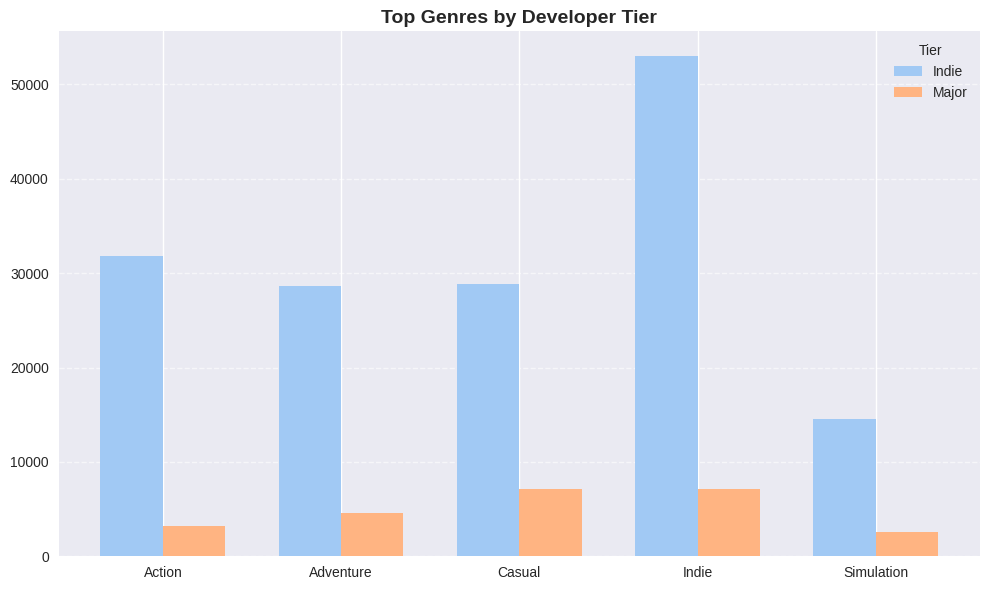

In [ ]:
def plot_cluster_chart(data_dict, title):
    df = pd.DataFrame(data_dict).fillna(0)
    x = np.arange(len(df.index))
    width = 0.35

    plt.figure(figsize=(10, 6))
    for i, col in enumerate(df.columns):
        plt.bar(x + i * width, df[col], width=width, label=col, color=pastel_colors[i % len(pastel_colors)])

    plt.xticks(x + width / 2, df.index)
    plt.xlabel('')
    plt.ylabel('')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(title='Tier')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_cluster_chart(genre_counts_pub, 'Top Genres by Publisher Tier')
plot_cluster_chart(genre_counts_dev, 'Top Genres by Developer Tier')


> **Genre Distribution by Tier:**

* **Indie dominates across all tiers**: Indie is the top genre for both `Indie Publishers` (\~47K games) and `Indie Developers` (\~53K). Even `Major Publishers` (\~12K) and `Major Developers` (\~7K) release a notable number of Indie games.

* **Indie studios drive volume**: In major genres like Action, Adventure, Casual, and Simulation, Indie studios publish far more titles than Major studios. For example, `Indie Publishers` released \~28K Action games vs. \~7K from `Major Publishers`.

👉 **Conclusion**: Indie is the backbone of Steam’s game library, with Indie studios leading the output across nearly all major genres.


---
>**🎯 Key Recommendations**

**🏤 For New Publishers & Developers**

* **Prioritize quality over quantity**: Aim for **20-50 games** with **0.4-0.6 popularity scores**, like **Valve** or **Rockstar**.
* **Leverage the indie edge**: Indie devs get **higher review ratios (0.64 vs 0.57)**, and market share is open, **top 10 only hold 2.7%**.

**📈 For Existing Studios**

**Major Studios:**

* Use pricing power (**\$9.73 avg vs \$7.17** for indies)
* Maximize visibility through marketing and review volume (**2,224 vs 750** avg reviews)
* Reevaluate high-volume strategy if quality drops

**Indie Studios:**

* Strengthen community ties, your **review ratio is your strength**
* Keep creative control to stay authentic
* Partner wisely to expand reach while maintaining indie authenticity

**🧭 Market Positioning**

* **Scale-Focused strategy**: Go broad, accept lower per-title popularity for higher total revenue, best for large studios with strong distribution capabilities
* **Quality-Focused strategy**: Release fewer games, aim for high impact and strong brand, ideal for studios with limited resources but strong creative vision

**🎮 Genre Tactics**

* Focus on **Indie genre dominance**: Indie games lead across all tiers
* Top genres for indies: **Action, Adventure, Casual, Simulation**

> **💡 Key Success Drivers**

* **Market is fragmented** → anyone can enter
* **More games ≠ better quality** → correlations are weak (**0.071-0.047**)
* **Player trust matters** → indie devs win on engagement
* **Price smart** → match tier to the right price point

✨ Don’t need to be the biggest. Focus on quality, community, and smart positioning for long-term success on Steam.


## **5.6. Legendary Games of All Times**

In [ ]:
game_age_threshold = 5 # Games older than 10 years
popularity_threshold = df_games_encoded['Popularity score'].quantile(0.95) # Top 5% in popularity
review_count_threshold = 1000 # Minimum reviews for significance

# Filter games that are old, highly popular, and well-reviewed
legendary_games = df_games_encoded[
    (df_games_encoded['Game age'] > game_age_threshold) &
    (df_games_encoded['Popularity score'] > popularity_threshold) &
    (df_games_encoded['Total reviews'] > review_count_threshold)
].sort_values(by='Popularity score', ascending=False)

In [ ]:
print(f"✨ Criteria for Legendary Games:")
print(f"    • Age: > {game_age_threshold} years")
print(f"    • Popularity: Top 5% (Score > {popularity_threshold:.3f})")
print(f"    • Reviews: > {review_count_threshold:,}")

print(f"\n🏆 Top 10 Legendary Games:")
print(legendary_games[['Name', 'Release year', 'Game age', 'Popularity score', 'Review ratio', 'Estimated owners']].head(10).to_string(index=False))

✨ Criteria for Legendary Games:
    • Age: > 5 years
    • Popularity: Top 5% (Score > 0.434)
    • Reviews: > 1,000

🏆 Top 10 Legendary Games:
                            Name  Release year  Game age  Popularity score  Review ratio  Estimated owners
                     Garry's Mod          2006        19              1.00          0.97      1,500,000.00
                   Left 4 Dead 2          2009        16              1.00          0.97      1,500,000.00
                Dead by Daylight          2016         9              1.00          0.81      1,500,000.00
              Grand Theft Auto V          2015        10              1.00          0.85      1,500,000.00
   Grand Theft Auto: San Andreas          2008        17              1.00          0.92      1,500,000.00
Counter-Strike: Global Offensive          2012        13              1.00          0.88      1,500,000.00
                        Terraria          2011        14              1.00          0.98      1,500,000.00


> All games marked as *Legendary* have a perfect **Popularity Score of 1.00** and the maximum **Estimated Owners (1,500,000)**, regardless of age, ranging from **7 to 20 years old**.

👉 This shows that **timeless quality and strong, lasting communities** are the key to long-term success.


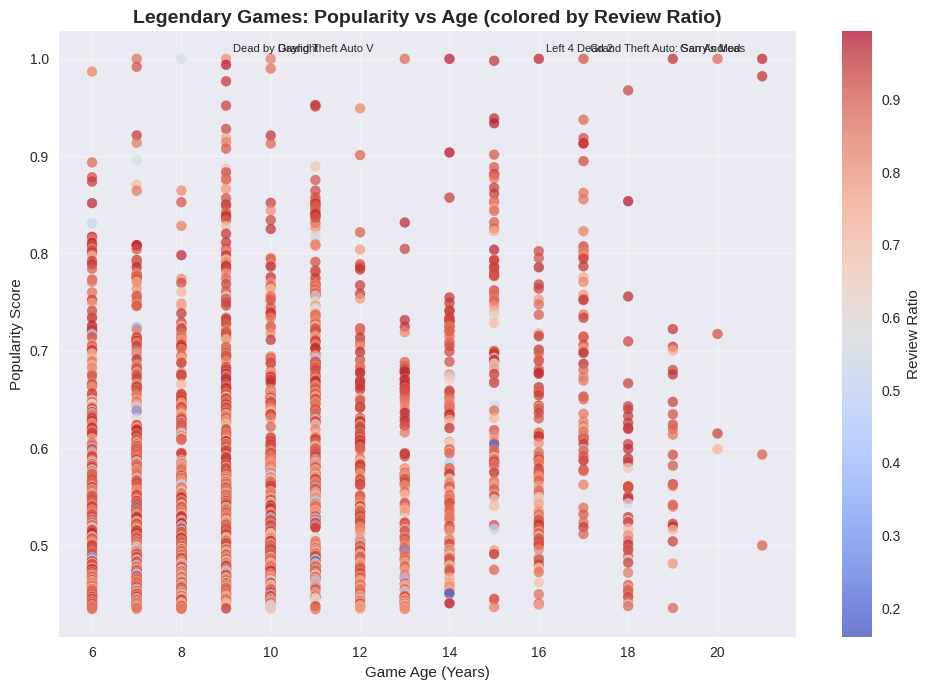

In [ ]:
# Visualization: Popularity vs Age for Legendary Games
fig, ax1 = plt.subplots(figsize=(10, 7))
scatter = ax1.scatter(legendary_games['Game age'], legendary_games['Popularity score'],
            c=legendary_games['Review ratio'], cmap='coolwarm', s=50, alpha=0.7)
ax1.set_xlabel('Game Age (Years)')
ax1.set_ylabel('Popularity Score')
ax1.set_title('Legendary Games: Popularity vs Age (colored by Review Ratio)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=ax1, label='Review Ratio')

# Add annotations for top games (e.g., top 5 by popularity)
top_games_to_label = legendary_games.nlargest(5, 'Popularity score')
for i, row in top_games_to_label.iterrows():
    ax1.annotate(row['Name'], (row['Game age'], row['Popularity score']),
                 xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

> **Legendary Games - Popularity vs Age**

**🏆 Timeless Excellence: Age Doesn't Diminish Legends**: **Games maintain legendary status across all ages:**
- **Consistent high popularity (0.6-1.0)** across the entire 6-21 year age spectrum
- **No significant decline** in popularity scores as games age, proving true legends are timeless
- **Peak performance clusters** appear around 9-11 years and 15-17 years, suggesting certain gaming eras produced exceptional titles

**🌟 Review Quality Remains Premium**: **Exceptional review ratios persist over time:**
- **Dominant red coloring** indicates most legendary games maintain 0.8-1.0 review ratios regardless of age
- **Minimal blue dots** show very few legendary games have poor community reception
- **Consistent quality threshold** - games don't achieve legendary status without maintaining high review standards

**📈 The "Golden Age" Phenomenon**: **Two distinct excellence periods emerge:**
- **9-11 years old**: Dense concentration of high-performing games (possibly 2013-2015 era)
- **15-17 years old**: Another cluster of exceptional titles (possibly 2007-2009 era)
- These periods likely represent major gaming innovation cycles or platform maturation

**🎯 Age-Defying Performance Patterns**: **Older games (15+ years) show remarkable resilience:**
- **Sustained popularity scores** of 0.7-1.0 even at 20+ years
- **Strong review ratios** maintain 0.8+ levels, indicating lasting community appreciation
- **Proof of concept**: Great games become more valuable with age, not less

**💎 The Legendary Threshold**: **Clear quality baseline for legendary status:**
- **Minimum popularity floor** around 0.45-0.5 across all ages
- **Review ratio requirement** appears to be 0.6+ minimum, with most above 0.8
- **Consistency requirement** - no legendary games show dramatic quality drops over time

---
> 🎯 **Key Recommendations**

**🔮 Strategic Implications**

**For Developers:**
- **Focus on timeless design** principles rather than trendy features
- **Build for longevity** - legendary games maintain relevance across decades
- **Community satisfaction** (high review ratios) is essential for legendary status

**For Publishers:**
- **Long-term value** of legendary games increases with age
- **Investment in quality** pays dividends across decades, not just launch years
- **Portfolio approach** - games from different eras can achieve legendary status

**📊 Market Insights**

**The legendary games market defies traditional product lifecycle:**
- **No obsolescence curve** - these games don't decline with age
- **Compound value growth** - older legendary games often become more valuable
- **Generational appeal** - games maintain relevance across different player demographics


✨True legendary games transcend time. They maintain high popularity and community approval regardless of age, proving that exceptional quality, timeless gameplay, and strong community connection create lasting value that actually appreciates over time rather than depreciating like typical products.

## **5.7. Correlation Matrix of Key Metrics**

In [ ]:
# Heatmap of correlations between main numerical variables
correlation_cols = [
    'Price', 'Popularity score', 'Total reviews', 'Review ratio',
    'Estimated owners', 'Recommendations', 'Game age',
    'Required age', 'DLC count',
    'Value score', 'Popularity per Dollar'
]

correlation_matrix = df_games_encoded[correlation_cols].corr()

In [ ]:
print("\n📊 Correlation Matrix of Key Game Metrics:")
print(correlation_matrix.round(2))


📊 Correlation Matrix of Key Game Metrics:
                       Price  Popularity score  Total reviews  Review ratio  Estimated owners  Recommendations  Game age  Required age  DLC count  Value score  Popularity per Dollar
Price                   1.00              0.25           0.04          0.06              0.15             0.27     -0.07          0.14       0.24        -0.24                  -0.29
Popularity score        0.25              1.00           0.18          0.31              0.72             0.67      0.45          0.22       0.37         0.50                   0.48
Total reviews           0.04              0.18           1.00          0.02              0.25             0.25      0.05          0.07       0.09         0.15                   0.11
Review ratio            0.06              0.31           0.02          1.00              0.11             0.11      0.16          0.01       0.08         0.19                   0.14
Estimated owners        0.15              0.72 

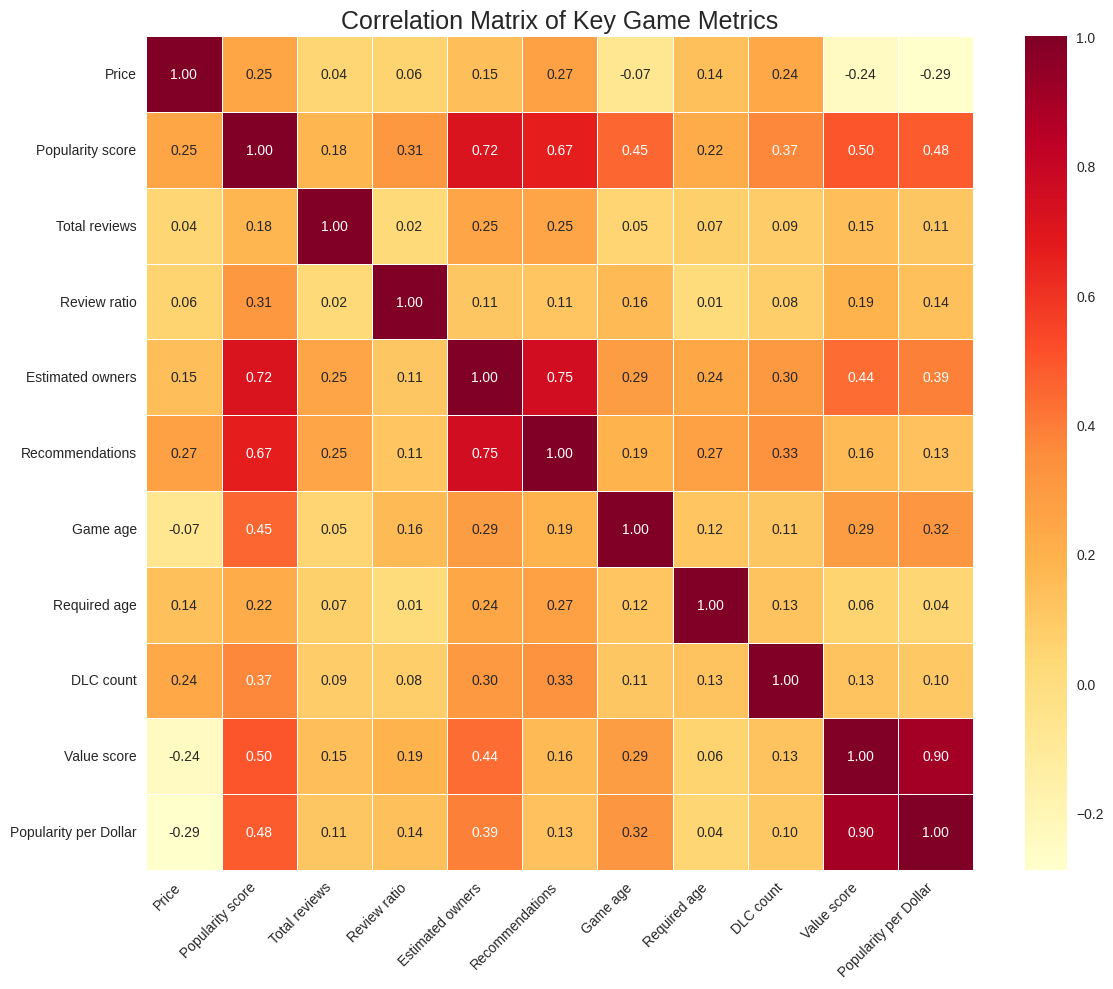

In [ ]:
# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Game Metrics', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

> **METRICS CORRELATION**

🔴 **1. THE "SUCCESS TRINITY" - NEARLY PERFECT CORRELATIONS**

| PAIR                                | CORR. | DESCRIPTION                              | INSIGHT                               | STRATEGIC                | ACTION                                |
| ----------------------------------- | ----- | ---------------------------------------- | ------------------------------------- | ------------------------ | ------------------------------------- |
| Value Score ↔ Popularity per Dollar | 0.90  | Value drives popularity relative to cost | Value optimization multiplies success | Maximize perceived value | Build clear value propositions        |
| Estimated Owners ↔ Recommendations  | 0.75  | More owners → more recommendations       | Size predicts advocacy                | Scale user base first    | Focus on acquisition over pricing     |
| Popularity Score ↔ Estimated Owners | 0.72  | Popularity scales ownership              | Popularity fuels exponential growth   | Build and fuel hype      | Leverage viral & influencer marketing |


🟠 **2. THE "ENGAGEMENT CLUSTER" - STRONG POSITIVE CORRELATIONS**

| PAIR                               | CORR. | DESCRIPTION                             | INSIGHT                         | STRATEGIC                          | ACTION                            |
| ---------------------------------- | ----- | --------------------------------------- | ------------------------------- | ---------------------------------- | --------------------------------- |
| Popularity Score ↔ Recommendations | 0.67  | Popularity creates recommendation loops | Social proof engine             | Early popularity matters           | Use influencers and community     |
| Popularity Score ↔ Value Score     | 0.50  | Popular = valuable                      | Quality sustains fame           | Invest in both product & promotion | Match quality to marketing        |
| Pop. Score ↔ Pop./\$               | 0.48  | Success breeds efficiency               | Fame → better cost ratios       | Upfront marketing pays off         | Front-load campaigns              |
| Pop. Score ↔ Game Age              | 0.45  | Older games more popular                | Longevity builds success        | Think long-term                    | Support evergreen games           |
| Est. Owners ↔ Value Score          | 0.44  | High value → wide adoption              | Value drives scale              | Communicate value well             | Highlight key value in marketing  |
| Est. Owners ↔ Pop./\$              | 0.39  | Big base = cost-effective fame          | Scale boosts efficiency         | Focus on volume                    | Retention & expansion > price     |


🟡 **3. THE "CONTENT ENHANCEMENT" GROUP - MODERATE TO WEAK CORRELATIONS**

| PAIR                               | CORR. | DESCRIPTION                             | INSIGHT                         | STRATEGIC                          | ACTION                            |
| ---------------------------------- | ----- | --------------------------------------- | ------------------------------- | ---------------------------------- | --------------------------------- |
| Pop. Score ↔ DLC Count             | 0.37  | Popular = more content                  | Monetization via expansions     | Delay content until fame           | Build post-launch DLC plans       |
| Recommendations ↔ DLC Count        | 0.33  | More DLC = more advocacy                | Content extends engagement      | Fuel advocacy with expansions      | Strategize DLC for recomm. spikes |
| Game Age ↔ Pop./\$                 | 0.32  | Older games = better efficiency         | Time improves cost-efficiency   | Plan for long-term                 | Build sustainable brands          |
| Pop. Score ↔ Review Ratio          | 0.31  | Pop games have better reviews           | Popularity ↔ quality            | Quality supports fame              | Continuous product polish         |
| Est. Owners ↔ DLC Count            | 0.30  | Big base = more expansions              | User size justifies content     | Expand after scaling               | Sync DLC with user growth         |
| Est. Owners ↔ Game Age             | 0.29  | Time → more owners                      | Penetration takes time          | Grow steadily                      | Long-term acquisition strategies  |
| Game Age ↔ Value Score             | 0.29  | Older = more valuable                   | Updates refine value            | Improve over time                  | Continuous enhancements           |
| Price ↔ Recommendations            | 0.27  | Higher price → more advocacy            | Premium implies quality         | Use price to frame perception      | Position as premium product       |
| Recomm. ↔ Required Age             | 0.27  | Mature games → more recomm.             | Older content = better advocacy | Don’t shy from mature markets      | Target adult segments             |
| Total Reviews ↔ Est. Owners | 0.25  | More users = more reviews    | Scale → engagement         | Use for feedback, not success | Focus on meaningful reviews |
| Total Reviews ↔ Recomm.     | 0.25  | Reviews = advocacy indicator | Reviews show engagement    | Encourage reviews             | Incentivize quality reviews |
| Price ↔ Pop. Score          | 0.25  | Premium can be popular       | Price ≠ block success      | Premium must earn it          | Deliver exceptional value   |
| Est. Owners ↔ Required Age  | 0.24  | Mature games scale           | Adult markets viable       | Mature ≠ niche                | Develop for adult segments  |
| Price ↔ DLC Count           | 0.24  | High price = more DLC        | Premium funds expansion    | Use price smartly             | Reinvest in content         |
| Pop. Score ↔ Required Age   | 0.22  | Mature = popular             | No age cap on popularity   | Build for all ages            | Age-appropriate engagement  |

🔵 **4. THE "TECHNICAL NOISE" - SUPER WEAK CORRELATIONS**

| PAIR                        | CORR. | DESCRIPTION                  | INSIGHT                    | STRATEGIC                     | ACTION                      |
| --------------------------- | ----- | ---------------------------- | -------------------------- | ----------------------------- | --------------------------- |
| Recomm. ↔ Game Age          | 0.19  | Older = stable advocacy      | Timeless = talked about    | Maintain quality              | Long-term relevance         |
| Review Ratio ↔ Value Score  | 0.19  | High value → good reviews    | Value = quality perception | Value affects sentiment       | Keep refining experience    |
| Pop. Score ↔ Total Reviews   | 0.18  | Popular games = more reviews (but not proportional) | Popularity ≠ review engagement       | Don’t rely on fame for reviews     | Actively encourage reviews              |
| Recomm. ↔ Value Score        | 0.16  | High value = more recommendations                   | Value boosts organic marketing       | Invest in perceived value          | Communicate value clearly               |
| Review Ratio ↔ Game Age      | 0.16  | Older = better review ratios                        | Time improves quality perception     | Continuous improvement matters     | Keep updating post-launch               |
| Total Reviews ↔ Value Score  | 0.15  | High value = more reviews                           | Value motivates engagement           | Value → community interaction      | Highlight value in campaigns            |
| Price ↔ Est. Owners          | 0.15  | High price still → broad adoption                   | Premium ≠ barrier                    | Don’t fear high pricing            | Justify pricing via value               |
| Price ↔ Required Age         | 0.14  | Mature games = higher price                         | Mature = premium-ready market        | Use age rating to position pricing | Price confidently for adult content     |
| Review Ratio ↔ Pop./\$       | 0.14  | Better reviews = better efficiency                  | Quality improves cost-effectiveness  | Invest in polish                   | Improve quality to boost ROI            |
| DLC Count ↔ Value Score      | 0.13  | More DLC = better value perception                  | Content adds value                   | DLC supports positioning           | Use DLC to boost perceived value        |
| Recomm. ↔ Pop./\$            | 0.13  | Recommendations = marketing efficiency              | Advocacy saves budget                | Grow organic channels              | Drive recommendations intentionally     |
| Required Age ↔ DLC Count     | 0.13  | Mature games = more DLC                             | Mature players accept expansions     | Monetize with rich content         | Plan DLC for mature titles              |
| Game Age ↔ DLC Count         | 0.12  | Older = more DLC                                    | Time enables expansion               | Long-term content planning         | Build DLC pipelines                     |
| Game Age ↔ Required Age      | 0.12  | Older games = higher age ratings                    | Industry matures over time           | Consider future-proof content      | Design for long-term demographics       |
| Review Ratio ↔ Est. Owners   | 0.11  | More owners = better review ratio                   | Quality supports scale               | Don’t ignore quality during growth | Keep QA tight while scaling             |
| Review Ratio ↔ Recomm.       | 0.11  | Quality = more advocacy                             | Good product sells itself            | Invest in player satisfaction      | Improve polish for better word-of-mouth |
| Total Reviews ↔ Pop./\$      | 0.11  | More reviews = better popularity efficiency         | Feedback = marketing signal          | Monitor feedback → optimize spend  | Reward and prompt reviews               |
| DLC Count ↔ Pop./\$          | 0.10  | More content = more efficient fame                  | Content boosts marketing ROI         | DLC = sustainable fame             | Use DLC as long-term engine             |
| Total Reviews ↔ DLC Count    | 0.09  | Review count ↔ DLC count                            | Reviews indicate content demand      | Let engagement guide content       | Track feedback to prioritize DLC        |
| Review Ratio ↔ DLC Count     | 0.08  | Better reviews = more DLC                           | Quality precedes expansion           | Don’t expand broken games          | Ship polished core experience first     |
| Total Reviews ↔ Required Age | 0.07  | Mature games = more reviews                         | Adults = more engaged                | Leverage adult feedback            | Design for review-active audiences      |
| Price ↔ Review Ratio         | 0.06  | High price ↔ weak quality signal                    | Premium ≠ better reviews             | Justify price with experience      | Match cost to perceived value           |
| Required Age ↔ Value Score   | 0.06  | Age rating ≠ value perception                       | Mature ≠ better value                | Don’t assume older = better        | Deliver value at every rating           |
| Total Reviews ↔ Game Age     | 0.05  | Age doesn't guarantee reviews                       | Time ≠ feedback volume               | Don't depend on time               | Constantly prompt for feedback          |
| Required Age ↔ Pop./\$       | 0.04  | Mature ≠ efficient marketing                        | Adults don't lower CAC               | Focus on all-age efficiency        | Use mature appeal, but market smart     |
| Price ↔ Total Reviews        | 0.04  | Price doesn't predict reviews                       | High cost ≠ more feedback            | All price tiers need engagement    | Create incentives to review             |
| Total Reviews ↔ Review Ratio | 0.02  | More reviews ≠ better quality                       | Quantity ≠ quality                   | Prioritize meaningful feedback     | Incentivize thoughtful reviews          |
| Review Ratio ↔ Required Age  | 0.01  | Age rating ≠ review quality                         | Age doesn’t affect perceived quality | Quality is universal               | Focus on product quality for all        |

⚫ **5. THE "PRICING ILLUSION" - WEAK NEGATIVE CORRELATIONS**

| PAIR                | CORR. | DESCRIPTION                      | INSIGHT                | STRATEGIC                    | ACTION                 |
| ------------------- | ----- | -------------------------------- | ---------------------- | ---------------------------- | ---------------------- |
| Price ↔ Pop./\$     | -0.29 | High price = low cost-efficiency | Premium hurts reach    | Justify higher cost          | Prove superior value   |
| Price ↔ Value Score | -0.24 | High price = lower value feel    | Premium = scrutiny     | Must back price with quality | Amplify value message  |
| Price ↔ Game Age    | -0.07 | Older games = cheaper            | Pricing drops with age | Price for lifecycle          | Plan price decay curve |



---
> 🎯 **Key Recommendations**

**1. Value is the Ultimate Multiplier (r = 0.90)**: Value Score ↔ Popularity per Dollar = **0.90** → nearly perfect correlation, the higher the perceived value, the more efficient your marketing spend becomes. 📍 Players reward value, not price.

* **Action**: Test value perception early; lead marketing with value, not just features; prioritize value-based pricing

**2. Scale Creates Exponential Momentum (r = 0.75, 0.67)**: The "success triangle" (Owners ↔ Recommendations ↔ Popularity) shows that growth becomes self-reinforcing with more users and advocacy.
* **Action**: Prioritize early user acquisition; offer low entry pricing or free trials; add referral systems; build engaged community from day one

**3. Early Popularity Pays Off (r = 0.67, 0.50, 0.48)**: Popularity Score has strong ties to recommendations, perceived value, and marketing efficiency; fame acts as a multiplier for reach, impact, and cost-effectiveness.
* **Action**: Front-load marketing; use influencers pre-launch; plan PR around hype windows; create exclusivity with closed betas


**4. Longevity Beats Viral Spikes (r = 0.45, 0.32, 0.29)**: Game Age correlates with popularity, efficiency, and ownership reveal that Long-lived games become evergreen success stories.

* **Action**: Build for 5+ year lifespan; plan major updates every 3–6 months; invest in long-term community care; focus on IP development, not just one game.

**5. Price Doesn’t Kill Success (r = -0.29, -0.24)**: Price ↔ Value Score and Popularity per Dollar = weak negative correlation, show that higher price works, **if value is clearly justified**.

* **Action**: Communicate value per hour clearly; price like premium entertainment (not just games); offer demo/trial to reduce risk; bundle value into tiered pricing.

**6. Mature Markets Are Underrated (r = 0.27, 0.24, 0.22)**: Higher age ratings ↔ more recommendations, owners, and price tolerance, show that adults are a stable, valuable audience.
* **Action**: Target age 25–45; embrace mature themes; use adult-friendly platforms/influencers; don’t fear high pricing for adult content

**7. DLC Extends Success (r = 0.37, 0.33, 0.30)**: DLC works best **after** core success, not before; so popular games support more and better DLC.
* **Action**: Wait until core game proves itself; build DLC based on player feedback; use DLC to deepen, not distract; match DLC quality to core experience

**8. Reviews Lag Behind Success (r = 0.02–0.25)**: Reviews reflect success rather than drive it, so the real focus should be on player satisfaction, not review scores.
* **Action**: Let good gameplay generate good reviews; use reviews for internal improvement; Don’t optimize for Metacritic; engage meaningfully with reviewers


> 🚨 **Avoid These Mistakes**

* Prioritizing reviews over player satisfaction
* Launching DLC too early
* Underpricing out of fear
* Ignoring the adult market
* Treating virality as luck, not strategy

# **6. Strategic Recommendations**

## **6.1. Platform-Level Strategy for Steam Success**

**1. Focus on Quality over Quantity**

* Prioritize **10–20 high-quality titles**, not mass production.
* Target **review ratios between 0.4–0.6** to signal sustained player satisfaction.
* Indie developers outperform major studios in review ratio (0.64 vs. 0.57).
* With the top 10 publishers holding only **2.7% market share**, the field is highly fragmented and open.

**2. Optimize Pricing with a Value-Based Approach**

* The **optimal price range** is **\$5–8** (median \$4.99, average \$7.82).
* Premium pricing (\$30–60) shows highest popularity score (0.27) for quality games
* Value is a stronger success driver than price (**r = 0.90** between value and popularity per dollar).
* Avoid underpricing unless visibility is guaranteed.

**3. Genre and Market Positioning**

* Focus on **Action, Adventure, Casual** for high visibility (4,000–5,000 titles/year).
* Embrace **niche specialization**, which has a **92.5% success rate**.
* Free-to-play (F2P) models demonstrate strong outcomes: Highest popularity correlation (+0.16) and quality score (0.21)

**4. Timing and Marketing Are Critical**

* **Fall** launches offer highest exposure (24,500+ titles), while **Spring** offers lower competition.
* **Winter** is less favorable due to post-holiday fatigue (19,500 games).
* **Front-load marketing spend**: early popularity is a strong momentum driver (**r = 0.67**).

**5. Invest in Long-Term Value Creation**

* Games with longer lifespans show higher popularity (**r = 0.45**).
* Implement **major updates every 3–6 months** post-launch.
* DLC effectiveness increases after core success (correlations: 0.37, 0.33, 0.30).
* Early community-building drives sustained engagement and organic recommendations.

**6. Prepare for Hardware Evolution and Cross-Platform Dynamics**

* Steam Deck leads the handheld PC market 35.6% vs. Nintendo Switch’s 35.5%, with **4.1M units sold** (2024) and **7.9M expected by 2027** ([TechPowerUp](https://www.techpowerup.com/338517/steam-deck-nintendo-switch-dominate-among-gamers-who-use-handhelds)).
* Portable PC gaming remains niche but is growing, developers should ensure compatibility where feasible.


## **6.2. Targeted Strategy by Stakeholder Type**

**1. For New Developers & Publishers**

* Leverage **indie credibility** and higher review ratios (0.64).
* Identify and fill **niche market gaps** (92.5% success rate).
* Focus on **early community building** to drive engagement loops.
* Align pricing with actual value delivered, not competitor benchmarks.

**2. For Established Studios**

* Use **pricing power** effectively (avg. \$9.73 vs. \$7.17 for indies).
* Maximize **visibility and reach** through robust marketing pipelines.
* Avoid high-volume, low-quality strategies
* Invest in **IP longevity and brand equity** for scalable success.

**3. For Publishers and Investors**

* Take a **portfolio approach**, combining niche gems with high-polish mainstream titles.
* Target **long-term returns** by investing in games with multi-year update potential.
* Use **quality KPIs** like retention, engagement, and community participation to evaluate teams.
* Develop **internal F2P capabilities** for live-ops and monetization efficiency.



# **7. Conclusion**



Steam continues to dominate PC gaming with **132 million monthly active users**, **69 million DAUs**, and **75% market share**. While mobile gaming's projected growth to **\$105.7B in 2025** presents competitive pressure, Steam’s value-driven ecosystem remains resilient and full of opportunity.
([Demandsage](https://www.demandsage.com/steam-statistics/); [Coolest Gadgets](https://coolest-gadgets.com/nintendo-switch-vs-steam-deck-statistics-which-is-better-2025/))

However, with **85,000+ games**, success is no longer driven by luck or genre selection. Strategic execution matters more, particularly around **proper positioning, quality focus, and long-term vision,** and **community engagement**.

🏆 **Key Success Factors**

* Delivering value (strongest predictor of success, r = 0.90)
* Building player communities for organic growth
* Focusing on quality, not quantity
* Choosing the right market positioning and pricing

>> 💥**Critical Success Formula**
>>
>> **Niche Focus (92.5% success rate) + F2P Model (0.21 quality score) + Quality-First Approach + Deep Engagement Systems + Community Building = Sustainable Success**


Ultimately, the future belongs to developers and publishers who understand the platform's dynamics, create lasting value, and actively build strong player communities. The most successful teams will be those who skillfully combine the **depth and polish of traditional PC gaming** with the **scalability, accessibility, and engagement strategies** that have proven effective in mobile, **without compromising on player satisfaction or quality expectations** from the Steam audience.

**💡 Final Thought**:
Success on Steam is **not a matter of luck**, it’s the outcome of **data-driven decisions**, delivering real value, scaling strategically, pricing with purpose, and planning for the long run .
